### 💻 분석 데이터 : imod버스 승차요청 이력 데이터, (계양, 검단, 송도)

**배차요청수요의 특성을 파악할 수 있는 분석 진행**   
- 분석1) 출발지, 목적지 사이 거리분포
- 분석2) 누적요청시간 시각화  
- 분석3) 누적요청횟수 시각화  
- 분석4) 1회요청만으로 실제 버스를 탑승한 사용자 수  
- 분석5) 배차대기시간 분포 시각화
- 분석6) 지역별 배차요청 접수 후 차량이 배차지까지 이동하는 시간분포
- 분석7) 차내 이동시간 시각화
- 분석8) 통행시간별 승차수요 시각화
- 분석9) 수요상위 10개 정류장 - 월/시간별 정류장별 이용수요의 증감 시각화
- 분석10) 지역별 전월대비 증감률
- 분석11) 연령대별(어른, 청소년, 어린이) 월별/시간대별 수요
- 분석12) 지역별/시간대별 정류장방면 분석
- 분석13) 요일별 승차수요 시각화 (실수요 고객 기준)
- 분석14) 주간 vs 주말
- +) 시간대별, 배차요청 중복요청 제거 전후 데이터 비교

### - 패키지 임포트

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#경고무시
import warnings
warnings.filterwarnings('ignore')
# 한글처리

plt.rc('font', family='Malgun Gothic')
# '-' 문자 처리
plt.rc('axes', unicode_minus=False)

### - 전처리 후 데이터 불러오기

In [3]:
data=pd.read_csv("new_전처리.csv", low_memory=False)

#전체 열 보이도록 수정
pd.set_option('display.max_columns', None)

In [4]:
df=data

In [5]:
#날짜 계산을 위해 '요청시간', '최초요청시간', '승차시간', '하차시간'컬럼을 날짜형식으로 바꿔줌
#함수 : 데이터프레임명['컬럼명']=pd.to_datetime(데이터프레임명['컬럼명'])
from datetime import datetime
df['요청시간']=pd.to_datetime(df['요청시간'])
df['최초요청시간']=pd.to_datetime(df['최초요청시간'])
df['승차시간']=pd.to_datetime(df['승차시간'])
df['하차시간']=pd.to_datetime(df['하차시간'])

### - 지역구분 및 데이터 갯수 확인

In [6]:
계양=df[df['지역']=='계양']
검단=df[df['지역']=='검단']
송도=df[df['지역']=='송도']

In [7]:
print('전체 row :', len(df))
print('계양 row :', len(계양))


print('검단 row :', len(검단))
print('송도 row :', len(송도))

전체 row : 2064519
계양 row : 9333
검단 row : 187464
송도 row : 1867722


### - 실수요 데이터의 상태를 파악

In [8]:
#실수요 데이터만 가져와서 각각의 값들을 count(실수요여부가 1인 데이터 기준)
상태=pd.DataFrame(df[df['실수요여부']==1].상태.value_counts())
상태.columns=['count']

#비율계산
상태['%']=round(상태['count']/sum(상태['count'])*100,2)
상태

count      %
하차완료     180232  41.22
배차불가     153325  35.07
시뮬레이션취소   70777  16.19
탑승취소      32064   7.33
시스템취소       852   0.19

-> 실수요 고객들 중 35.06%%가 배차 불가로 서비스를 이용하지 못함.

-> 41.22%의 고객이 실제로 서비스를 이용한 것을 확인.

### 🔗 분석1) 지역별 승하차지 사이 거리의 분포(하차완료, 고객 데이터 활용)

### 1-1. 계양

In [9]:
#상태가 하차완료이면서 중복을 제외하기 위해 실수요여부가 1인 데이터만 추출
계양거리=계양[(계양['상태']=='하차완료')&(계양['실수요여부']==1)][['거리']]

In [10]:
계양거리.거리.min(), 계양거리.거리.max(), 계양거리.거리.median()

(0.03, 5.23, 1.48)

-> 출발지~목적지 사이의 직선거리는 0.03부터 최대 5.23으로 확인

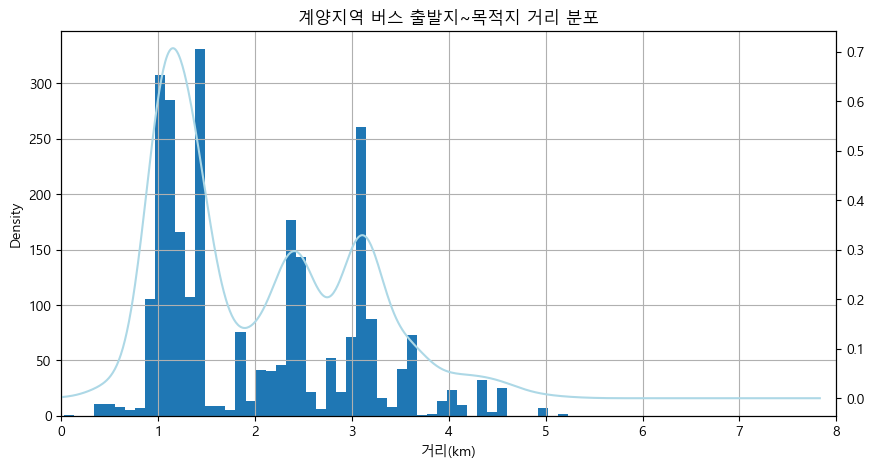

In [11]:

# 계양거리의 분포를 시각화, y축은 데이터 수
계양거리.거리.hist(bins=50, figsize=(10,5))

# x축, y축 설명 달기
plt.xlabel('거리(km)')
plt.ylabel('데이터 수')

# x축의 범위 0~6으로 제한
plt.xlim(0,8)

계양거리.거리.plot(kind='kde', secondary_y=True, ax=plt.gca(), title='계양지역 버스 출발지~목적지 거리 분포', color='lightblue')

plt.show()



-> 연속형 변수인 거리의 히스토그램과 히스토그램을 매끄럽게 선으로 표현한 밀도추정그래프입니다. 계양지역에서 운행하는 버스의 출발지~목적지 사이의 거리(이동반경) 분포를 확인할 수 있습니다

### 1-2. 검단

In [12]:
#상태가 하차완료이면서 중복을 제외하기 위해 실수요여부가 1인 데이터만 추출
검단거리=검단[(검단['상태']=='하차완료')&(검단['실수요여부']==1)][['거리']]

In [13]:
검단거리.거리.min(), 검단거리.거리.max(), 검단거리.거리.median()

(0.06, 5.99, 1.53)

-> 출발지~목적지 사이의 직선거리의 중앙값은 1.53으로 계양(1.48)과 비슷한 수치를 보임

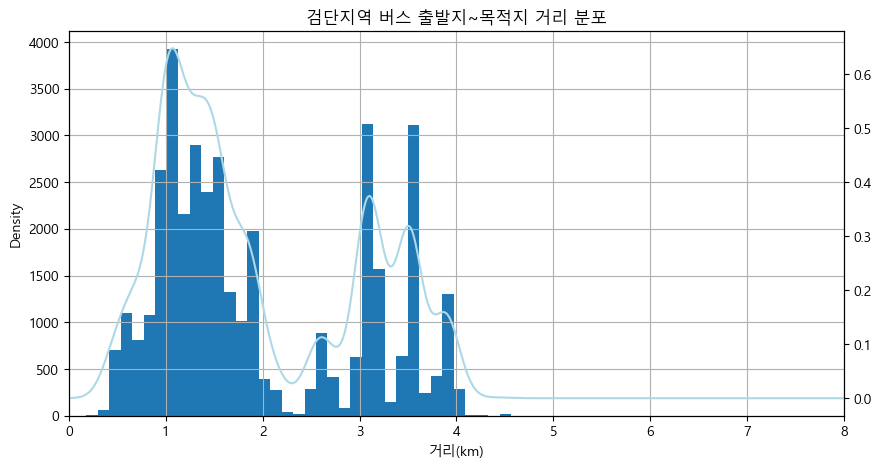

In [14]:

# 검단거리의 분포를 시각화, y축은 데이터 수
검단거리.거리.hist(bins=50, figsize=(10,5))

# x축, y축 설명 달기
plt.xlabel('거리(km)')
plt.ylabel('데이터 수')

# x축의 범위 0~6으로 제한
plt.xlim(0,8)

검단거리.거리.plot(kind='kde', secondary_y=True, ax=plt.gca(), title='검단지역 버스 출발지~목적지 거리 분포', color='lightblue')

plt.show()



-> 연속형 변수인 거리의 히스토그램과 히스토그램을 매끄럽게 선으로 표현한 밀도추정그래프입니다. 검단지역에서 운행하는 버스의 출발지~목적지 사이의 거리(이동반경) 분포를 확인할 수 있습니다

### 1-3. 송도

In [15]:
#상태가 하차완료이면서 중복을 제외하기 위해 실수요여부가 1인 데이터만 추출
송도거리=송도[(송도['상태']=='하차완료')&(송도['실수요여부']==1)][['거리']]

In [16]:
송도거리.거리.min(), 송도거리.거리.max(), 송도거리.거리.median()

(0.04, 8.13, 2.79)

-> 출발지~목적지 사이의 직선거리는 0.04부터 최대 8.13으로 확인, 중앙값은 2.79로 검단(1.53)보다 더 먼 거리를 이동하는 것을 확인.

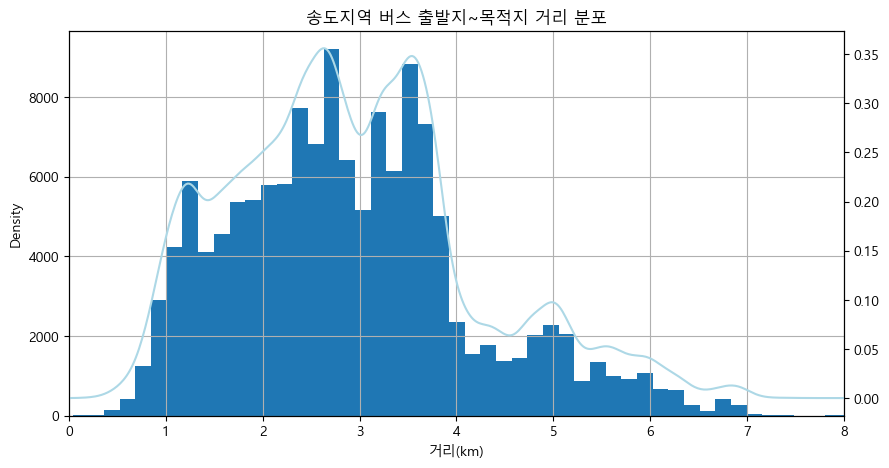

In [17]:

# 송도거리의 분포를 시각화, y축은 데이터 수
송도거리.거리.hist(bins=50, figsize=(10,5))

plt.xlabel('거리(km)')
plt.ylabel('데이터 수')

# x축의 범위 0~6으로 제한
plt.xlim(0,8)

송도거리.거리.plot(kind='kde', secondary_y=True, ax=plt.gca(), title='송도지역 버스 출발지~목적지 거리 분포', color='lightblue')

plt.show()



-> 연속형 변수인 거리의 히스토그램과 히스토그램을 매끄럽게 선으로 표현한 밀도추정그래프입니다. 송도지역에서 운행하는 버스의 출발지~목적지 사이의 거리(이동반경) 분포를 확인할 수 있습니다

### 1-4. 지역간 이동반경 비교

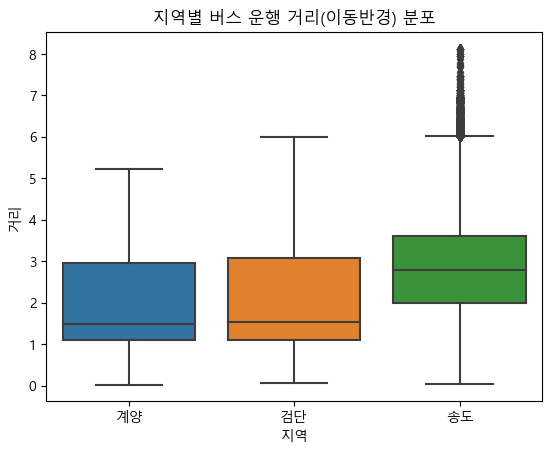

In [18]:
sns.boxplot(data=[계양거리['거리'], 검단거리['거리'], 송도거리['거리']], orient='v')
plt.title('지역별 버스 운행 거리(이동반경) 분포')
plt.ylabel('거리')
plt.xlabel('지역')
plt.xticks([0,1,2], ['계양', '검단', '송도'])

plt.show()

-> 지역별 버스 운행 거리(이동반경) 분포를 박스플롯으로 확인


### 🔗 분석2) 누적요청시간 시각화

- 동일한 사용자id, 승하차정류장id를 가지는 배차요청 데이터의 직전 요청시간 간격이 600초 이내일때, 동일 요청으로 가정하고 누적요청시간을 계산합니다.

- 누적요청시간은 동일사용자의 최종요청시간-최초요청시간으로 계산되고 단위는 초입니다.


### 2-1. 계양

In [19]:
#실수요여부가 1인 데이터만 추출
#누적요청시간=(동일사용자의 최종요청시간-최초요청시간)
#단위 : 초기준
누적요청시간=계양[(계양['실수요여부']==1) & (계양['누적요청횟수']>1)][['누적요청시간']]

In [20]:
누적요청시간.누적요청시간.min(), 누적요청시간.누적요청시간.max(), 누적요청시간.누적요청시간.median() ,누적요청시간.shape[0]

(0.0, 1425.0, 97.0, 1334)

-> 동일사용자의 최초요청부터 최종요청까지 소요된 시간은 0부터 최대 1425초(약 24분)으로 확인

- 누적요청시간 시각화(계양)

Text(0, 0.5, '요청건수')

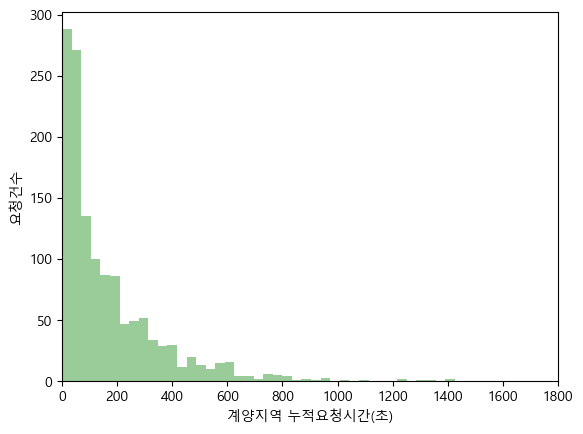

In [21]:
# 누적요청시간['누적요청시간'] 분포 시각화, 단 y축의 값은 데이터의 수로 표현, x축의 범위는 0~1800
sns.distplot(누적요청시간['누적요청시간'], color='green', kde=False)
# x축의 범위를 0~1800으로 설정
plt.xlim(0, 1800)

plt.xlabel('계양지역 누적요청시간(초)')
plt.ylabel('요청건수')



### 2-2. 검단

In [22]:
#실수요여부가 1인 데이터만 추출
#누적요청시간=(동일사용자의 최종요청시간-최초요청시간)
#단위 : 초기준

누적요청시간=검단[(검단['실수요여부']==1) & (검단['누적요청횟수']>1)][['누적요청시간']]

# @@@@@@@@@@@@@@@ 실소유여부가 1이면서 상태가 하차완료인 경우라면 좀 더 낳은 결과를 얻지 않을까?

In [23]:
누적요청시간.누적요청시간.min(), 누적요청시간.누적요청시간.max(), 누적요청시간.누적요청시간.median() ,누적요청시간.shape[0]

(0.0, 2193.0, 103.0, 25806)

-> 동일사용자의 최초요청부터 최종요청까지 소요된 시간은 0부터 최대 2193초(약 36분)으로 확인

- 누적요청시간 시각화(검단)

Text(0, 0.5, '요청건수')

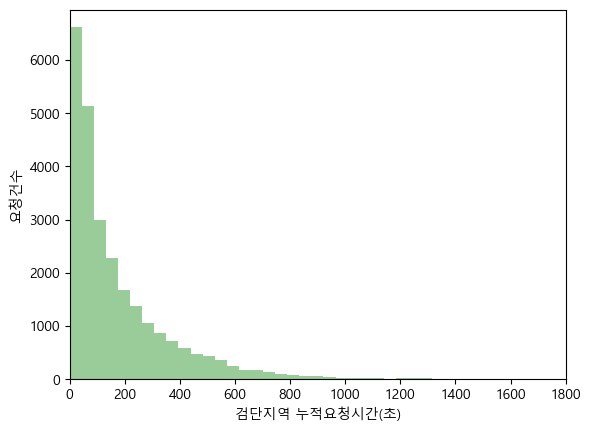

In [24]:
# 누적요청시간['누적요청시간'] 분포 시각화, 단 y축의 값은 데이터의 수로 표현, x축의 범위는 0~1800
sns.distplot(누적요청시간['누적요청시간'], color='green', kde=False)
# x축의 범위를 0~1800으로 설정
plt.xlim(0, 1800)
plt.xlabel('검단지역 누적요청시간(초)')
plt.ylabel('요청건수')


### 2-3. 송도

In [25]:
#실수요여부가 1인 데이터만 추출
#누적요청시간=(동일사용자의 최종요청시간-최초요청시간)
#단위 : 초기준
누적요청시간=송도[(송도['실수요여부']==1) & (송도['누적요청횟수'] > 1)][['누적요청시간', '상태']]

In [26]:
누적요청시간.누적요청시간.min(), 누적요청시간.누적요청시간.max(), 누적요청시간.누적요청시간.median() ,누적요청시간.shape[0]

(0.0, 6260.0, 84.0, 216138)

-> 동일사용자의 최초요청부터 최종요청까지 소요된 시간은 0부터 최대 6260초(약 104분)으로 확인

In [27]:
df[df['누적요청시간']==6260.0][['요청시간','상태','요청식별id', '누적요청시간','누적요청횟수','최초요청시간']]


요청시간    상태   요청식별id  누적요청시간  누적요청횟수              최초요청시간
1252216 2022-07-07 20:46:36  배차불가  1251888  6260.0     329 2022-07-07 19:02:16

In [28]:
print(len(송도[송도['요청식별id']==1251888]))

329


-> 약 104분(6260초) 동안 329번의 배차요청 시도

- 누적요청시간 시각화(송도)

Text(0, 0.5, '요청건수')

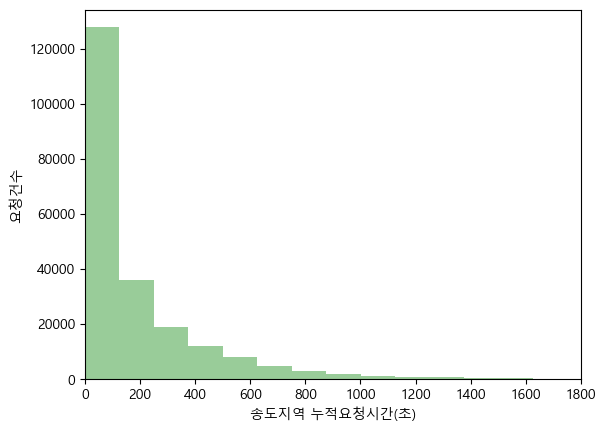

In [29]:
sns.distplot(누적요청시간['누적요청시간'], color='green', kde=False)
plt.xlim(0, 1800)
plt.xlabel('송도지역 누적요청시간(초)')
plt.ylabel('요청건수')



유의미한 차이를 찾기 어려움

### 🔗 분석3) 누적요청횟수 시각화(실수요 고객데이터 활용)

### 3-1. 계양

In [30]:
#실수요여부가 1인 데이터만 추출

누적요청횟수=계양[계양['실수요여부']==1][['누적요청횟수']]
누적요청횟수.mean()

누적요청횟수    2.404793
dtype: float64

- 누적요청횟수 시각화

Text(0, 0.5, '요청건수')

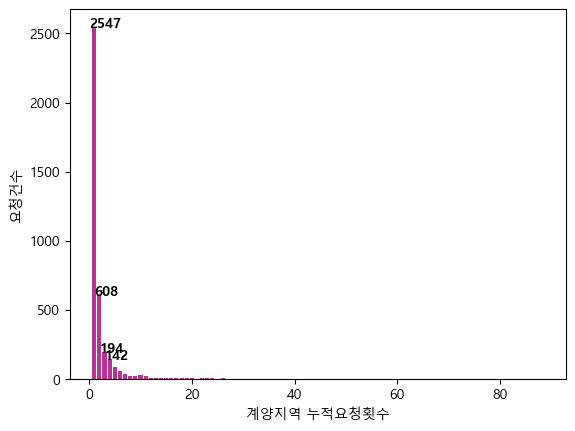

In [31]:
plt.bar(누적요청횟수['누적요청횟수'].value_counts().index, 누적요청횟수['누적요청횟수'].value_counts().values, color='#B53691')

for i, v in enumerate(누적요청횟수['누적요청횟수'].value_counts().values):
    if i > 3:
        break
    plt.text(i, v, str(v), color='black', fontweight='bold')


plt.xlabel('계양지역 누적요청횟수')
plt.ylabel('요청건수')

- 100미만 누적요청횟수 시각화

Text(0, 0.5, '요청건수')

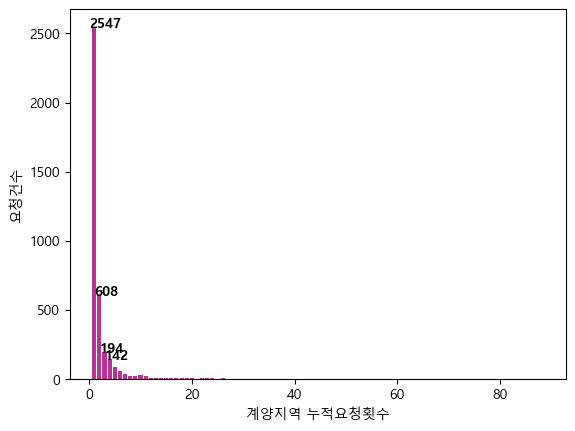

In [32]:
누적요청횟수2=누적요청횟수[누적요청횟수['누적요청횟수']<100]
plt.bar(누적요청횟수2['누적요청횟수'].value_counts().index, 누적요청횟수2['누적요청횟수'].value_counts().values, color='#B53691')

for i, v in enumerate(누적요청횟수['누적요청횟수'].value_counts().values):
    if i > 3:
        break
    plt.text(i, v, str(v), color='black', fontweight='bold')
    
plt.xlabel('계양지역 누적요청횟수')
plt.ylabel('요청건수')

- 20미만 누적요청횟수 시각화

Text(0, 0.5, '요청건수')

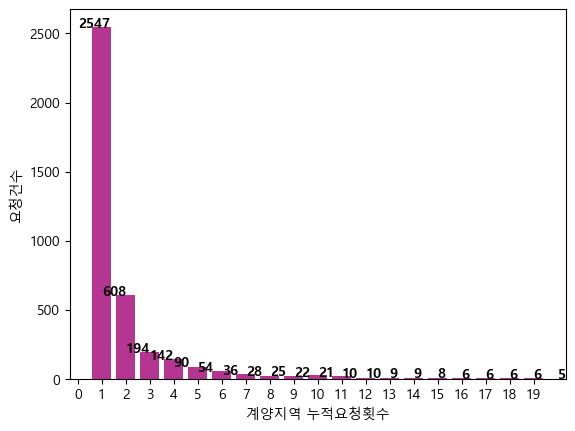

In [33]:
누적요청횟수3=누적요청횟수[누적요청횟수['누적요청횟수']<20]
plt.bar(누적요청횟수3['누적요청횟수'].value_counts().index, 누적요청횟수3['누적요청횟수'].value_counts().values, color='#B53691')
plt.xticks(np.arange(0, 20, 1))

for i, v in enumerate(누적요청횟수['누적요청횟수'].value_counts().values):
    if i > 20:
        break
    plt.text(i, v, str(v), color='black', fontweight='bold')


plt.xlabel('계양지역 누적요청횟수')
plt.ylabel('요청건수')

In [34]:
누적=pd.DataFrame(누적요청횟수.value_counts(), columns=['count'])
누적['%']=round(누적['count']/sum(누적['count'])*100,2)
누적.head(5)

count      %
누적요청횟수              
1        2547  65.63
2         608  15.67
3         194   5.00
4         142   3.66
5          90   2.32

-> 실제로count를 해보았을 때 1회요청이 2,547명으로 가장 많았고 2회 누적요청이 608명으로 많았다.

-> 반복 요청 없이 1회요청만으로 서비스 사용을 마무리한 사용자는 65.63%  

### 3-2. 검단

In [35]:
#실수요여부가 1인 데이터만 추출
누적요청횟수=검단[(검단['실수요여부']==1)][['누적요청횟수']]
누적요청횟수.mean()

누적요청횟수    2.920318
dtype: float64

- 누적요청횟수 시각화

Text(0, 0.5, '요청건수')

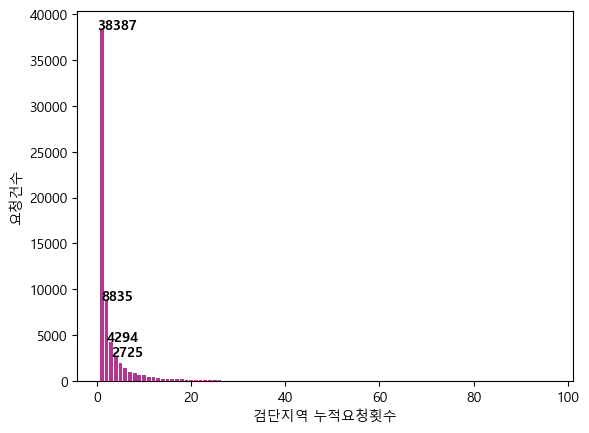

In [36]:
plt.bar(누적요청횟수['누적요청횟수'].value_counts().index, 누적요청횟수['누적요청횟수'].value_counts().values, color='#B53691')
for i, v in enumerate(누적요청횟수['누적요청횟수'].value_counts().values):
    if i > 3:
        break
    plt.text(i, v, str(v), color='black', fontweight='bold')
    

plt.xlabel('검단지역 누적요청횟수')
plt.ylabel('요청건수')

- 100미만 누적요청횟수 시각화

Text(0, 0.5, '요청건수')

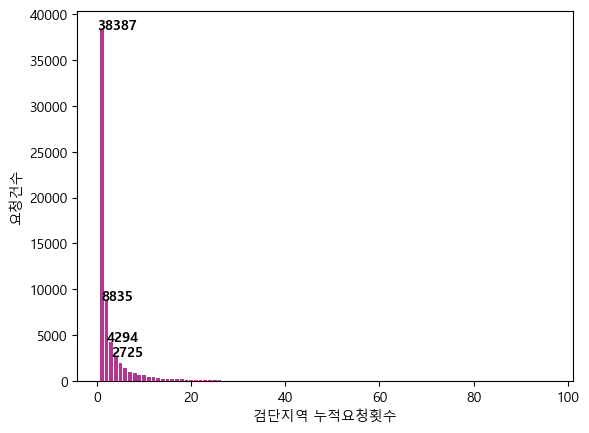

In [37]:
누적요청횟수2=누적요청횟수[누적요청횟수['누적요청횟수']<100]
plt.bar(누적요청횟수2['누적요청횟수'].value_counts().index, 누적요청횟수2['누적요청횟수'].value_counts().values, color='#B53691')
for i, v in enumerate(누적요청횟수['누적요청횟수'].value_counts().values):
    if i > 3:
        break
    plt.text(i, v, str(v), color='black', fontweight='bold')
    

plt.xlabel('검단지역 누적요청횟수')
plt.ylabel('요청건수')

- 20미만 누적요청횟수 시각화

Text(0, 0.5, '요청건수')

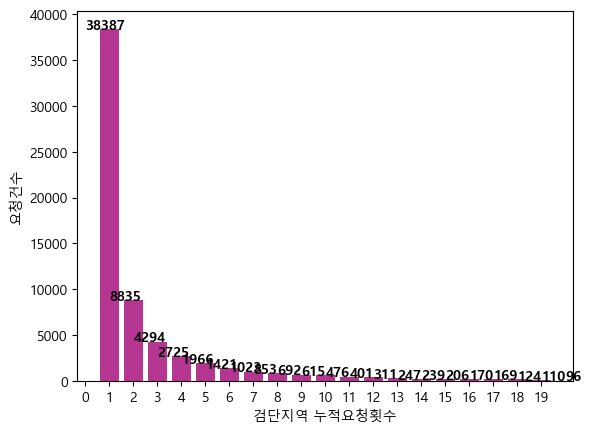

In [38]:
누적요청횟수3=누적요청횟수[누적요청횟수['누적요청횟수']<20]
plt.bar(누적요청횟수3['누적요청횟수'].value_counts().index, 누적요청횟수3['누적요청횟수'].value_counts().values, color='#B53691')
plt.xticks(np.arange(0, 20, 1))
for i, v in enumerate(누적요청횟수['누적요청횟수'].value_counts().values):
    if i > 20:
        break
    plt.text(i, v, str(v), color='black', fontweight='bold')
    

plt.xlabel('검단지역 누적요청횟수')
plt.ylabel('요청건수')

In [39]:
누적=pd.DataFrame(누적요청횟수.value_counts(), columns=['count'])
누적['%']=round(누적['count']/sum(누적['count'])*100,2)
누적.head(5)

count      %
누적요청횟수              
1       38387  59.80
2        8835  13.76
3        4294   6.69
4        2725   4.25
5        1966   3.06

-> 실제로count를 해보았을 때 1회요청이 38,387명으로 가장 많았고 2회 누적요청이 8,835명으로 많았다.

-> 반복 요청 없이 1회요청만으로 서비스 사용을 마무리한 사용자는 59.8%  

### 3-3. 송도

In [40]:
#실수요여부가 1인 데이터만 추출
누적요청횟수=송도[송도['실수요여부']==1][['누적요청횟수']]
누적요청횟수.mean()

누적요청횟수    5.059164
dtype: float64

- 누적요청횟수 시각화

Text(0, 0.5, '요청건수')

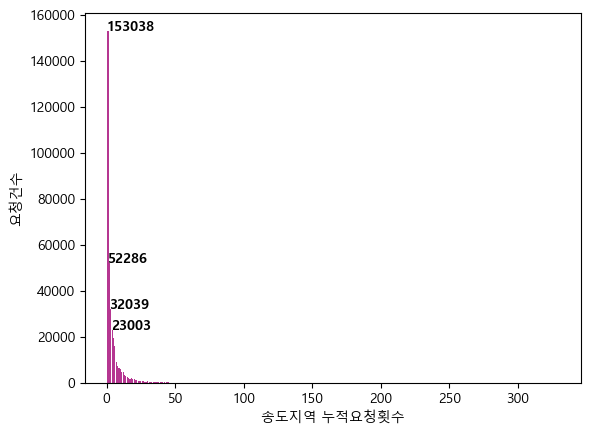

In [41]:
plt.bar(누적요청횟수['누적요청횟수'].value_counts().index, 누적요청횟수['누적요청횟수'].value_counts().values, color='#B53691')

for i, v in enumerate(누적요청횟수['누적요청횟수'].value_counts().values):
    if i > 3:
        break
    plt.text(i, v, str(v), color='black', fontweight='bold')
    

plt.xlabel('송도지역 누적요청횟수')
plt.ylabel('요청건수')

- 100미만 누적요청횟수 시각화

Text(0, 0.5, '요청건수')

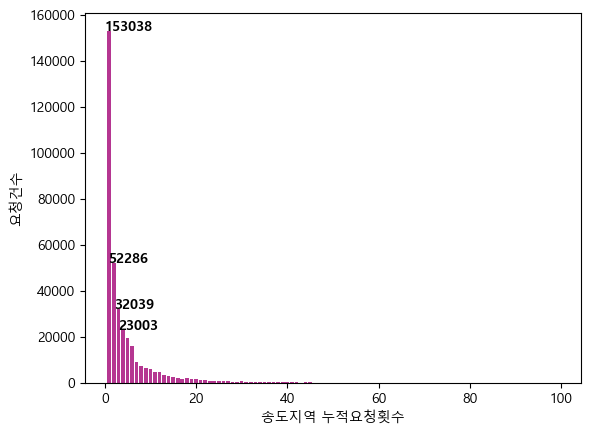

In [42]:
누적요청횟수2=누적요청횟수[누적요청횟수['누적요청횟수']<100]
plt.bar(누적요청횟수2['누적요청횟수'].value_counts().index, 누적요청횟수2['누적요청횟수'].value_counts().values, color='#B53691')

for i, v in enumerate(누적요청횟수['누적요청횟수'].value_counts().values):
    if i > 3:
        break
    plt.text(i, v, str(v), color='black', fontweight='bold')
    

plt.xlabel('송도지역 누적요청횟수')
plt.ylabel('요청건수')

- 20미만 누적요청횟수 시각화

Text(0, 0.5, '요청건수')

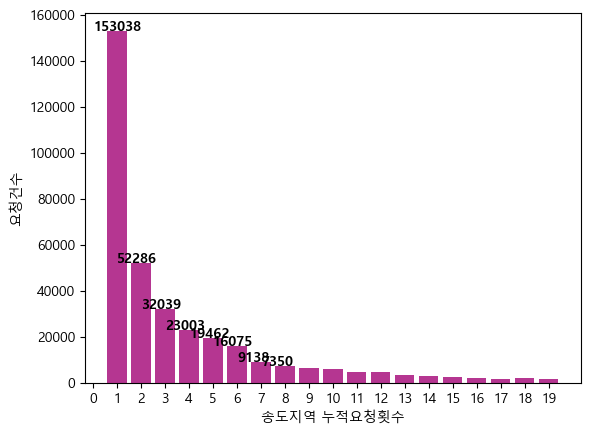

In [43]:
누적요청횟수3=누적요청횟수[누적요청횟수['누적요청횟수']<20]
plt.bar(누적요청횟수3['누적요청횟수'].value_counts().index, 누적요청횟수3['누적요청횟수'].value_counts().values, color='#B53691')
plt.xticks(np.arange(0, 20, 1))
# show the value of each bar above the bar
for i, v in enumerate(누적요청횟수['누적요청횟수'].value_counts().values):
    if i > 7:
        break
    plt.text(i, v, str(v), color='black', fontweight='bold')
    

plt.xlabel('송도지역 누적요청횟수')
plt.ylabel('요청건수')

In [44]:
누적=pd.DataFrame(누적요청횟수.value_counts(), columns=['count'])
누적['%']=round(누적['count']/sum(누적['count'])*100,2)
누적.head(5)

count      %
누적요청횟수               
1       153038  41.45
2        52286  14.16
3        32039   8.68
4        23003   6.23
5        19462   5.27


-> 요청 횟수에 따른 실수요 여부를 확인해보았을 때, 1회 요청만으로 서비스를 마무리한 사용자가 가장 많았다. 이후 지수적으로 감소하는 것을 확인할 수 있다.

=> 계양, 검단 지역의 경우 중복된 요청횟수의 평균이 2~3정도인 반면, 송도지역은 중복요청횟수의 평균 5회임을 볼 수 있다.

 ### 🔗 분석4) 중복 요청 횟수에 따른 배차상태여부 특성파악(실수요 요청 기준)

In [45]:
#실수요 사용자이면서 누적요청횟수가 1이고 상태가 하차완료인 row를 추출
#row개수 출력
len(df[(df['실수요여부']==1)&(df['누적요청횟수']==1) & (df['상태'].str.contains('하차완료'))]) / len(df[(df['실수요여부']==1)& (df['누적요청횟수']==1)]) * 100

58.10065370259625

-> 나머지 약 42%의 사용자는 1회 배차요청후 배차불가나 탑승취소의 이유로 이용하지 못한 후, 승차요청 재시도를 하지 않음을 확인할 수 있음

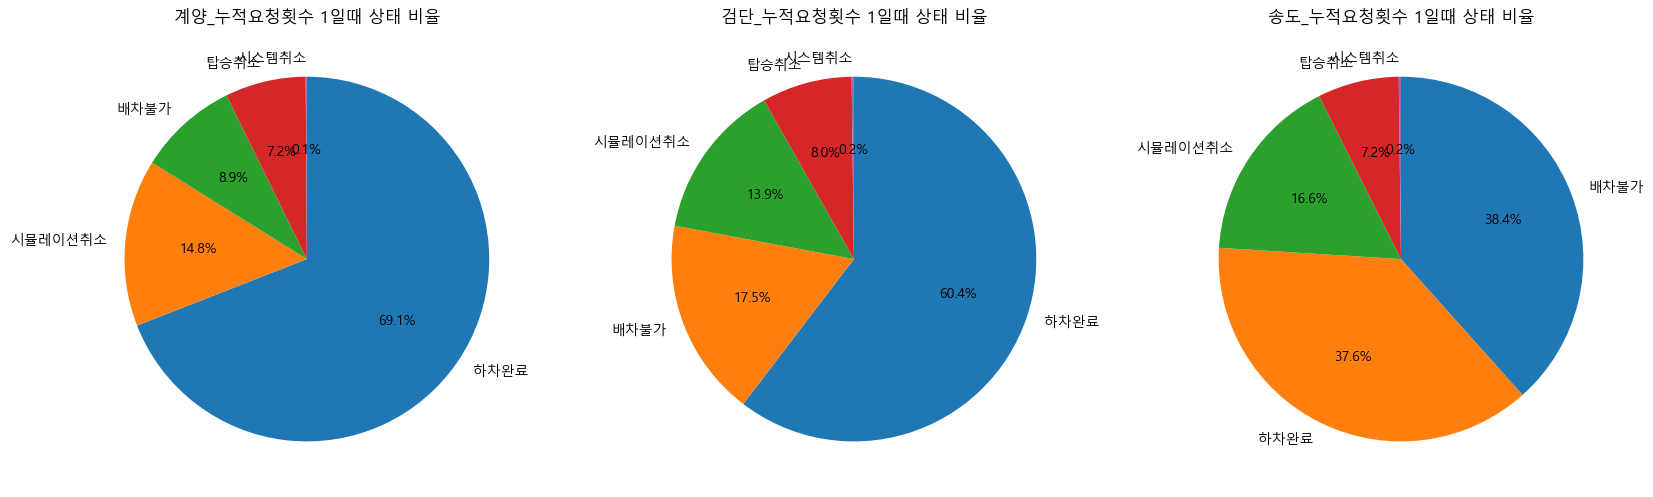

In [46]:
누적요청횟수=df[(df['실수요여부']==1) & (df['누적요청횟수'] == 1)][['상태','누적요청횟수','지역','요청식별id']]

계양_누적요청횟수=계양[계양['실수요여부']==1][['상태']]
검단_누적요청횟수=검단[검단['실수요여부']==1][['상태']]
송도_누적요청횟수=송도[송도['실수요여부']==1][['상태']]

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.pie(계양_누적요청횟수['상태'].value_counts(), labels=계양_누적요청횟수['상태'].value_counts().index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('계양_누적요청횟수 1일때 상태 비율')
plt.subplot(1,3,2)
plt.pie(검단_누적요청횟수['상태'].value_counts(), labels=검단_누적요청횟수['상태'].value_counts().index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('검단_누적요청횟수 1일때 상태 비율')
plt.subplot(1,3,3)
plt.pie(송도_누적요청횟수['상태'].value_counts(), labels=송도_누적요청횟수['상태'].value_counts().index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('송도_누적요청횟수 1일때 상태 비율')
plt.show()

계양과 검단은 1번 요청했는데도 배차가 되는 경우가 많지만, 송도는 1번 요청했을때 배차가 되지 않는 경우가 많았다.

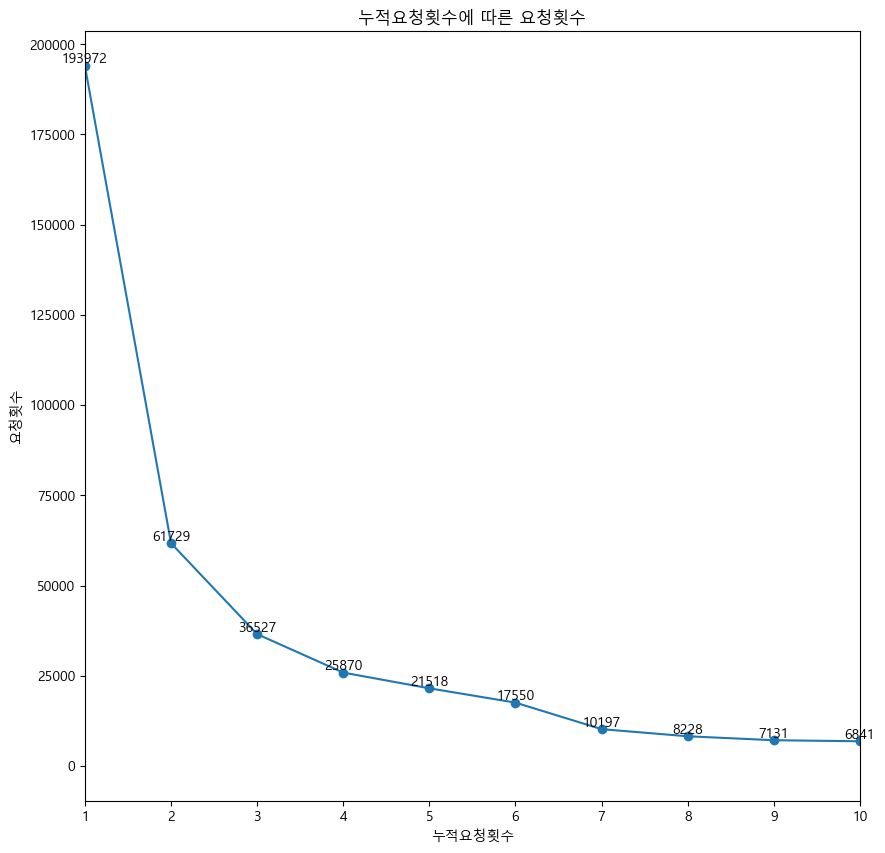

In [47]:
누적요청횟수=df[(df['실수요여부']==1)][['상태','누적요청횟수','지역','요청식별id']]
plt.figure(figsize=(10,10))
plt.plot(누적요청횟수['누적요청횟수'].value_counts().index, 누적요청횟수['누적요청횟수'].value_counts().values, 'o-')
plt.xlim(1,10)

for i, v in enumerate(누적요청횟수['누적요청횟수'].value_counts().values):
    if i > 9:
        break
    plt.text(i+1, v, str(v), fontsize=10, color='black', horizontalalignment='center', verticalalignment='bottom')

plt.title('누적요청횟수에 따른 요청횟수')
plt.xlabel('누적요청횟수')
plt.ylabel('요청횟수')
plt.show()

누적요청횟수에 따른 실요청건수 변화를 알아보았다. 이어서 이에따른 상태 변화도 같이 파악해보자.

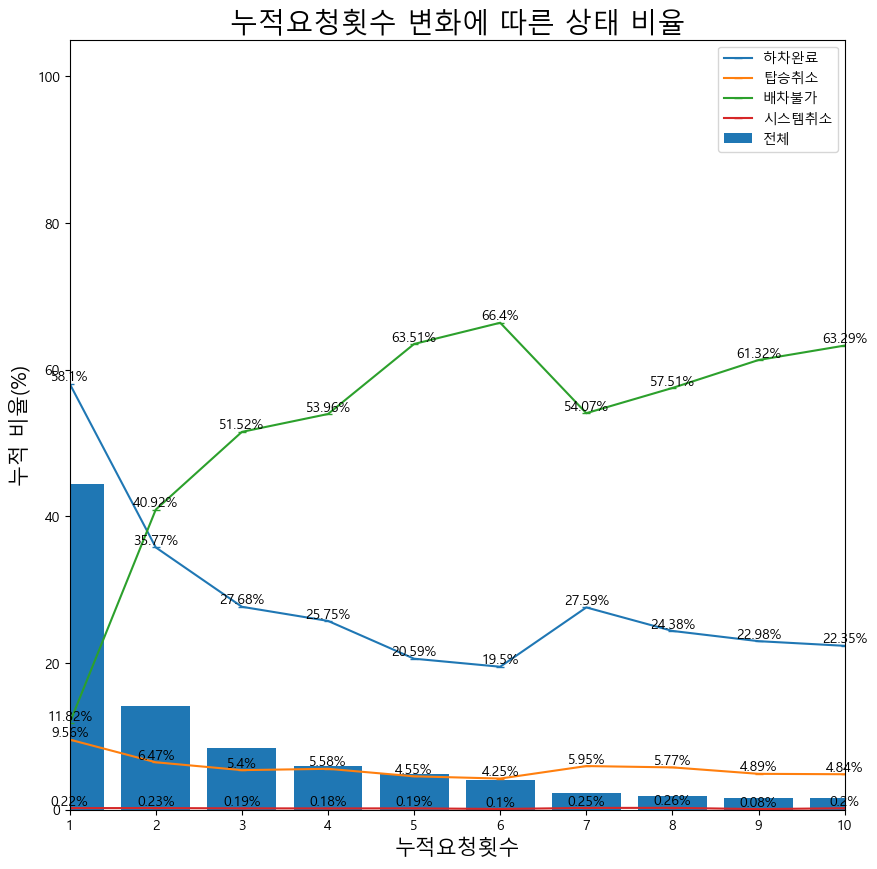

In [48]:
plt.figure(figsize=(10,10))

plt.bar(누적요청횟수['누적요청횟수'].value_counts().index, 누적요청횟수['누적요청횟수'].value_counts() / 누적요청횟수['누적요청횟수'].value_counts().sum() * 100, label='전체')

plt.plot(누적요청횟수['누적요청횟수'].value_counts().index, 누적요청횟수[누적요청횟수['상태']=='하차완료']['누적요청횟수'].value_counts() / 누적요청횟수['누적요청횟수'].value_counts() * 100, label='하차완료', marker='_')
for i, v in enumerate(누적요청횟수[누적요청횟수['상태']=='하차완료']['누적요청횟수'].value_counts() / 누적요청횟수['누적요청횟수'].value_counts() * 100):
    if i > 9:
        break
    plt.text(i+1, v, str(round(v,2))+'%', fontsize=10, color='black', horizontalalignment='center', verticalalignment='bottom')


plt.plot(누적요청횟수['누적요청횟수'].value_counts().index, 누적요청횟수[누적요청횟수['상태']=='탑승취소']['누적요청횟수'].value_counts() / 누적요청횟수['누적요청횟수'].value_counts() * 100, label='탑승취소',marker='_')
for i, v in enumerate(누적요청횟수[누적요청횟수['상태']=='탑승취소']['누적요청횟수'].value_counts() / 누적요청횟수['누적요청횟수'].value_counts() * 100):
    if i > 9:
        break
    plt.text(i+1, v, str(round(v,2))+'%', fontsize=10, color='black', horizontalalignment='center', verticalalignment='bottom')

plt.plot(누적요청횟수['누적요청횟수'].value_counts().index, 누적요청횟수[누적요청횟수['상태']=='배차불가']['누적요청횟수'].value_counts() / 누적요청횟수['누적요청횟수'].value_counts() * 100, label='배차불가',marker='_')
for i, v in enumerate(누적요청횟수[누적요청횟수['상태']=='배차불가']['누적요청횟수'].value_counts() / 누적요청횟수['누적요청횟수'].value_counts() * 100):
    if i > 9:
        break
    plt.text(i+1, v, str(round(v,2))+'%', fontsize=10, color='black', horizontalalignment='center', verticalalignment='bottom')

plt.plot(누적요청횟수['누적요청횟수'].value_counts().index, 누적요청횟수[누적요청횟수['상태']=='시스템취소']['누적요청횟수'].value_counts() / 누적요청횟수['누적요청횟수'].value_counts() * 100, label='시스템취소',marker='_')
for i, v in enumerate(누적요청횟수[누적요청횟수['상태']=='시스템취소']['누적요청횟수'].value_counts() / 누적요청횟수['누적요청횟수'].value_counts() * 100):
    if i > 9:
        break
    plt.text(i+1, v, str(round(v,2))+'%', fontsize=10, color='black', horizontalalignment='center', verticalalignment='bottom')

plt.ylabel('누적 비율(%)', fontsize=15)
plt.xlabel('누적요청횟수', fontsize=15)
plt.legend()
plt.title('누적요청횟수 변화에 따른 상태 비율', fontsize=20)
plt.xlim(1,10)

plt.show()

### 🔗 분석5) 배차대기시간 분포 시각화(실수요 고객+하차완료 고객 기준)
- 배차대기시간 계산 : (최종 승차시간-최초 승차 요청시간)으로 최초 버스 승차요청시간부터 실제 승차까지 소요된 시간을 요청대기시간으로 정의

### 5-1. 계양

In [49]:
#실수요고객+하차완료 고객 추출
실수요_하차=계양[(계양['실수요여부']==1)&(계양['상태']=='하차완료')]

#배차대기시간 계산
실수요_하차['대기시간']=실수요_하차['승차시간']-실수요_하차['최초요청시간']

In [50]:
실수요_하차.대기시간.min(), 실수요_하차.대기시간.max()

(Timedelta('0 days 00:00:14'), Timedelta('0 days 00:35:29'))

-> 최소 대기 14초 대기, 최대 대기는 35분 29초 소요인 것을 확인함

In [51]:
#시간의 차는 timeelta형식이기 때문에 일수 or 초 기준으로만 추출가능
#초형식(dt.seconds)으로 추출 후 60으로 나누어주어 분으로 환산
#계산상 초단위 오차가 발생하여 반올림을 진행하였습니다.
실수요_하차['대기시간']=round((실수요_하차['대기시간'].dt.seconds)/60,0)

#정수형 변환
실수요_하차['대기시간']=실수요_하차['대기시간'].astype(int)

In [52]:
실수요_하차.head(1)

순번 호출유형  지역    배차차량 승무사원명    상태                요청시간 취소시간 승차정류장명  승차정류장방면  \
17  15    I  계양  계양1호차    김*철  하차완료 2021-12-30 14:29:42  NaN   계양역   다남식당 방면   

           하차정류장명   하차정류장방면           승차지시뮬레이션시간 승차지최초도착예정시간  \
17  목상동솔밭.이주단지입구   목상교차로 방면  2021-12-30 14:38:01         NaN   

              승차지도착예정시간              승차지도착시간                승차시간  \
17  2021-12-30 14:38:57  2021-12-30 14:38:34 2021-12-30 14:38:39   

             하차지시뮬레이션시간 하차지최초도착예정시간            하차지도착예정시간              하차지도착시간  \
17  2021-12-30 14:41:58         NaN  2021-12-30 14:46:10  2021-12-30 14:46:13   

                  하차시간        탑승권아이디  탑승총계  어른  청소년  어린이    요금 구독제_여부    거리  \
17 2021-12-30 14:46:13  2.112302e+10     1   1    0    0  1800      X  2.42   

   회원유형               배차확정시간                  배차요청위치  평가점수_빠른이동  평가점수_안전운전  \
17   어른  2021-12-30 14:29:50  37.5793984,126.7331156        5.0        5.0   

    평가점수_버스청결도  평가점수_총점 평가메모                  이용신청id         위도          경도  \
17         5.0     15.0  NaN  D211230142942817963816  37.579398  126.733116   

         배차차량번호 구독제 여부  속도  승차정류장id  하차정류장id         사용자id  요청식별id  누적요청시간  \
17  C0000000046    NaN NaN  41357.0  41317.0  U00000000028      17     0.0   

    누적요청횟수  요청시간차이  실수요여부              최초요청시간  대기시간  
17       1   161.0      1 2021-12-30 14:29:42     9

-> 대기시간이 분형식으로 잘 변환된 것을 확인

- 배차대기시간 분포 확인(계양)

<AxesSubplot: >

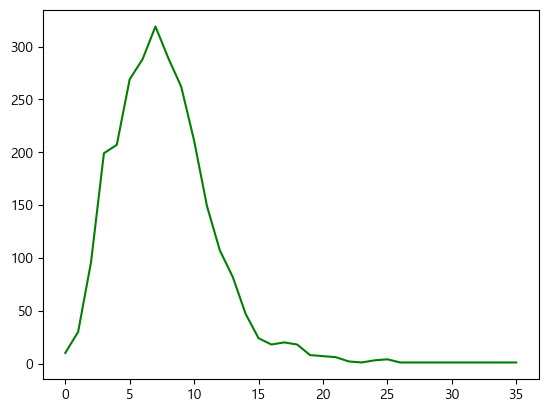

In [53]:
계양_실수요_하차 = pd.DataFrame()
계양_실수요_하차['대기시간'] = 실수요_하차['대기시간']
sns.lineplot(x=실수요_하차['대기시간'].value_counts().index, y=실수요_하차['대기시간'].value_counts().values, color='green')


### 5-2. 검단

In [54]:
#실수요고객+하차완료 고객 추출
실수요_하차=검단[(검단['실수요여부']==1)&(검단['상태']=='하차완료')]

#배차대기시간 계산
실수요_하차['대기시간']=실수요_하차['승차시간']-실수요_하차['최초요청시간']

In [55]:
실수요_하차.대기시간.min(), 실수요_하차.대기시간.max()

(Timedelta('0 days 00:00:15'), Timedelta('0 days 00:57:26'))

-> 최소 대기 15초 대기, 최대 대기는 57분26초 소요인 것을 확인함

In [56]:
#시간의 차는 timeelta형식이기 때문에 일수 or 초 기준으로만 추출가능
#초형식(dt.seconds)으로 추출 후 60으로 나누어주어 분으로 환산
#계산상 초단위 오차가 발생하여 반올림을 진행하였습니다.
실수요_하차['대기시간']=round((실수요_하차['대기시간'].dt.seconds)/60,0)

#정수형 변환
실수요_하차['대기시간']=실수요_하차['대기시간'].astype(int)

검단_실수요_하차 = pd.DataFrame()
검단_실수요_하차['대기시간'] = 실수요_하차['대기시간']

In [57]:
실수요_하차.head(1)

순번 호출유형  지역    배차차량 승무사원명    상태                요청시간 취소시간   승차정류장명  \
28  27    I  검단  검단2호차    민*권  하차완료 2021-09-14 14:19:36  NaN  참빛감리교회    

     승차정류장방면    하차정류장명      하차정류장방면           승차지시뮬레이션시간 승차지최초도착예정시간  \
28  대우푸르지오방면  아라센트럴파크   검단LH행복주택 방면  2021-09-14 14:34:10         NaN   

              승차지도착예정시간              승차지도착시간                승차시간  \
28  2021-09-14 14:41:51  2021-09-14 14:40:50 2021-09-14 14:41:06   

             하차지시뮬레이션시간 하차지최초도착예정시간            하차지도착예정시간              하차지도착시간  \
28  2021-09-14 14:40:13         NaN  2021-09-14 14:57:40  2021-09-14 14:57:33   

                  하차시간        탑승권아이디  탑승총계  어른  청소년  어린이    요금 구독제_여부    거리  \
28 2021-09-14 14:57:33  2.109141e+10     1   1    0    0  1800    NaN  1.51   

   회원유형               배차확정시간                 배차요청위치  평가점수_빠른이동  평가점수_안전운전  \
28   어른  2021-09-14 14:19:40  37.594038,126.6941428        5.0        5.0   

    평가점수_버스청결도  평가점수_총점 평가메모                  이용신청id         위도          경도  \
28         5.0     15.0  NaN  D210914141936633731047  37.594038  126.694143   

         배차차량번호 구독제 여부  속도  승차정류장id  하차정류장id         사용자id  요청식별id  누적요청시간  \
28  C0000000040      X NaN  42437.0  89407.0  U00000000045      28     0.0   

    누적요청횟수  요청시간차이  실수요여부              최초요청시간  대기시간  
28       1   485.0      1 2021-09-14 14:19:36    22

-> 대기시간이 분형식으로 잘 변환된 것을 확인

- 배차대기시간 분포 확인(검단)

<AxesSubplot: >

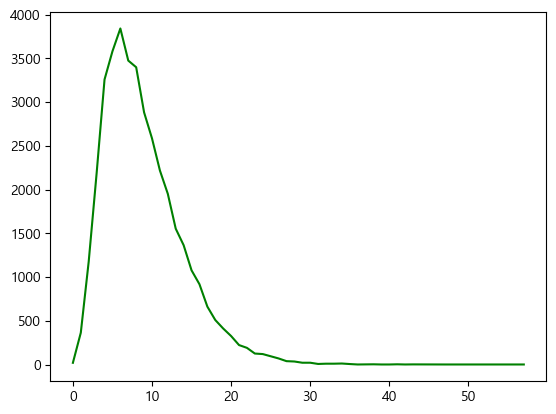

In [58]:
#히스토그램+밀도추정그래프
sns.lineplot(x=실수요_하차['대기시간'].value_counts().index, y=실수요_하차['대기시간'].value_counts().values, color='green')

### 5-3. 송도

In [59]:
#실수요고객+하차완료 고객 추출
실수요_하차=송도[(송도['실수요여부']==1)&(송도['상태']=='하차완료')]

#배차대기시간 계산
실수요_하차['대기시간']=실수요_하차['승차시간']-실수요_하차['최초요청시간']

In [60]:
실수요_하차.대기시간.min(), 실수요_하차.대기시간.max()

(Timedelta('0 days 00:00:15'), Timedelta('0 days 01:44:21'))

-> 최소 대기 15초 대기, 최대 대기는 1시간44분 소요인 것을 확인함

In [61]:
#시간의 차는 timeelta형식이기 때문에 일수 or 초 기준으로만 추출가능
#초형식(dt.seconds)으로 추출 후 60으로 나누어주어 분으로 환산
#계산상 초단위 오차가 발생하여 반올림을 진행하였습니다.
실수요_하차['대기시간']=round((실수요_하차['대기시간'].dt.seconds)/60,0)

#정수형 변환
실수요_하차['대기시간']=실수요_하차['대기시간'].astype(int)

송도_실수요_하차 = pd.DataFrame()
송도_실수요_하차['대기시간'] = 실수요_하차['대기시간']

In [62]:
실수요_하차.head(1)

순번 호출유형  지역    배차차량 승무사원명    상태                요청시간 취소시간   승차정류장명  \
13  4894    I  송도  송도6호차    남*우  하차완료 2021-12-27 19:13:23  NaN  테크노파크역    

      승차정류장방면       하차정류장명        하차정류장방면           승차지시뮬레이션시간 승차지최초도착예정시간  \
13  캠퍼스타운역 방면  송도오션파크베르디움   미송초등학교(하행) 방면  2021-12-27 19:17:13         NaN   

              승차지도착예정시간              승차지도착시간                승차시간  \
13  2021-12-27 19:18:00  2021-12-27 19:18:25 2021-12-27 19:18:34   

             하차지시뮬레이션시간 하차지최초도착예정시간            하차지도착예정시간              하차지도착시간  \
13  2021-12-27 19:34:40         NaN  2021-12-27 19:34:00  2021-12-27 19:34:46   

                  하차시간        탑승권아이디  탑승총계  어른  청소년  어린이    요금 구독제_여부    거리  \
13 2021-12-27 19:34:46  2.112271e+10     2   2    0    0  3600    NaN  5.04   

   회원유형               배차확정시간                  배차요청위치  평가점수_빠른이동  평가점수_안전운전  \
13   어른  2021-12-27 19:13:36  37.3810037,126.6565613        NaN        NaN   

    평가점수_버스청결도  평가점수_총점 평가메모                  이용신청id         위도          경도  \
13         NaN      NaN  NaN  D211227191323808926718  37.381004  126.656561   

         배차차량번호 구독제 여부  속도  승차정류장id  하차정류장id         사용자id  요청식별id  누적요청시간  \
13  C0000000036      X NaN  38422.0  38642.0  U00000000028      13     0.0   

    누적요청횟수   요청시간차이  실수요여부              최초요청시간  대기시간  
13       1  49082.0      1 2021-12-27 19:13:23     5

-> 대기시간이 분형식으로 잘 변환된 것을 확인

- 배차대기시간 분포 확인(송도)

<AxesSubplot: >

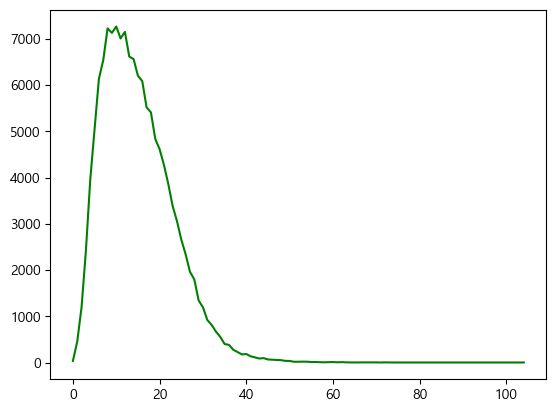

In [63]:
#히스토그램
sns.lineplot(x=실수요_하차['대기시간'].value_counts().index, y=실수요_하차['대기시간'].value_counts().values, color='green')

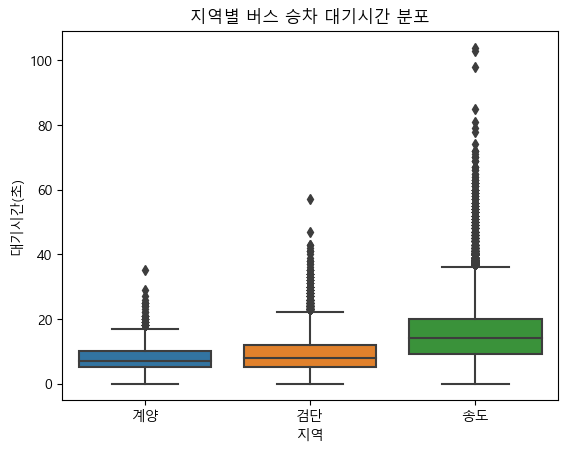

In [64]:
sns.boxplot(data=[계양_실수요_하차['대기시간'], 검단_실수요_하차['대기시간'], 송도_실수요_하차['대기시간']], orient='v')

plt.title('지역별 버스 승차 대기시간 분포')
plt.ylabel('대기시간(초)')
plt.xlabel('지역')
plt.xticks([0,1,2], ['계양', '검단', '송도'])

plt.show()

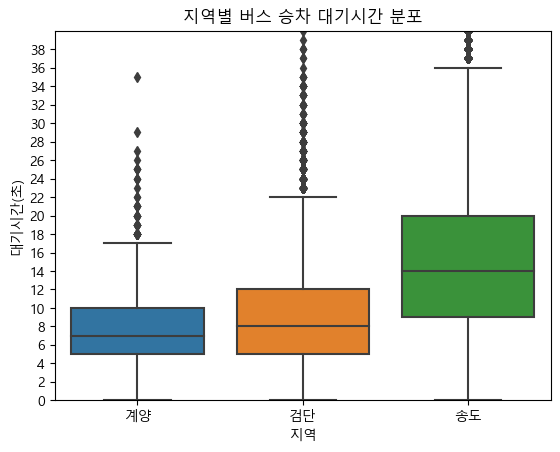

In [65]:
sns.boxplot(data=[계양_실수요_하차['대기시간'], 검단_실수요_하차['대기시간'], 송도_실수요_하차['대기시간']], orient='v')

plt.title('지역별 버스 승차 대기시간 분포')
plt.ylim(0, 40)
# more detailed y-axis
plt.yticks(np.arange(0, 40, 2))

plt.ylabel('대기시간(초)')
plt.xlabel('지역')
plt.xticks([0,1,2], ['계양', '검단', '송도'])

plt.show()


### 중복을 제거하지 않은 데이터셋의 지역별 상태값의 비율

In [66]:
계양상태비율 = 계양['상태'].value_counts() / len(계양) * 100
검단상태비율 = 검단['상태'].value_counts() / len(검단) * 100
송도상태비율 = 송도['상태'].value_counts() / len(송도) * 100

지역별상태비율 = pd.DataFrame([계양상태비율, 검단상태비율, 송도상태비율], index=['계양', '검단', '송도'])

지역별상태비율 = 지역별상태비율.T
지역별상태비율



계양         검단         송도
배차불가     46.715954  60.184355  81.632598
하차완료     29.583199  20.676503   7.433119
시뮬레이션취소  19.147112  14.431571   8.635868
탑승취소      4.114433   4.326697   2.120551
시스템취소     0.439301   0.380873   0.177864

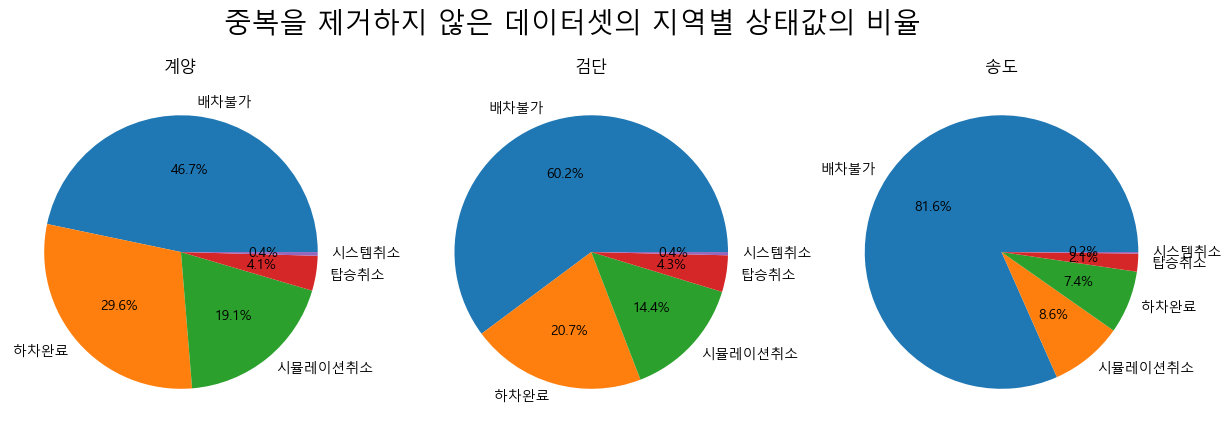

In [67]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, region in enumerate(['계양', '검단', '송도']):
    data = locals()[region]['상태'].value_counts() / len(locals()[region]) * 100
    axes[i].pie(data, labels=data.index, autopct='%.1f%%')
    axes[i].set_title(region)
    
fig.suptitle('중복을 제거하지 않은 데이터셋의 지역별 상태값의 비율', fontsize=20)

plt.show()

### 중복을 제거한 데이터 셋에서 지역별 상태값의 비율

In [68]:
계양상태비율 = 계양[계양['실수요여부']==1]['상태'].value_counts() / len(계양[계양['실수요여부']==1]) * 100
검단상태비율 = 검단[검단['실수요여부']==1]['상태'].value_counts() / len(검단[검단['실수요여부']==1]) * 100
송도상태비율 = 송도[송도['실수요여부']==1]['상태'].value_counts() / len(송도[송도['실수요여부']==1]) * 100

지역별상태비율 = pd.DataFrame([계양상태비율, 검단상태비율, 송도상태비율], index=['계양', '검단', '송도'])

지역별상태비율 = 지역별상태비율.T
지역별상태비율



계양         검단         송도
하차완료     69.054367  60.377300  37.595618
시뮬레이션취소  14.815769  13.872229  16.603734
배차불가      8.863695  17.548642  38.387111
탑승취소      7.163102   7.999315   7.219050
시스템취소     0.103066   0.202514   0.194487

Text(0.5, 0.98, '중복을 제거한 데이터 셋에서 지역별 상태값의 비율')

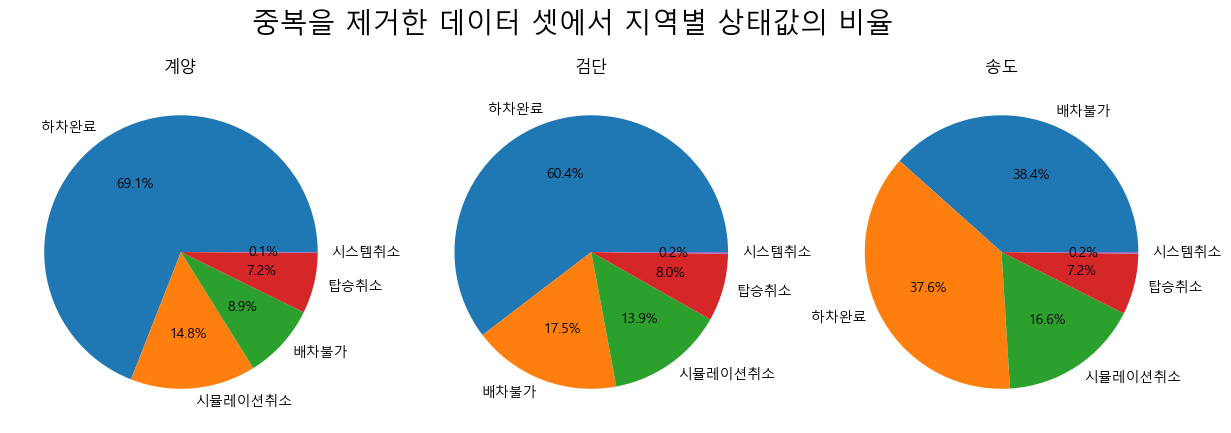

In [69]:
# df 데이터프레임 ,지역별 상태가 하차완료인 비율

계양[계양['실수요여부']==1]['상태'].value_counts() / len(계양) * 100
검단[검단['실수요여부']==1]['상태'].value_counts() / len(검단) * 100
송도[송도['실수요여부']==1]['상태'].value_counts() / len(송도) * 100

# with above data, make a pie chart for each region, draw it in a row with 3 columns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# for each region, draw a pie chart
for i, region in enumerate(['계양', '검단', '송도']):
    # get the data for each region
    data = locals()[region][locals()[region]['실수요여부']==1]['상태'].value_counts() / len(locals()[region]) * 100
    # draw a pie chart
    axes[i].pie(data, labels=data.index, autopct='%.1f%%')
    # set the title
    axes[i].set_title(region)

fig.suptitle('중복을 제거한 데이터 셋에서 지역별 상태값의 비율', fontsize=20)


### 🔗 분석6) 지역별 배차요청 접수 후 차량이 배차지까지 이동하는 시간분포

In [70]:
배차이동시간=df[(df['실수요여부']==1)&(df['상태']=='하차완료')]

# 배차이동시간['배차이동시간'] = 배차이동시간['승차지도착시간'] - 배차이동시간['배차확정시간'] change dtype to  supported type for subtracting time
배차이동시간['배차이동시간'] = 배차이동시간['승차지도착시간'].astype('datetime64[ns]') - 배차이동시간['배차확정시간'].astype('datetime64[ns]')


# 배차이동시간['배차이동시간']을 분단위 .02float값으로 변환
배차이동시간['배차이동시간'] = round(배차이동시간['배차이동시간'].dt.total_seconds() / 60,2)


Text(0, 0.5, '배차이동시간의 빈도수')

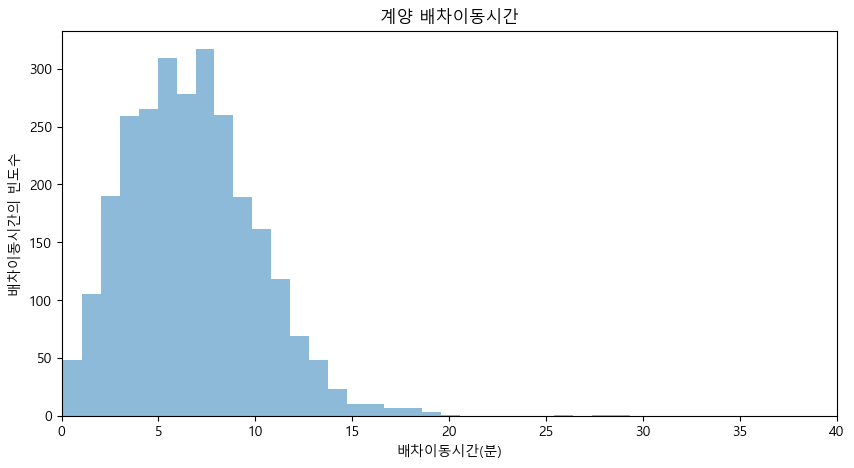

In [71]:
계양_배차이동시간 = 배차이동시간[배차이동시간['지역']=='계양']
계양_배차이동시간['배차이동시간'].plot(kind='hist', bins=30, figsize=(10, 5), alpha=0.5, title='계양 배차이동시간', xlim=(0, 40))

plt.xlabel('배차이동시간(분)')
plt.ylabel('배차이동시간의 빈도수')

Text(0, 0.5, '배차이동시간의 빈도수')

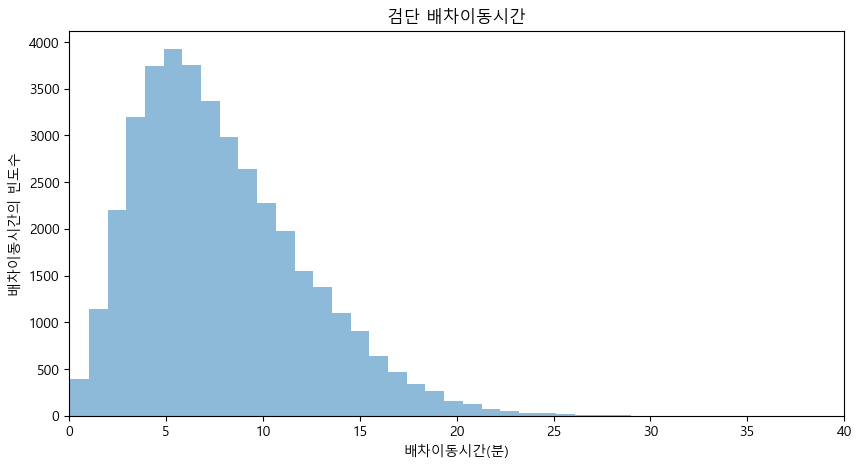

In [72]:
# 검단_배차이동시간['배차이동시간']의 분포를 선 그래프를 이용해서 시각화, x축의 범위를 0~30으로 제한
검단_배차이동시간 = 배차이동시간[배차이동시간['지역']=='검단']
검단_배차이동시간['배차이동시간'].plot(kind='hist', bins=100, figsize=(10, 5), alpha=0.5, title='검단 배차이동시간', xlim=(0, 40))

plt.xlabel('배차이동시간(분)')
plt.ylabel('배차이동시간의 빈도수')

Text(0, 0.5, '배차이동시간의 빈도수')

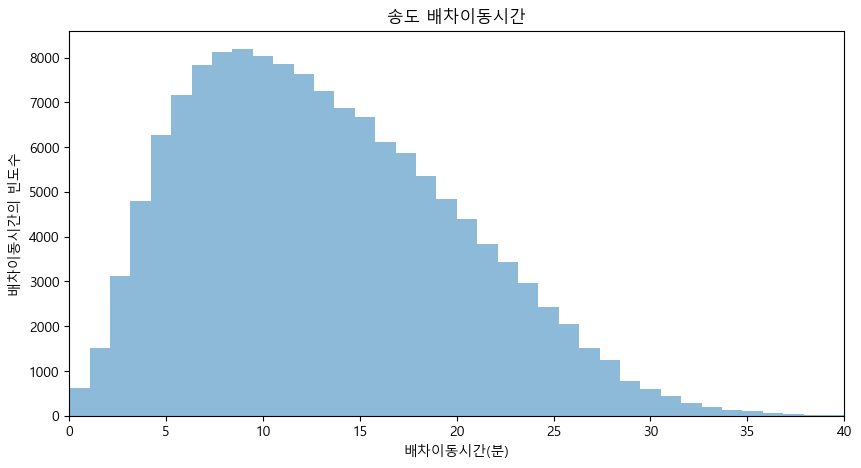

In [73]:
# 검단_배차이동시간['배차이동시간']의 분포를 선 그래프를 이용해서 시각화, x축의 범위를 0~30으로 제한
송도_배차이동시간 = 배차이동시간[배차이동시간['지역']=='송도']
송도_배차이동시간['배차이동시간'].plot(kind='hist', bins=300, figsize=(10, 5), alpha=0.5, title='송도 배차이동시간', xlim=(0, 40))

plt.xlabel('배차이동시간(분)')
plt.ylabel('배차이동시간의 빈도수')

### 🔗 분석7) 차내 이동시간 시각화
- 이동시간 계산 : (하차시간-승차시간)으로 정의

### 7-1. 계양

In [74]:
#실수요고객+하차완료 고객 추출
실수요_하차=계양[(계양['실수요여부']==1)&(계양['상태']=='하차완료')]

In [75]:
#차내 이동시간 계산
실수요_하차['이동시간']=실수요_하차['하차시간']-실수요_하차['승차시간']

In [76]:
실수요_하차.이동시간.min(), 실수요_하차.이동시간.max()

(Timedelta('0 days 00:00:20'), Timedelta('0 days 00:27:52'))

-> 최소 이동시간 20초, 최대 이동시간은 27분 52초인것을 확인

In [77]:
#시간의 차는 timeelta형식이기 때문에 일수 or 초 기준으로만 추출가능
#초형식(dt.seconds)으로 추출 후 60으로 나누어주어 분으로 환산
#계산상 초단위 오차가 발생하여 반올림을 진행
실수요_하차['이동시간']=round((실수요_하차['이동시간'].dt.seconds)/60,0)

#정수형 변환
실수요_하차['이동시간']=실수요_하차['이동시간'].astype(int)

계양_실수요_하차 = 실수요_하차

In [78]:
실수요_하차.head(1)

순번 호출유형  지역    배차차량 승무사원명    상태                요청시간 취소시간 승차정류장명  승차정류장방면  \
17  15    I  계양  계양1호차    김*철  하차완료 2021-12-30 14:29:42  NaN   계양역   다남식당 방면   

           하차정류장명   하차정류장방면           승차지시뮬레이션시간 승차지최초도착예정시간  \
17  목상동솔밭.이주단지입구   목상교차로 방면  2021-12-30 14:38:01         NaN   

              승차지도착예정시간              승차지도착시간                승차시간  \
17  2021-12-30 14:38:57  2021-12-30 14:38:34 2021-12-30 14:38:39   

             하차지시뮬레이션시간 하차지최초도착예정시간            하차지도착예정시간              하차지도착시간  \
17  2021-12-30 14:41:58         NaN  2021-12-30 14:46:10  2021-12-30 14:46:13   

                  하차시간        탑승권아이디  탑승총계  어른  청소년  어린이    요금 구독제_여부    거리  \
17 2021-12-30 14:46:13  2.112302e+10     1   1    0    0  1800      X  2.42   

   회원유형               배차확정시간                  배차요청위치  평가점수_빠른이동  평가점수_안전운전  \
17   어른  2021-12-30 14:29:50  37.5793984,126.7331156        5.0        5.0   

    평가점수_버스청결도  평가점수_총점 평가메모                  이용신청id         위도          경도  \
17         5.0     15.0  NaN  D211230142942817963816  37.579398  126.733116   

         배차차량번호 구독제 여부  속도  승차정류장id  하차정류장id         사용자id  요청식별id  누적요청시간  \
17  C0000000046    NaN NaN  41357.0  41317.0  U00000000028      17     0.0   

    누적요청횟수  요청시간차이  실수요여부              최초요청시간  이동시간  
17       1   161.0      1 2021-12-30 14:29:42     8

-> 이동시간이 분형식으로 잘 변환된 것을 확인

- 차내 이동시간 분포 확인(계양)

Text(0, 0.5, '밀도')

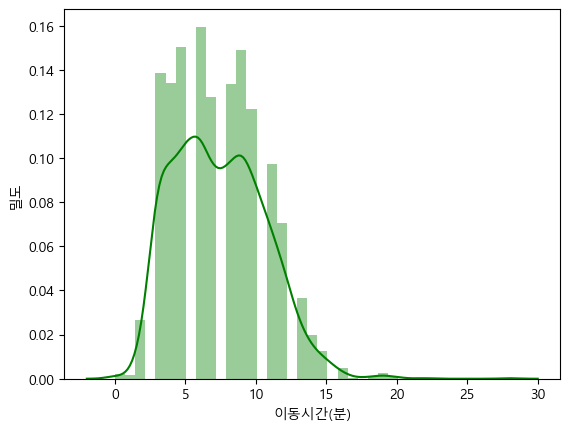

In [79]:
#히스토그램+밀도추정그래프
sns.distplot(실수요_하차['이동시간'], color='green')
# x,y 라벨 설정
plt.xlabel('이동시간(분)')
plt.ylabel('밀도')

### 7-2. 검단

In [80]:
#실수요고객+하차완료 고객 추출
실수요_하차=검단[(검단['실수요여부']==1)&(검단['상태']=='하차완료')]

#차내 이동시간 계산
실수요_하차['이동시간']=실수요_하차['하차시간']-실수요_하차['승차시간']

In [81]:
실수요_하차.이동시간.min(), 실수요_하차.이동시간.max()

(Timedelta('0 days 00:00:01'), Timedelta('0 days 02:52:58'))

-> 최소 이동시간 1초, 최대 이동시간은 2시간 52분 58초 인것을 확인

In [82]:
#시간의 차는 timeelta형식이기 때문에 일수 or 초 기준으로만 추출가능
#초형식(dt.seconds)으로 추출 후 60으로 나누어주어 분으로 환산
#계산상 초단위 오차가 발생하여 반올림을 진행
실수요_하차['이동시간']=round((실수요_하차['이동시간'].dt.seconds)/60,0)

#정수형 변환
실수요_하차['이동시간']=실수요_하차['이동시간'].astype(int)
검단_실수요_하차 = 실수요_하차

In [83]:
실수요_하차.head(1)

순번 호출유형  지역    배차차량 승무사원명    상태                요청시간 취소시간   승차정류장명  \
28  27    I  검단  검단2호차    민*권  하차완료 2021-09-14 14:19:36  NaN  참빛감리교회    

     승차정류장방면    하차정류장명      하차정류장방면           승차지시뮬레이션시간 승차지최초도착예정시간  \
28  대우푸르지오방면  아라센트럴파크   검단LH행복주택 방면  2021-09-14 14:34:10         NaN   

              승차지도착예정시간              승차지도착시간                승차시간  \
28  2021-09-14 14:41:51  2021-09-14 14:40:50 2021-09-14 14:41:06   

             하차지시뮬레이션시간 하차지최초도착예정시간            하차지도착예정시간              하차지도착시간  \
28  2021-09-14 14:40:13         NaN  2021-09-14 14:57:40  2021-09-14 14:57:33   

                  하차시간        탑승권아이디  탑승총계  어른  청소년  어린이    요금 구독제_여부    거리  \
28 2021-09-14 14:57:33  2.109141e+10     1   1    0    0  1800    NaN  1.51   

   회원유형               배차확정시간                 배차요청위치  평가점수_빠른이동  평가점수_안전운전  \
28   어른  2021-09-14 14:19:40  37.594038,126.6941428        5.0        5.0   

    평가점수_버스청결도  평가점수_총점 평가메모                  이용신청id         위도          경도  \
28         5.0     15.0  NaN  D210914141936633731047  37.594038  126.694143   

         배차차량번호 구독제 여부  속도  승차정류장id  하차정류장id         사용자id  요청식별id  누적요청시간  \
28  C0000000040      X NaN  42437.0  89407.0  U00000000045      28     0.0   

    누적요청횟수  요청시간차이  실수요여부              최초요청시간  이동시간  
28       1   485.0      1 2021-09-14 14:19:36    16

-> 이동시간이 분형식으로 잘 변환된 것을 확인

- 차내 이동시간 분포 확인(검단)

Text(0, 0.5, '밀도')

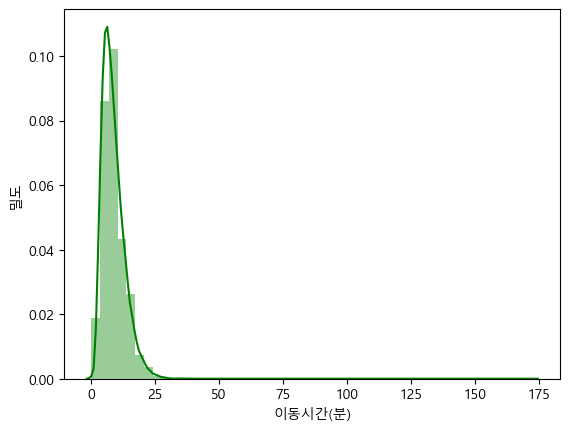

In [84]:
#히스토그램+밀도추정그래프
sns.distplot(실수요_하차['이동시간'], color='green')

# x,y 라벨 설정
plt.xlabel('이동시간(분)')
plt.ylabel('밀도')

### 7-3. 송도

In [85]:
#실수요고객+하차완료 고객 추출
실수요_하차=송도[(송도['실수요여부']==1)&(송도['상태']=='하차완료')]

In [86]:
#차내 이동시간 계산
실수요_하차['이동시간']=실수요_하차['하차시간']-실수요_하차['승차시간']

In [87]:
실수요_하차.이동시간.min(), 실수요_하차.이동시간.max()

# 확인해보자 이상값들

(Timedelta('0 days 00:00:01'), Timedelta('0 days 10:33:55'))

-> 최소 이동시간 1초, 최대 이동시간은 10시간 33분 55초인것을 확인

In [88]:
#시간의 차는 timeelta형식이기 때문에 일수 or 초 기준으로만 추출가능
#초형식(dt.seconds)으로 추출 후 60으로 나누어주어 분으로 환산
#계산상 초단위 오차가 발생하여 반올림을 진행
실수요_하차['이동시간']=round((실수요_하차['이동시간'].dt.seconds)/60,0)

#정수형 변환
실수요_하차['이동시간']=실수요_하차['이동시간'].astype(int)

송도_실수요_하차 = 실수요_하차

In [89]:
실수요_하차.head(1)

순번 호출유형  지역    배차차량 승무사원명    상태                요청시간 취소시간   승차정류장명  \
13  4894    I  송도  송도6호차    남*우  하차완료 2021-12-27 19:13:23  NaN  테크노파크역    

      승차정류장방면       하차정류장명        하차정류장방면           승차지시뮬레이션시간 승차지최초도착예정시간  \
13  캠퍼스타운역 방면  송도오션파크베르디움   미송초등학교(하행) 방면  2021-12-27 19:17:13         NaN   

              승차지도착예정시간              승차지도착시간                승차시간  \
13  2021-12-27 19:18:00  2021-12-27 19:18:25 2021-12-27 19:18:34   

             하차지시뮬레이션시간 하차지최초도착예정시간            하차지도착예정시간              하차지도착시간  \
13  2021-12-27 19:34:40         NaN  2021-12-27 19:34:00  2021-12-27 19:34:46   

                  하차시간        탑승권아이디  탑승총계  어른  청소년  어린이    요금 구독제_여부    거리  \
13 2021-12-27 19:34:46  2.112271e+10     2   2    0    0  3600    NaN  5.04   

   회원유형               배차확정시간                  배차요청위치  평가점수_빠른이동  평가점수_안전운전  \
13   어른  2021-12-27 19:13:36  37.3810037,126.6565613        NaN        NaN   

    평가점수_버스청결도  평가점수_총점 평가메모                  이용신청id         위도          경도  \
13         NaN      NaN  NaN  D211227191323808926718  37.381004  126.656561   

         배차차량번호 구독제 여부  속도  승차정류장id  하차정류장id         사용자id  요청식별id  누적요청시간  \
13  C0000000036      X NaN  38422.0  38642.0  U00000000028      13     0.0   

    누적요청횟수   요청시간차이  실수요여부              최초요청시간  이동시간  
13       1  49082.0      1 2021-12-27 19:13:23    16

-> 이동시간이 분형식으로 잘 변환된 것을 확인

- 차내 이동시간 분포 확인(송도)

Text(0, 0.5, '밀도')

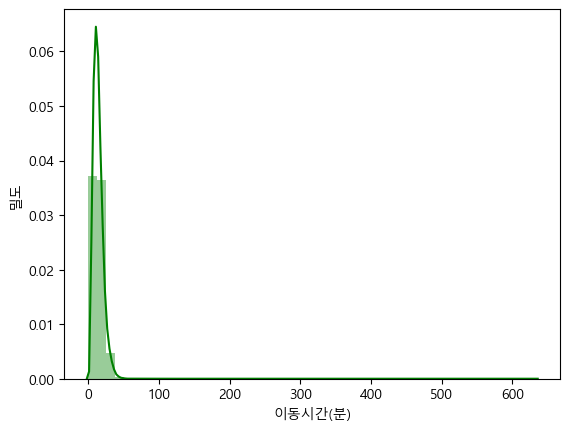

In [90]:
#히스토그램+밀도추정그래프
sns.distplot(실수요_하차['이동시간'], color='green')
# x,y 라벨 설정
plt.xlabel('이동시간(분)')
plt.ylabel('밀도')

- 극단값때문에 파악이 잘되지않으므로 그래프 확대(이동시간이 200(분) 미만인 값)

In [91]:
실수요_하차=실수요_하차[실수요_하차['이동시간']<200]
sns.distplot(실수요_하차['이동시간'], color='green')
# x,y 라벨 설정
plt.xlabel('이동시간(분)')
plt.ylabel('밀도')v

SyntaxError: invalid syntax (1814058458.py, line 5)

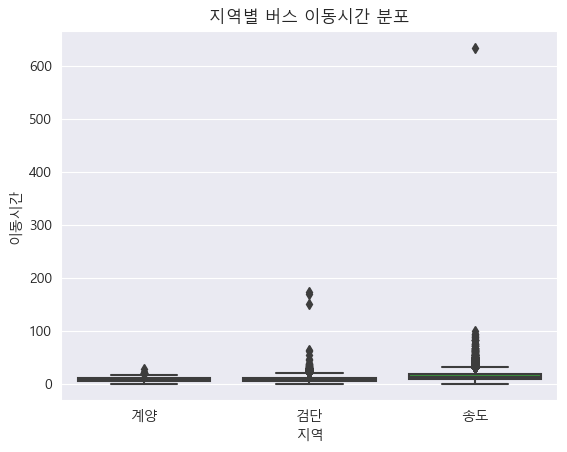

In [ ]:


sns.boxplot(data=[계양_실수요_하차['이동시간'], 검단_실수요_하차['이동시간'], 송도_실수요_하차['이동시간']], orient='v')
plt.title('지역별 버스 이동시간 분포')
plt.ylabel('이동시간')
plt.xlabel('지역')
plt.xticks([0,1,2], ['계양', '검단', '송도'])

plt.show()

너무 찌그러 져서 잘 보이지도 않는다. 펴주자

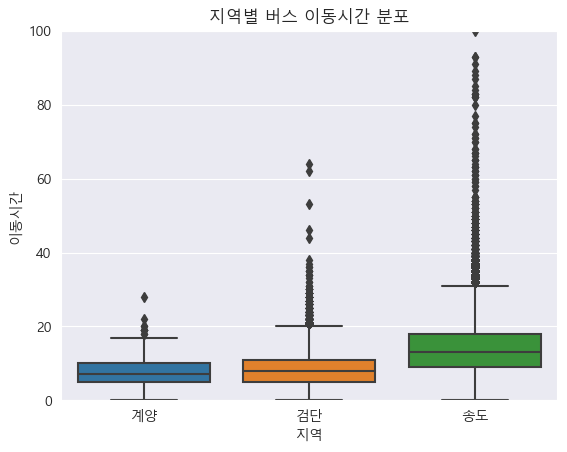

In [ ]:
sns.boxplot(data=[계양_실수요_하차['이동시간'], 검단_실수요_하차['이동시간'], 송도_실수요_하차['이동시간']], orient='v')
plt.title('지역별 버스 이동시간 분포')
plt.ylabel('이동시간')
# set y limit to 100
plt.ylim(0, 100)

plt.xlabel('지역')
plt.xticks([0,1,2], ['계양', '검단', '송도'])

plt.show()

y tick도 달아주자.

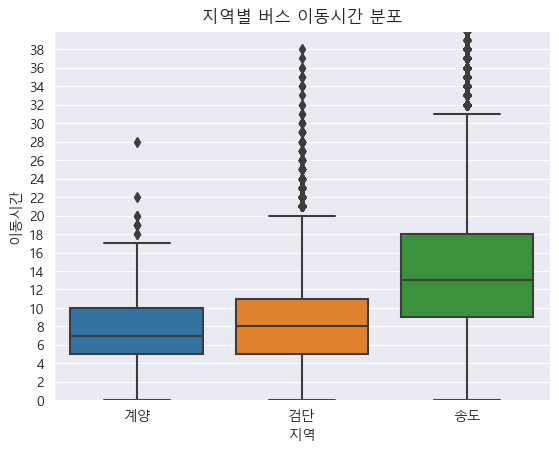

In [ ]:
sns.boxplot(data=[계양_실수요_하차['이동시간'], 검단_실수요_하차['이동시간'], 송도_실수요_하차['이동시간']], orient='v')
plt.title('지역별 버스 이동시간 분포')
plt.ylabel('이동시간')
# set y limit to 40
plt.ylim(0, 40)
# set y ticks to 1
plt.yticks(np.arange(0, 40, 2))

plt.xlabel('지역')
plt.xticks([0,1,2], ['계양', '검단', '송도'])

plt.show()

### 🔗 분석8) 통행시간별 승차수요 시각화(실수요 고객 기준)
- 탑승완료된 사용자가 아니더라도 배차를 시도한 고객은 모두 포함시켜서 시각화

In [ ]:
#실수요 고객만 추출
실수요=df[df['실수요여부']==1]

#요청시간 컬럼에서 시간만 추출
실수요['요청시간(시)']=실수요['요청시간'].dt.hour

#시각화에 필요한 컬럼만 남김
실수요=실수요[['지역','요청식별id', '요청시간(시)']]

#시간별 수요 count
시간=pd.DataFrame(실수요.groupby(['지역','요청시간(시)'])['요청식별id'].count())
시간.columns=['count']
시간.reset_index(inplace=True)

#계양에 23시~24시행이 없으므로 그래프 표현을 위한 추가
시간.loc[56] = ['계양', '23', '0']

#요청시간 컬럼 값 수정
시간['요청시간(시)']=시간['요청시간(시)'].astype('str')
시간['요청시간(시)']=['5시-6시', '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시', '13시14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시', '5시-6시', '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시', '13시14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시', '5시-6시', '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시', '13시14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시']

In [ ]:
#시간을 인덱스값으로 설정
시간.set_index('요청시간(시)', inplace=True)

In [ ]:
시간_계양=시간[시간['지역']=='계양']
시간_검단=시간[시간['지역']=='검단']
시간_송도=시간[시간['지역']=='송도']

- 시간대별 지역별 승차수요

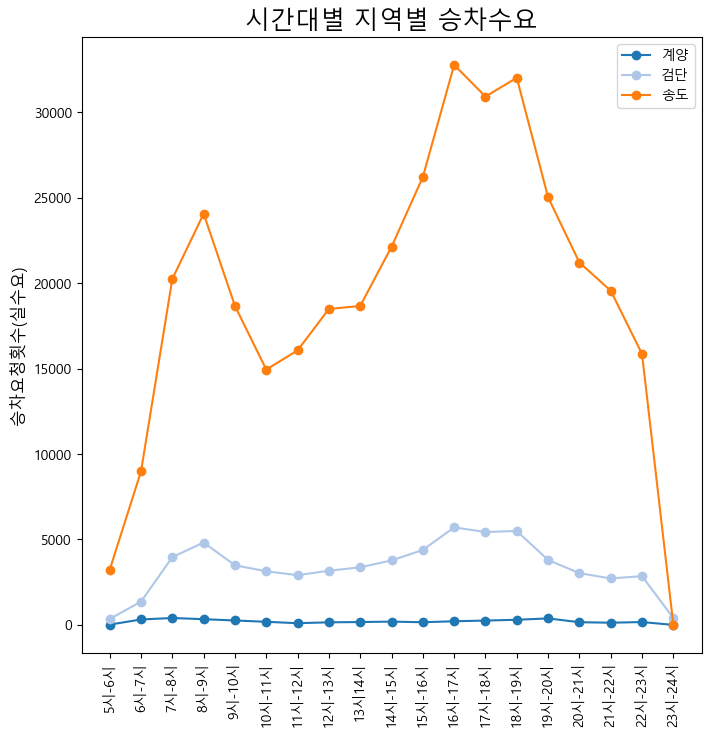

In [ ]:
#x축으로 지정할 컬럼 'time'에 저장

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(시간_계양.index,시간_계양['count'],marker='o',label='계양') ## 선그래프 생성
ax.plot(시간_계양.index,시간_검단['count'],marker='o',label='검단')
ax.plot(시간_계양.index,시간_송도['count'],marker='o',label='송도')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

# y축 레이블
plt.ylabel('승차요청횟수(실수요)', fontsize=12)

#그래프 제목 지정
plt.title('시간대별 지역별 승차수요', fontsize=18)

plt.show()

-> 대체로 송도에서 승차 수요 최다  
-> 검단, 송도 지역에서 16시-19시(오후 4시-7시) 수요 급증 패턴

- 그래프를 한번에 표시하면 상대적으로 표본이 다른 지역은 그래프가 잘 확인되지 않으므로 검단, 송도는 개별 그래프 작성

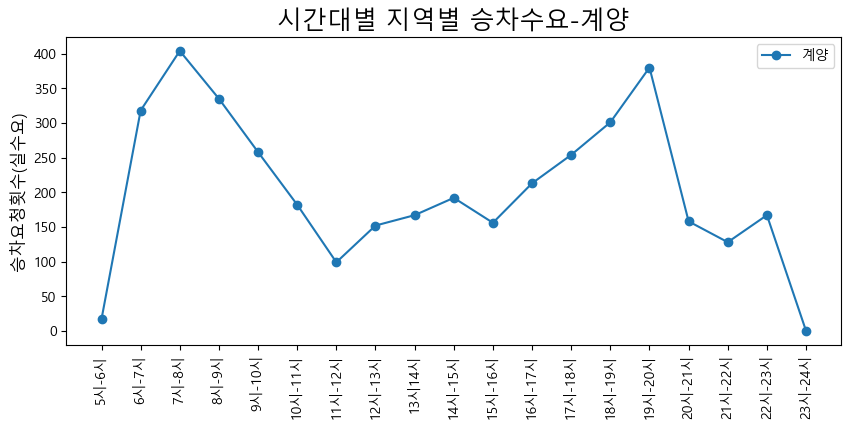

In [ ]:
#x축으로 지정할 컬럼 'time'에 저장

fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(시간_계양.index,시간_계양['count'],marker='o',label='계양')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

plt.ylabel('승차요청횟수(실수요)', fontsize=12)


#그래프 제목 지정
plt.title('시간대별 지역별 승차수요-계양', fontsize=18)

plt.show()

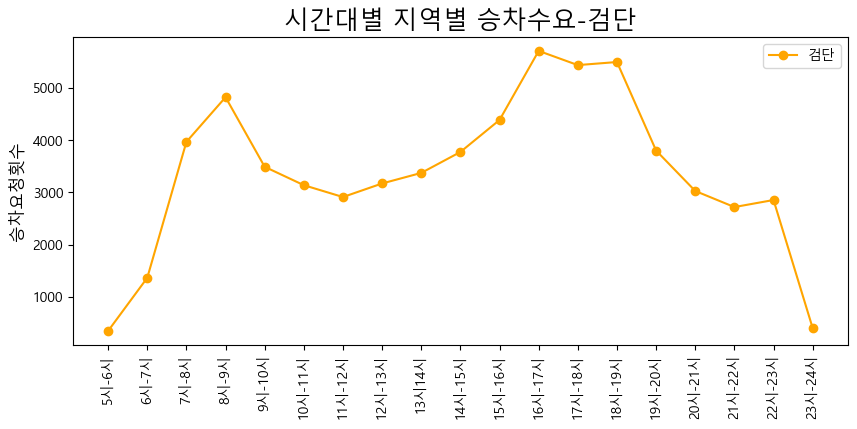

In [ ]:
#x축으로 지정할 컬럼 'time'에 저장

fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(시간_계양.index,시간_검단['count'],marker='o',label='검단', color='orange')
plt.ylabel('승차요청횟수', fontsize=12)

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('시간대별 지역별 승차수요-검단', fontsize=18)

plt.show()

### 🔗 분석9 월/시간별 상위 10개 정류장만 정류장별 이용수요의 증감 시각화(실수요 고객 기준)

### 9-1. 월별 top10 정류장 수요(계양)

In [ ]:
#실수요여부가 1이면서 분석에 필요한 데이터 저장
실수요=계양[(계양['실수요여부']==1)][['요청시간', '승차정류장명', '승차정류장방면', '승차정류장id', '요청식별id']]

#승차정류장id 정수변환
실수요['승차정류장id']=실수요['승차정류장id'].astype(int)

#요청시간에서 년월만 추출
실수요['년월']=실수요['요청시간'].dt.strftime('%Y-%m').str[2:]

#정류장별 수요 count
계양_top=pd.DataFrame(실수요.groupby(['승차정류장id', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
계양_top.columns=['count']

#top10개 추출
계양_top=계양_top.sort_values('count', ascending=False).head(10)
계양_top

count
승차정류장id 승차정류장명          승차정류장방면             
41357   계양역             다남식당 방면         1108
41662   소촌마을            대촌마을 방면          451
41518   인혜학교후문(원욱그린타운)  부대앞 방면           254
41510   세농푸드            남씨농원앞 방면         249
41659   계양역(계양중학교 방면)   귤현역방면            194
41348   장기동(농협앞)        계양1동주민자치센터 방면    183
41509   이화1동회차지         이화동노인정 방면        173
41316   목상동솔밭.이주단지입구    목상동마을입구 방면       141
41516   이화동다리           장기동 방면           136
41512   둑실동(아라마루전망대)    목상교입구 방면         100

In [ ]:
#top10의 승차정류장id 기준으로 추출
계양_top=실수요[(실수요['승차정류장id']==41357)|(실수요['승차정류장id']==41662)|(실수요['승차정류장id']==41518)|(실수요['승차정류장id']==41510)|(실수요['승차정류장id']==41659)|(실수요['승차정류장id']==41348)|(실수요['승차정류장id']==41509)|(실수요['승차정류장id']==41316)|(실수요['승차정류장id']==41516)|(실수요['승차정류장id']==41512)]

In [ ]:
#년월, 승차정류장명, 승차정류장방면으로 수요 count
월별수요=pd.DataFrame(계양_top.groupby(['년월', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
월별수요.columns=['count']
월별수요.reset_index(inplace=True)

#년월 컬럼 str로 변환
월별수요['년월']=월별수요['년월'].astype('str')

#시간을 인덱스값으로 설정
월별수요.set_index('년월', inplace=True)

#각각의 정류장 저장(선그래프 하나에 할당하는 정류장)
정1=월별수요[월별수요['승차정류장명']=='계양역 ']
정2=월별수요[월별수요['승차정류장명']=='목상동솔밭.이주단지입구 ']
정3=월별수요[월별수요['승차정류장명']=='장기동(농협앞) ']
정4=월별수요[월별수요['승차정류장명']=='계양역(계양중학교 방면) ']
정5=월별수요[월별수요['승차정류장명']=='둑실동(아라마루전망대) ']
정6=월별수요[월별수요['승차정류장명']=='세농푸드 ']
정7=월별수요[월별수요['승차정류장명']=='소촌마을 ']
정8=월별수요[월별수요['승차정류장명']=='이화동다리 ']
정9=월별수요[월별수요['승차정류장명']=='인혜학교후문(원욱그린타운) ']
정10=월별수요[월별수요['승차정류장명']=='이화1동회차지 ']

- 전월대비 증감률 계산

In [ ]:
정1['증감']=round(정1['count'].pct_change()*100,2)
정2['증감']=round(정2['count'].pct_change()*100,2)
정3['증감']=round(정3['count'].pct_change()*100,2)
정4['증감']=round(정4['count'].pct_change()*100,2)
정5['증감']=round(정5['count'].pct_change()*100,2)
정6['증감']=round(정6['count'].pct_change()*100,2)
정7['증감']=round(정7['count'].pct_change()*100,2)
정8['증감']=round(정8['count'].pct_change()*100,2)
정9['증감']=round(정9['count'].pct_change()*100,2)
정10['증감']=round(정10['count'].pct_change()*100,2)

정1.fillna(0,inplace=True)
정2.fillna(0,inplace=True)
정3.fillna(0,inplace=True)
정4.fillna(0,inplace=True)
정5.fillna(0,inplace=True)
정6.fillna(0,inplace=True)
정7.fillna(0,inplace=True)
정8.fillna(0,inplace=True)
정9.fillna(0,inplace=True)
정10.fillna(0,inplace=True)

- 시각화

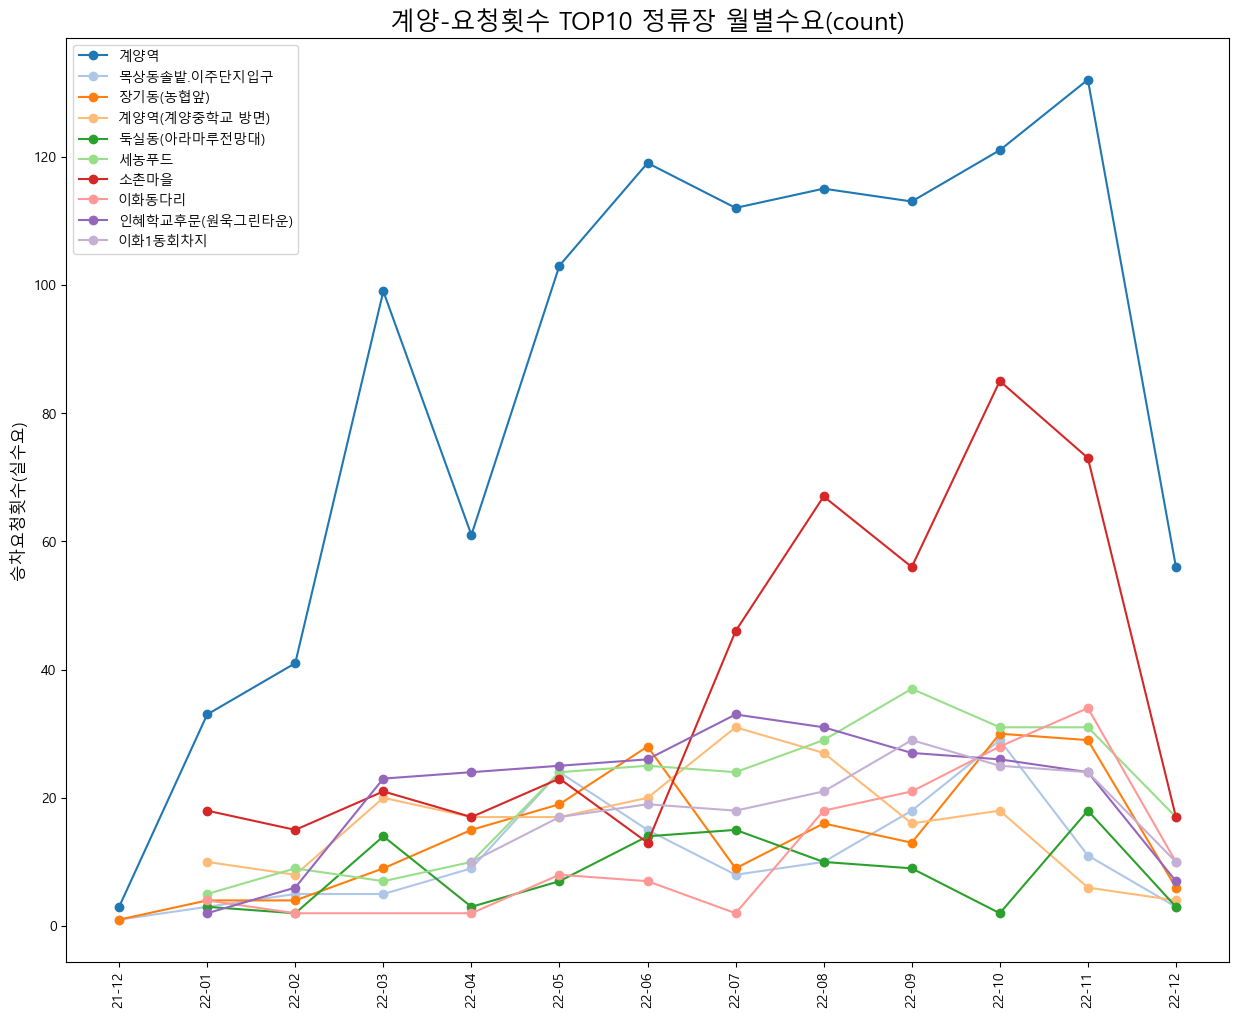

In [ ]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(정1.index,정1['count'],marker='o',label='계양역') ## 선그래프 생성
ax.plot(정2.index,정2['count'],marker='o',label='목상동솔밭.이주단지입구') 
ax.plot(정3.index,정3['count'],marker='o',label='장기동(농협앞)') 
ax.plot(정4.index,정4['count'],marker='o',label='계양역(계양중학교 방면)') 
ax.plot(정5.index,정5['count'],marker='o',label='둑실동(아라마루전망대)') 
ax.plot(정6.index,정6['count'],marker='o',label='세농푸드') 
ax.plot(정7.index,정7['count'],marker='o',label='소촌마을') 
ax.plot(정8.index,정8['count'],marker='o',label='이화동다리') 
ax.plot(정9.index,정9['count'],marker='o',label='인혜학교후문(원욱그린타운)') 
ax.plot(정10.index,정10['count'],marker='o',label='이화1동회차지') 

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

plt.ylabel('승차요청횟수(실수요)', fontsize=12)

#그래프 제목 지정
plt.title('계양-요청횟수 TOP10 정류장 월별수요(count)', fontsize=18)

plt.show()

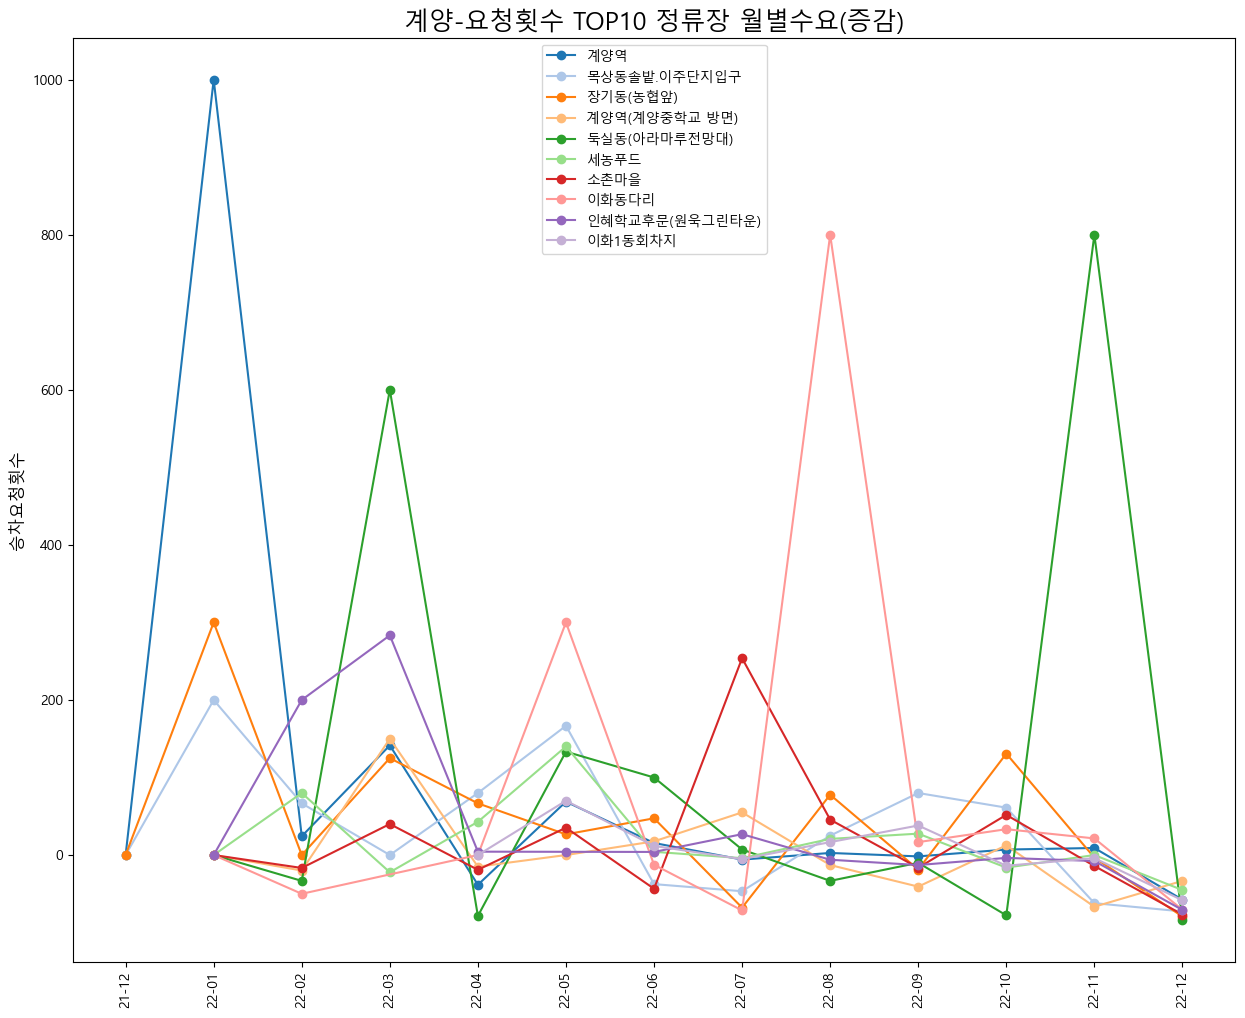

In [ ]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(정1.index,정1['증감'],marker='o',label='계양역') ## 선그래프 생성
ax.plot(정2.index,정2['증감'],marker='o',label='목상동솔밭.이주단지입구') 
ax.plot(정3.index,정3['증감'],marker='o',label='장기동(농협앞)') 
ax.plot(정4.index,정4['증감'],marker='o',label='계양역(계양중학교 방면)') 
ax.plot(정5.index,정5['증감'],marker='o',label='둑실동(아라마루전망대)') 
ax.plot(정6.index,정6['증감'],marker='o',label='세농푸드') 
ax.plot(정7.index,정7['증감'],marker='o',label='소촌마을') 
ax.plot(정8.index,정8['증감'],marker='o',label='이화동다리') 
ax.plot(정9.index,정9['증감'],marker='o',label='인혜학교후문(원욱그린타운)') 
ax.plot(정10.index,정10['증감'],marker='o',label='이화1동회차지') 

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

plt.ylabel('승차요청횟수', fontsize=12)


#그래프 제목 지정
plt.title('계양-요청횟수 TOP10 정류장 월별수요(증감)', fontsize=18)

plt.show()

### 9-2. 월별 top10 정류장 수요(검단)

In [ ]:
#실수요여부가 1이면서 분석에 필요한 데이터 저장
실수요=검단[(검단['실수요여부']==1)][['요청시간', '승차정류장명', '승차정류장방면', '승차정류장id', '요청식별id']]

#승차정류장id 정수변환
실수요['승차정류장id']=실수요['승차정류장id'].astype(int)

#요청시간에서 년월만 추출
실수요['년월']=실수요['요청시간'].dt.strftime('%Y-%m').str[2:]

#정류장별 수요 count
검단_top=pd.DataFrame(실수요.groupby(['승차정류장id', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
검단_top.columns=['count']

#top10개 추출
검단_top=검단_top.sort_values('count', ascending=False).head(10)
검단_top

count
승차정류장id 승차정류장명             승차정류장방면               
42674   완정역                당하동탑스빌아파트 방면      5707
89438   [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면     5267
89408   [F] 검단LH행복주택       오류동마을 방면          3829
42442   보람프라자앞             원당사거리/검단선사박물관방면   3818
89401   아라동행정복지센터          유현사거리 방면          3704
41357   계양역                다남식당 방면           3418
42378   독정역(서구동구예비군훈련장)    백석고가(하이마트) 방면     2673
89405   [C] 아라노을공원·한신더휴    서구영어마을 방면         2627
89409   [F] 검단LH행복주택       아라센트럴파크 방면        2328
89411   [D] 인천해든초등학교       아라노을공원·한신더휴 방면    2298

In [ ]:
#top10의 승차정류장id 기준으로 추출
검단_top=실수요[(실수요['승차정류장id']==42674)|(실수요['승차정류장id']==89438)|(실수요['승차정류장id']==89408)|(실수요['승차정류장id']==42442)|(실수요['승차정류장id']==89401)|(실수요['승차정류장id']==41357)|(실수요['승차정류장id']==42378)|(실수요['승차정류장id']==89405)|(실수요['승차정류장id']==89409)|(실수요['승차정류장id']==89411)]

In [ ]:
#년월, 승차정류장명, 승차정류장방면으로 수요 count
월별수요=pd.DataFrame(검단_top.groupby(['년월', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
월별수요.columns=['count']
월별수요.reset_index(inplace=True)

#년월 컬럼 str로 변환
월별수요['년월']=월별수요['년월'].astype('str')
월별수요

#시간을 인덱스값으로 설정
월별수요.set_index('년월', inplace=True)

#각각의 정류장 저장(선그래프 하나에 할당하는 정류장)
정1=월별수요[월별수요['승차정류장명']=='완정역 ']
정2=월별수요[월별수요['승차정류장명']=='[E] 이음대로.디에트르더펠리체 ']
정3=월별수요[월별수요['승차정류장방면']=='오류동마을 방면']
정4=월별수요[월별수요['승차정류장명']=='보람프라자앞 ']
정5=월별수요[월별수요['승차정류장명']=='아라동행정복지센터 ']
정6=월별수요[월별수요['승차정류장명']=='계양역 ']
정7=월별수요[월별수요['승차정류장명']=='독정역(서구동구예비군훈련장) ']
정8=월별수요[월별수요['승차정류장명']=='[C] 아라노을공원·한신더휴 ']
정9=월별수요[월별수요['승차정류장방면']=='아라센트럴파크 방면']
정10=월별수요[월별수요['승차정류장명']=='[D] 인천해든초등학교 ']

- 시각화

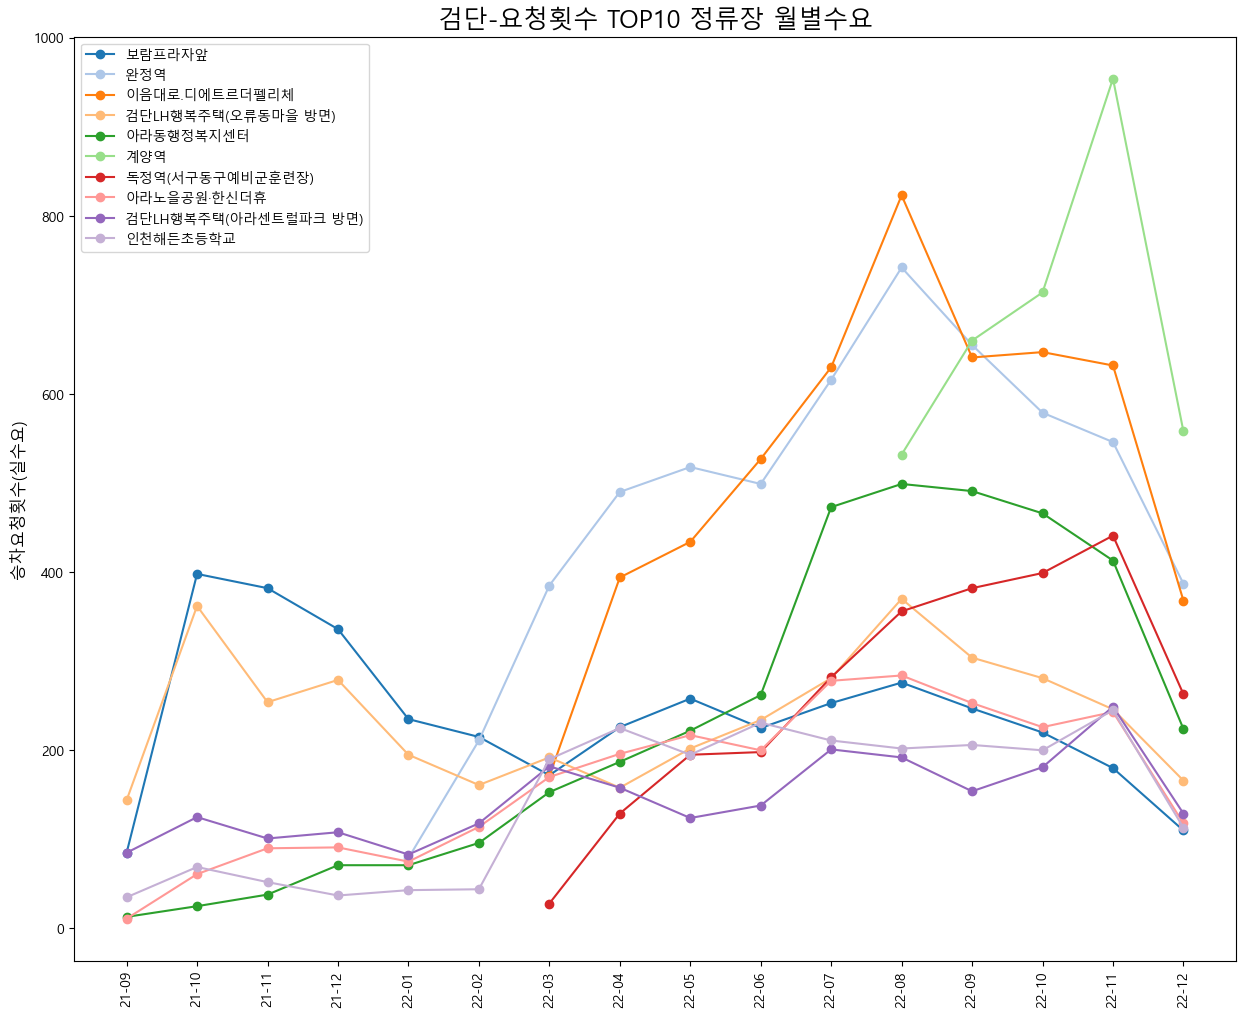

In [ ]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(정4.index,정4['count'],marker='o',label='보람프라자앞') ## 선그래프 생성
ax.plot(정1.index,정1['count'],marker='o',label='완정역') 
ax.plot(정2.index,정2['count'],marker='o',label='이음대로.디에트르더펠리체') 
ax.plot(정3.index,정3['count'],marker='o',label='검단LH행복주택(오류동마을 방면)') 
ax.plot(정5.index,정5['count'],marker='o',label='아라동행정복지센터') 
ax.plot(정6.index,정6['count'],marker='o',label='계양역') 
ax.plot(정7.index,정7['count'],marker='o',label='독정역(서구동구예비군훈련장)') 
ax.plot(정8.index,정8['count'],marker='o',label='아라노을공원·한신더휴') 
ax.plot(정9.index,정9['count'],marker='o',label='검단LH행복주택(아라센트럴파크 방면)') 
ax.plot(정10.index,정10['count'],marker='o',label='인천해든초등학교') 

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

plt.ylabel('승차요청횟수(실수요)', fontsize=12)


#그래프 제목 지정
plt.title('검단-요청횟수 TOP10 정류장 월별수요', fontsize=18)

plt.show()

### 9-3. 월별 top10 정류장 수요(송도)

In [ ]:
#실수요여부가 1이면서 분석에 필요한 데이터 저장
실수요=송도[(송도['실수요여부']==1)][['요청시간', '승차정류장명', '승차정류장방면', '승차정류장id', '요청식별id']]

실수요[실수요['승차정류장id'].isnull()].head(3)
#승차정류장 = "더샵송도마리나베이아파트후문 ","더샵송도마리나베이아파트후문"일 경우 승차정류장id가 부여되어있지 않음을 확인

#정류장명 통일
실수요.replace("더샵송도마리나베이아파트후문 ", "더샵송도마리나베이아파트후문", inplace=True)

In [ ]:
#null값에 임의값 채움
실수요['승차정류장id'].fillna(99999, inplace=True)

#승차정류장id 정수변환
실수요['승차정류장id']=실수요['승차정류장id'].astype(int)

#요청시간에서 년월만 추출
실수요['년월']=실수요['요청시간'].dt.strftime('%Y-%m').str[2:]

#정류장별 수요 count
송도_top=pd.DataFrame(실수요.groupby(['승차정류장id', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
송도_top.columns=['count']

#top10개 추출
송도_top=송도_top.sort_values('count', ascending=False).head(10)
송도_top

count
승차정류장id 승차정류장명             승차정류장방면                    
38624   e편한세상 정문           랜드마크시티센트럴더샵(106동) 방면  14573
99999   더샵송도마리나베이아파트후문     힐스테이트레이크송도2차 방면       11614
38422   테크노파크역             캠퍼스타운역 방면              8480
38665   랜드마크시티센트럴더샵(106동)  송도호반베르디움3차에듀시티 방면      8443
38654   미송초등학교             e편한세상정문 방면             8387
38715   힐스테이트송도더테라스(정문)    달빛축제공원 방면              7907
38411   해양경찰청              이안송도 방면                7634
38696   송도달빛축제공원역          힐스테이트송도더테라스(후문) 방면     7533
38734   달빛축제공원대공연장         달빛축제공원 방면              7499
38650   랜드마크시티센트럴더샵(203동)  송도호반베르디움3차에듀시티 방면      7318

In [ ]:
#top10의 승차정류장id 기준으로 추출
송도_top=실수요[(실수요['승차정류장id']==38624)|(실수요['승차정류장id']==99999)|(실수요['승차정류장id']==38422)|(실수요['승차정류장id']==38665)|(실수요['승차정류장id']==38654)|(실수요['승차정류장id']==38715)|(실수요['승차정류장id']==38411)|(실수요['승차정류장id']==38696)|(실수요['승차정류장id']==38734)|(실수요['승차정류장id']==38650)]

In [ ]:
#년월, 승차정류장명, 승차정류장방면으로 수요 count
월별수요=pd.DataFrame(송도_top.groupby(['년월', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
월별수요.columns=['count']
월별수요.reset_index(inplace=True)

#년월 컬럼 str로 변환
월별수요['년월']=월별수요['년월'].astype('str')
월별수요

#시간을 인덱스값으로 설정
월별수요.set_index('년월', inplace=True)

#각각의 정류장 저장(선그래프 하나에 할당하는 정류장)
정1=월별수요[월별수요['승차정류장명']=='e편한세상 정문 ']
정2=월별수요[월별수요['승차정류장명']=='더샵송도마리나베이아파트후문']
정3=월별수요[월별수요['승차정류장방면']=='랜드마크시티센트럴더샵(106동) ']
정4=월별수요[월별수요['승차정류장명']=='미송초등학교 ']
정5=월별수요[월별수요['승차정류장명']=='송도달빛축제공원역 ']
정6=월별수요[월별수요['승차정류장명']=='해양경찰청 ']
정7=월별수요[월별수요['승차정류장명']=='힐스테이트송도더테라스(정문) ']
정8=월별수요[월별수요['승차정류장명']=='랜드마크시티센트럴더샵(203동) ']
정9=월별수요[월별수요['승차정류장방면']=='달빛축제공원대공연장 ']
정10=월별수요[월별수요['승차정류장명']=='테크노파크역 ']

- 시각화

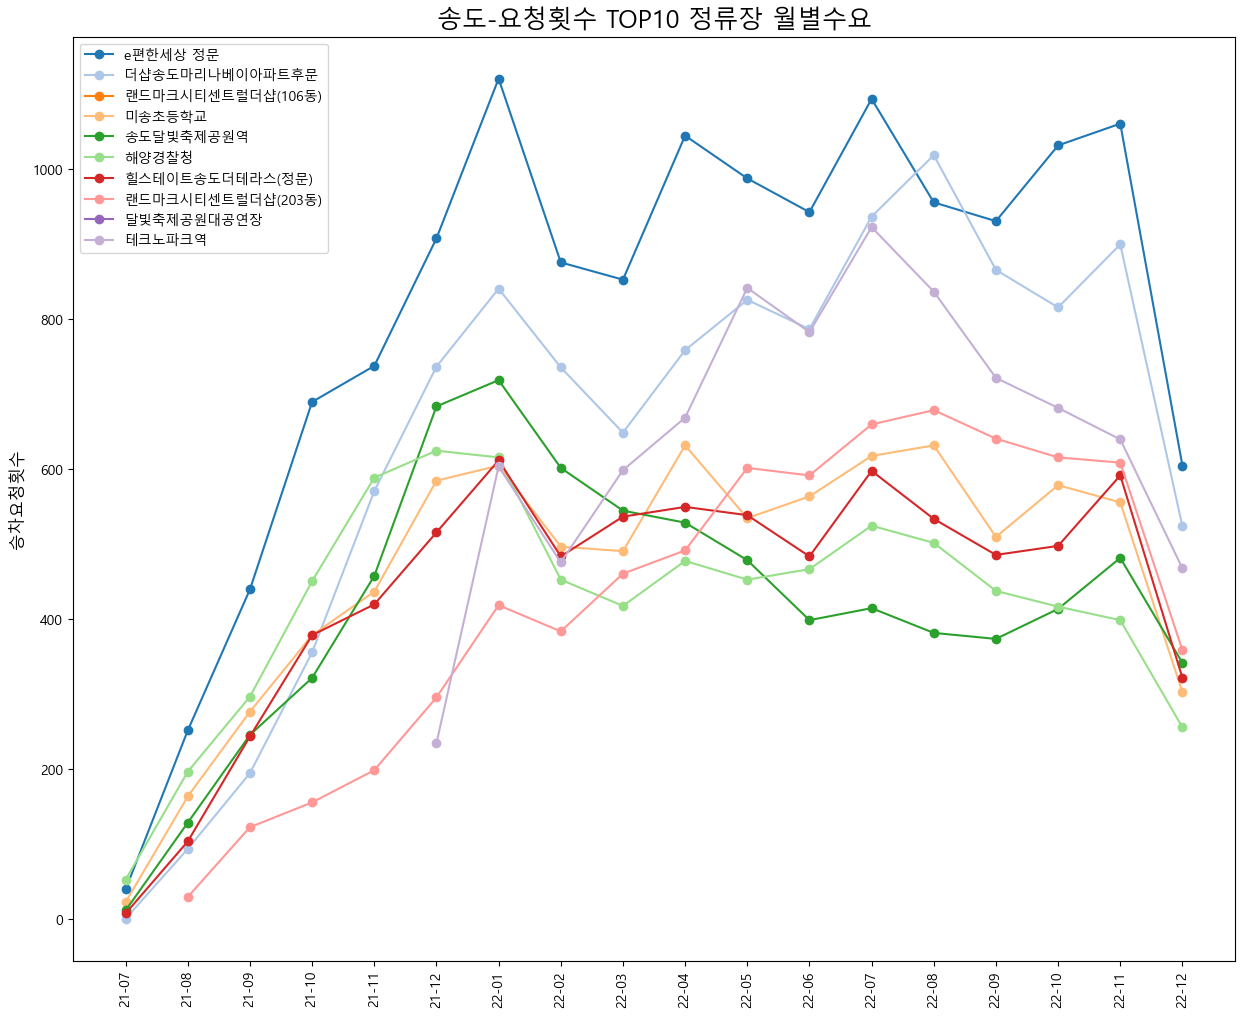

In [ ]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

 ## 선그래프 생성
ax.plot(정1.index,정1['count'],marker='o',label='e편한세상 정문') 
ax.plot(정2.index,정2['count'],marker='o',label='더샵송도마리나베이아파트후문') 
ax.plot(정3.index,정3['count'],marker='o',label='랜드마크시티센트럴더샵(106동)') 
ax.plot(정4.index,정4['count'],marker='o',label='미송초등학교')
ax.plot(정5.index,정5['count'],marker='o',label='송도달빛축제공원역') 
ax.plot(정6.index,정6['count'],marker='o',label='해양경찰청') 
ax.plot(정7.index,정7['count'],marker='o',label='힐스테이트송도더테라스(정문)') 
ax.plot(정8.index,정8['count'],marker='o',label='랜드마크시티센트럴더샵(203동)') 
ax.plot(정9.index,정9['count'],marker='o',label='달빛축제공원대공연장') 
ax.plot(정10.index,정10['count'],marker='o',label='테크노파크역') 

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

plt.ylabel('승차요청횟수', fontsize=12)


#그래프 제목 지정
plt.title('송도-요청횟수 TOP10 정류장 월별수요', fontsize=18)

plt.show()

### 9-4. 시간대별 top10 정류장 수요(계양)

In [ ]:
#실수요여부가 1이면서 분석에 필요한 데이터 저장
실수요=계양[(계양['실수요여부']==1)][['요청시간', '승차정류장명', '승차정류장방면', '승차정류장id', '요청식별id']]

#승차정류장id 정수변환
실수요['승차정류장id']=실수요['승차정류장id'].astype(int)

#요청시간에서 시간만 추출
실수요['시']=실수요['요청시간'].dt.strftime('%H')

#top10의 승차정류장id 기준으로 추출
계양_top=실수요[(실수요['승차정류장id']==41357)|(실수요['승차정류장id']==41662)|(실수요['승차정류장id']==41518)|(실수요['승차정류장id']==41510)|(실수요['승차정류장id']==41659)|(실수요['승차정류장id']==41348)|(실수요['승차정류장id']==41509)|(실수요['승차정류장id']==41316)|(실수요['승차정류장id']==41516)|(실수요['승차정류장id']==41512)]



In [ ]:
#년월, 승차정류장명, 승차정류장방면으로 수요 count
시간대별=pd.DataFrame(계양_top.groupby(['시', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
시간대별.columns=['count']
시간대별.reset_index(inplace=True)

#년월 컬럼 str로 변환
시간대별['시']=시간대별['시'].astype('str')
시간대별

#시간을 인덱스값으로 설정
시간대별.set_index('시', inplace=True)

#각각의 정류장 저장(선그래프 하나에 할당하는 정류장)
정1=시간대별[시간대별['승차정류장명']=='계양역 ']
정2=시간대별[시간대별['승차정류장명']=='목상동솔밭.이주단지입구 ']
정3=시간대별[시간대별['승차정류장명']=='장기동(농협앞) ']
정4=시간대별[시간대별['승차정류장명']=='계양역(계양중학교 방면) ']
정5=시간대별[시간대별['승차정류장명']=='둑실동(아라마루전망대) ']
정6=시간대별[시간대별['승차정류장명']=='세농푸드 ']
정7=시간대별[시간대별['승차정류장명']=='소촌마을 ']
정8=시간대별[시간대별['승차정류장명']=='이화동다리 ']
정9=시간대별[시간대별['승차정류장명']=='인혜학교후문(원욱그린타운) ']
정10=시간대별[시간대별['승차정류장명']=='이화1동회차지 ']

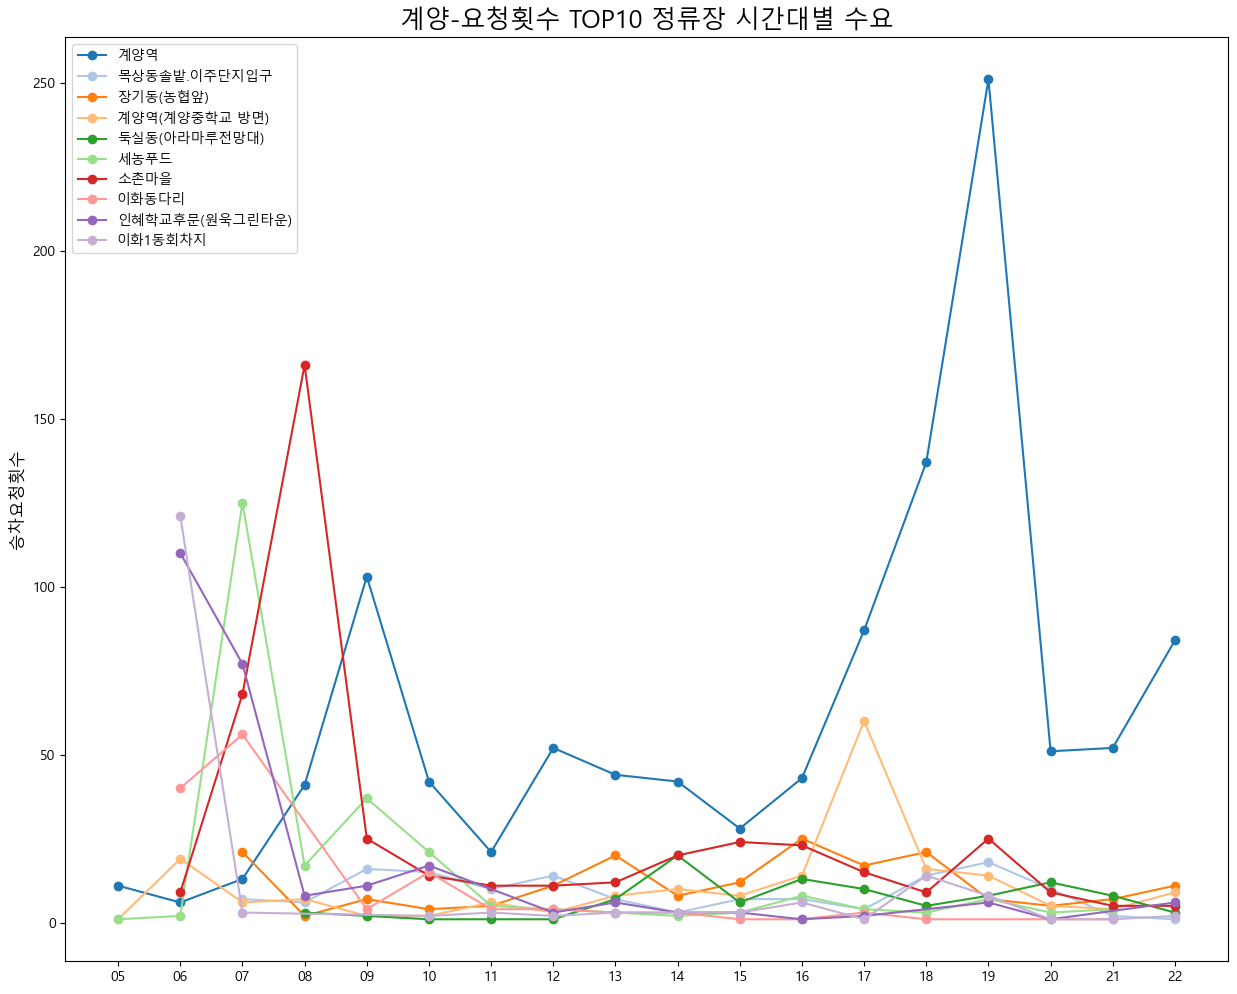

In [ ]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(정1.index,정1['count'],marker='o',label='계양역') ## 선그래프 생성
ax.plot(정2.index,정2['count'],marker='o',label='목상동솔밭.이주단지입구') 
ax.plot(정3.index,정3['count'],marker='o',label='장기동(농협앞)') 
ax.plot(정4.index,정4['count'],marker='o',label='계양역(계양중학교 방면)') 
ax.plot(정5.index,정5['count'],marker='o',label='둑실동(아라마루전망대)') 
ax.plot(정6.index,정6['count'],marker='o',label='세농푸드') 
ax.plot(정7.index,정7['count'],marker='o',label='소촌마을') 
ax.plot(정8.index,정8['count'],marker='o',label='이화동다리') 
ax.plot(정9.index,정9['count'],marker='o',label='인혜학교후문(원욱그린타운)') 
ax.plot(정10.index,정10['count'],marker='o',label='이화1동회차지') 

ax.legend() ## 범례

plt.ylabel('승차요청횟수', fontsize=12)

#그래프 제목 지정
plt.title('계양-요청횟수 TOP10 정류장 시간대별 수요', fontsize=18)

plt.show()

### 9-5. 시간대별 top10 정류장 수요(검단)

In [ ]:
#실수요여부가 1이면서 분석에 필요한 데이터 저장
실수요=검단[(검단['실수요여부']==1)][['요청시간', '승차정류장명', '승차정류장방면', '승차정류장id', '요청식별id']]

#승차정류장id 정수변환
실수요['승차정류장id']=실수요['승차정류장id'].astype(int)

#요청시간에서 시간만 추출
실수요['시']=실수요['요청시간'].dt.strftime('%H')

#top10의 승차정류장id 기준으로 추출
검단_top=실수요[(실수요['승차정류장id']==42674)|(실수요['승차정류장id']==89438)|(실수요['승차정류장id']==89408)|(실수요['승차정류장id']==42442)|(실수요['승차정류장id']==89401)|(실수요['승차정류장id']==41357)|(실수요['승차정류장id']==42378)|(실수요['승차정류장id']==89405)|(실수요['승차정류장id']==89409)|(실수요['승차정류장id']==89411)]

In [ ]:
#년월, 승차정류장명, 승차정류장방면으로 수요 count
시간대별=pd.DataFrame(검단_top.groupby(['시', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
시간대별.columns=['count']
시간대별.reset_index(inplace=True)

#년월 컬럼 str로 변환
시간대별['시']=시간대별['시'].astype('str')
시간대별

#시간을 인덱스값으로 설정
시간대별.set_index('시', inplace=True)

#각각의 정류장 저장(선그래프 하나에 할당하는 정류장)
정1=시간대별[시간대별['승차정류장명']=='완정역 ']
정2=시간대별[시간대별['승차정류장명']=='[E] 이음대로.디에트르더펠리체 ']
정3=시간대별[시간대별['승차정류장방면']=='오류동마을 방면']
정4=시간대별[시간대별['승차정류장명']=='보람프라자앞 ']
정5=시간대별[시간대별['승차정류장명']=='아라동행정복지센터 ']
정6=시간대별[시간대별['승차정류장명']=='계양역 ']
정7=시간대별[시간대별['승차정류장명']=='독정역(서구동구예비군훈련장) ']
정8=시간대별[시간대별['승차정류장명']=='[C] 아라노을공원·한신더휴 ']
정9=시간대별[시간대별['승차정류장방면']=='아라센트럴파크 방면']
정10=시간대별[시간대별['승차정류장명']=='[D] 인천해든초등학교 ']

- 시각화

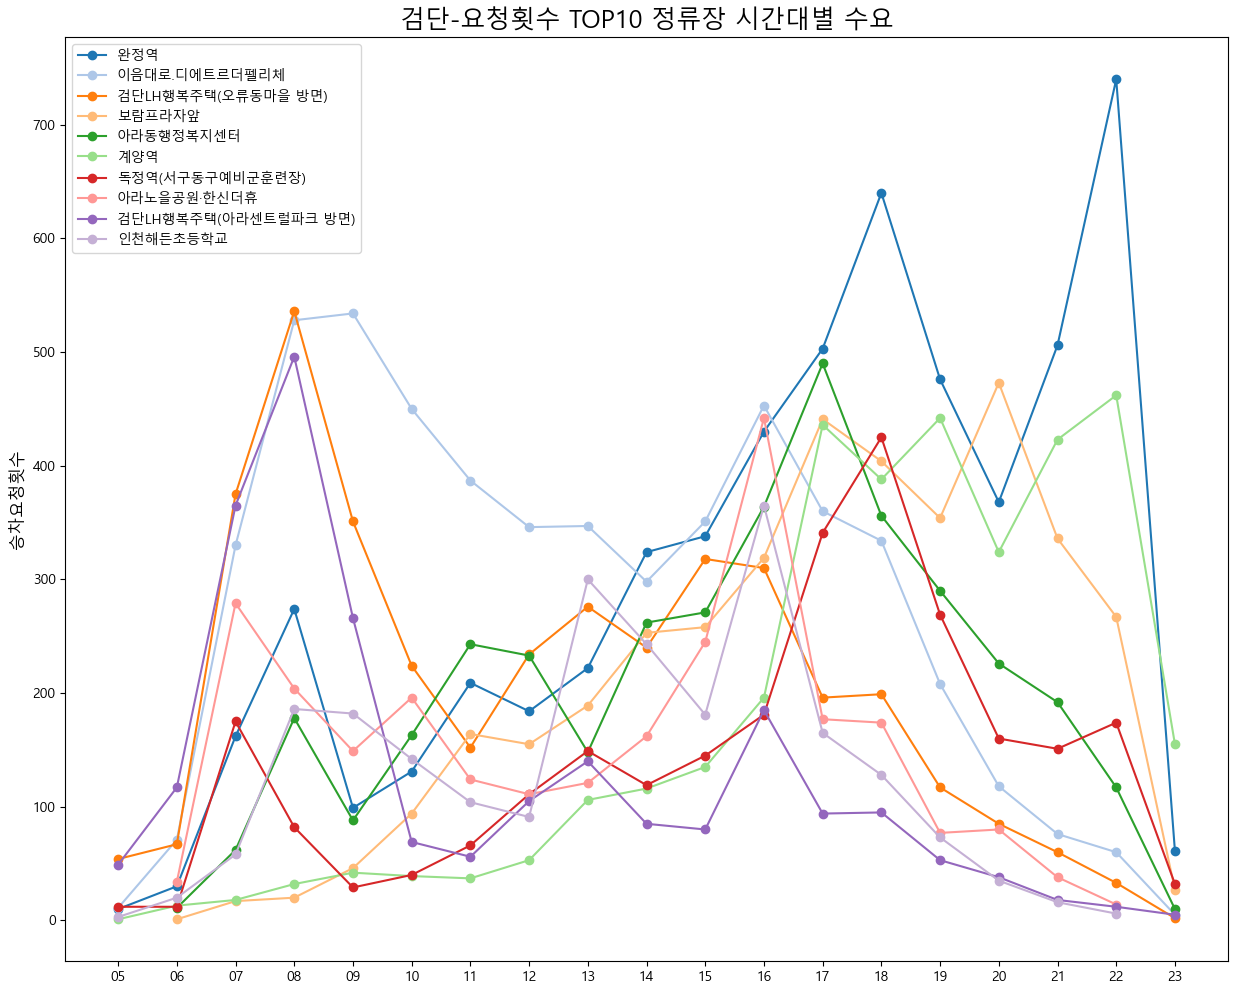

In [ ]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

## 선그래프 생성
ax.plot(정1.index,정1['count'],marker='o',label='완정역') 
ax.plot(정2.index,정2['count'],marker='o',label='이음대로.디에트르더펠리체') 
ax.plot(정3.index,정3['count'],marker='o',label='검단LH행복주택(오류동마을 방면)') 
ax.plot(정4.index,정4['count'],marker='o',label='보람프라자앞') 
ax.plot(정5.index,정5['count'],marker='o',label='아라동행정복지센터') 
ax.plot(정6.index,정6['count'],marker='o',label='계양역') 
ax.plot(정7.index,정7['count'],marker='o',label='독정역(서구동구예비군훈련장)') 
ax.plot(정8.index,정8['count'],marker='o',label='아라노을공원·한신더휴') 
ax.plot(정9.index,정9['count'],marker='o',label='검단LH행복주택(아라센트럴파크 방면)') 
ax.plot(정10.index,정10['count'],marker='o',label='인천해든초등학교') 

ax.legend() ## 범례
plt.ylabel('승차요청횟수', fontsize=12)


#그래프 제목 지정
plt.title('검단-요청횟수 TOP10 정류장 시간대별 수요', fontsize=18)

plt.show()

### 9-6. 시간대별 top10 정류장 수요(송도)

In [ ]:
#실수요여부가 1이면서 분석에 필요한 데이터 저장
실수요=송도[(송도['실수요여부']==1)][['요청시간', '승차정류장명', '승차정류장방면', '승차정류장id', '요청식별id']]

실수요[실수요['승차정류장id'].isnull()].head(3)
#승차정류장 = "더샵송도마리나베이아파트후문 ","더샵송도마리나베이아파트후문"일 경우 승차정류장id가 부여되어있지 않음을 확인

#정류장명 통일
실수요.replace("더샵송도마리나베이아파트후문 ", "더샵송도마리나베이아파트후문", inplace=True)

#null값에 임의값 채움
실수요['승차정류장id'].fillna(99999, inplace=True)

#승차정류장id 정수변환
실수요['승차정류장id']=실수요['승차정류장id'].astype(int)

#요청시간에서 시간만 추출
실수요['시']=실수요['요청시간'].dt.strftime('%H')

In [ ]:
#top10의 승차정류장id 기준으로 추출
송도_top=실수요[(실수요['승차정류장id']==38624)|(실수요['승차정류장id']==99999)|(실수요['승차정류장id']==38422)|(실수요['승차정류장id']==38665)|(실수요['승차정류장id']==38654)|(실수요['승차정류장id']==38715)|(실수요['승차정류장id']==38411)|(실수요['승차정류장id']==38696)|(실수요['승차정류장id']==38734)|(실수요['승차정류장id']==38650)]

In [ ]:
#년월, 승차정류장명, 승차정류장방면으로 수요 count
시간대별=pd.DataFrame(송도_top.groupby(['시', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
시간대별.columns=['count']
시간대별.reset_index(inplace=True)

#년월 컬럼 str로 변환
시간대별['시']=시간대별['시'].astype('str')
시간대별

#시간을 인덱스값으로 설정
시간대별.set_index('시', inplace=True)

#각각의 정류장 저장(선그래프 하나에 할당하는 정류장)
정1=시간대별[시간대별['승차정류장명']=='e편한세상 정문 ']
정2=시간대별[시간대별['승차정류장명']=='더샵송도마리나베이아파트후문']
정3=시간대별[시간대별['승차정류장방면']=='랜드마크시티센트럴더샵(106동) ']
정4=시간대별[시간대별['승차정류장명']=='미송초등학교 ']
정5=시간대별[시간대별['승차정류장명']=='송도달빛축제공원역 ']
정6=시간대별[시간대별['승차정류장명']=='해양경찰청 ']
정7=시간대별[시간대별['승차정류장명']=='힐스테이트송도더테라스(정문) ']
정8=시간대별[시간대별['승차정류장명']=='랜드마크시티센트럴더샵(203동) ']
정9=시간대별[시간대별['승차정류장방면']=='달빛축제공원대공연장 ']
정10=시간대별[시간대별['승차정류장명']=='테크노파크역 ']

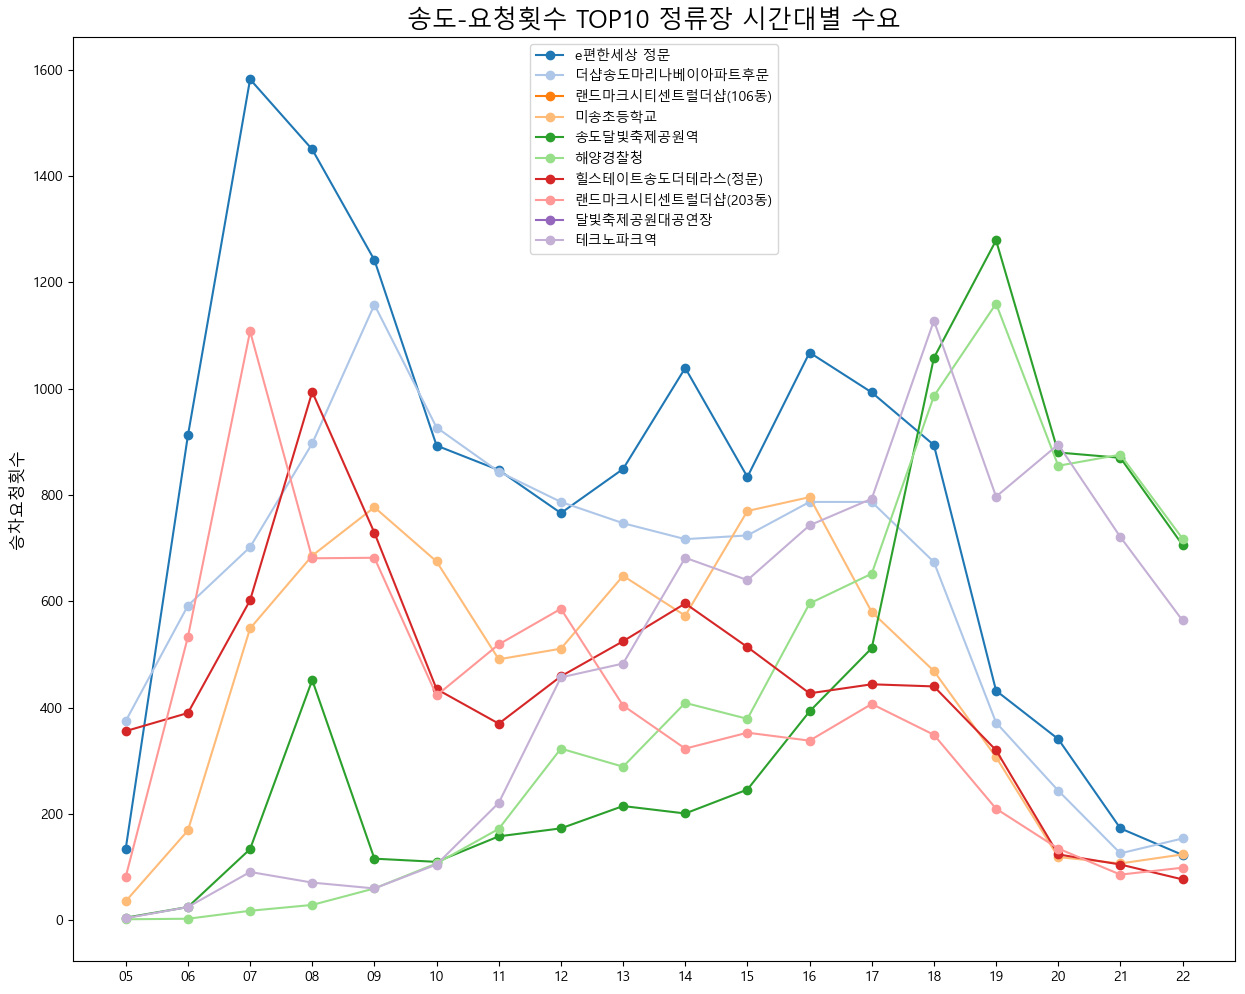

In [ ]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

 ## 선그래프 생성
ax.plot(정1.index,정1['count'],marker='o',label='e편한세상 정문') 
ax.plot(정2.index,정2['count'],marker='o',label='더샵송도마리나베이아파트후문') 
ax.plot(정3.index,정3['count'],marker='o',label='랜드마크시티센트럴더샵(106동)') 
ax.plot(정4.index,정4['count'],marker='o',label='미송초등학교')
ax.plot(정5.index,정5['count'],marker='o',label='송도달빛축제공원역') 
ax.plot(정6.index,정6['count'],marker='o',label='해양경찰청') 
ax.plot(정7.index,정7['count'],marker='o',label='힐스테이트송도더테라스(정문)') 
ax.plot(정8.index,정8['count'],marker='o',label='랜드마크시티센트럴더샵(203동)') 
ax.plot(정9.index,정9['count'],marker='o',label='달빛축제공원대공연장') 
ax.plot(정10.index,정10['count'],marker='o',label='테크노파크역') 

ax.legend() ## 범례
plt.ylabel('승차요청횟수', fontsize=12)

#그래프 제목 지정
plt.title('송도-요청횟수 TOP10 정류장 시간대별 수요', fontsize=18)

plt.show()

### 🔗 분석10) 지역별 전월대비 증감률(실수요 기준)

### 10-1. 계양

In [ ]:
실수요_계양=계양[계양['실수요여부']==1]

#요청시간에서 년월만 추출
실수요_계양['년월']=실수요_계양['요청시간'].dt.strftime('%Y-%m').str[2:]

#필요한 컬럼만 저장
실수요_계양[['년월', '요청식별id']].head(5)

년월  요청식별id
0   22-05       0
1   22-05       1
6   22-10       6
15  21-12      15
16  21-12      16

In [ ]:
#월별 count 계산
월별=pd.DataFrame(실수요_계양.groupby('년월')['요청식별id'].count())
월별.columns=['count']

#증감률 계산
월별['증감률']=round(월별['count'].pct_change()*100,2)
월별.fillna(0, inplace=True)
월별

count     증감률
년월                  
21-12     19    0.00
22-01    120  531.58
22-02    148   23.33
22-03    270   82.43
22-04    221  -18.15
22-05    348   57.47
22-06    379    8.91
22-07    392    3.43
22-08    420    7.14
22-09    407   -3.10
22-10    517   27.03
22-11    476   -7.93
22-12    164  -65.55

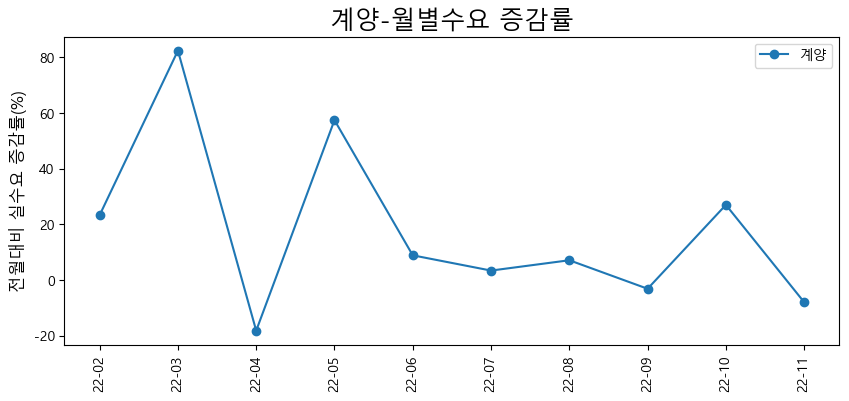

In [ ]:
#x축으로 지정할 컬럼 'time'에 저장

fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

월별 = 월별.iloc[2:-1,:]
ax.plot(월별.index,월별['증감률'],marker='o',label='계양')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#y축 레이블
plt.ylabel('전월대비 실수요 증감률(%)', fontsize=12)

#그래프 제목 지정
plt.title('계양-월별수요 증감률', fontsize=18)

plt.show()

### 10-2. 검단

In [ ]:
실수요_검단=검단[검단['실수요여부']==1]

#요청시간에서 년월만 추출
실수요_검단['년월']=실수요_검단['요청시간'].dt.strftime('%Y-%m').str[2:]

#필요한 컬럼만 저장
실수요_검단[['년월', '요청식별id']].head(5)

년월  요청식별id
2  22-08       2
3  22-10       3
4  22-10       4
5  22-10       5
9  22-12       7

In [ ]:
#월별 count 계산
월별=pd.DataFrame(실수요_검단.groupby('년월')['요청식별id'].count())
월별.columns=['count']

#증감률 계산
월별['증감률']=round(월별['count'].pct_change()*100,2)
월별.fillna(0, inplace=True)

월별

count     증감률
년월                  
21-09    689    0.00
21-10   1923  179.10
21-11   1980    2.96
21-12   1813   -8.43
22-01   1396  -23.00
22-02   1651   18.27
22-03   2843   72.20
22-04   3754   32.04
22-05   4173   11.16
22-06   4402    5.49
22-07   5740   30.40
22-08   7781   35.56
22-09   7294   -6.26
22-10   7118   -2.41
22-11   7286    2.36
22-12   4350  -40.30

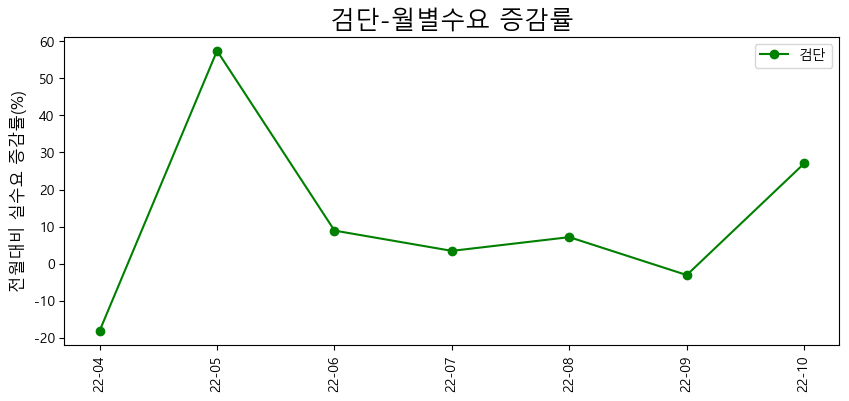

In [ ]:
#x축으로 지정할 컬럼 'time'에 저장

fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

월별 = 월별.iloc[2:-1,:]
ax.plot(월별.index,월별['증감률'],marker='o',label='검단', color='green')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

plt.ylabel('전월대비 실수요 증감률(%)', fontsize=12)

#그래프 제목 지정
plt.title('검단-월별수요 증감률', fontsize=18)

plt.show()

### 10-3. 송도

In [ ]:
실수요_송도=송도[송도['실수요여부']==1]

#요청시간에서 년월만 추출
실수요_송도['년월']=실수요_송도['요청시간'].dt.strftime('%Y-%m').str[2:]

#필요한 컬럼만 저장
실수요_송도[['년월', '요청식별id']].head(5)

년월  요청식별id
10  21-12      10
12  21-12      11
13  21-12      13
14  21-12      14
25  22-05      22

In [ ]:
#월별 count 계산
월별=pd.DataFrame(실수요_송도.groupby('년월')['요청식별id'].count())
월별.columns=['count']

#증감률 계산
월별['증감률']=round(월별['count'].pct_change()*100,2)
월별.fillna(0, inplace=True)
월별

count     증감률
년월                  
21-07    849    0.00
21-08   4916  479.03
21-09   8268   68.19
21-10  11979   44.88
21-11  14372   19.98
21-12  18742   30.41
22-01  24272   29.51
22-02  20647  -14.93
22-03  24163   17.03
22-04  26803   10.93
22-05  27740    3.50
22-06  26971   -2.77
22-07  30183   11.91
22-08  30346    0.54
22-09  27534   -9.27
22-10  27296   -0.86
22-11  27834    1.97
22-12  16261  -41.58

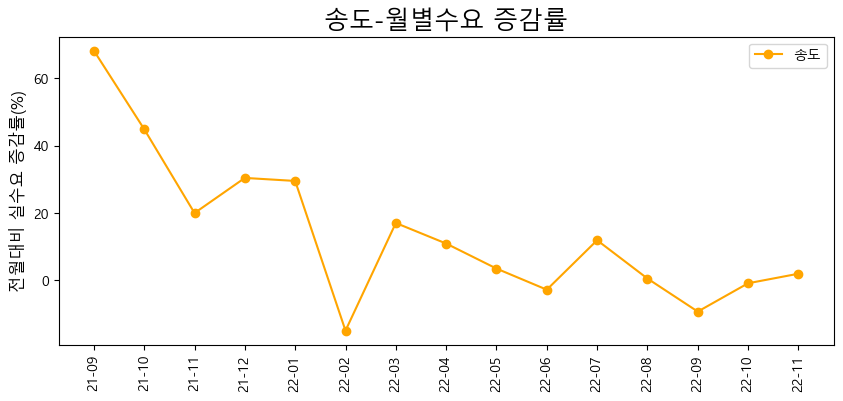

In [ ]:
#x축으로 지정할 컬럼 'time'에 저장

fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

월별 = 월별.iloc[2:-1,:]
ax.plot(월별.index,월별['증감률'],marker='o',label='송도', color='orange')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

plt.ylabel('전월대비 실수요 증감률(%)', fontsize=12)

#그래프 제목 지정
plt.title('송도-월별수요 증감률', fontsize=18)

plt.show()

### 🔗 분석11) 연령대별(어른, 청소년, 어린이) 월별/시간대별 수요(실수요 고객 기준)
- 월별 수요 : 계절성 파악  
- 시간대별 수요 : 출퇴근, 등하교 시간의 특성 파악 

### 11-1. 연령대별 월별 수요(계양)

In [ ]:
#실수요 추출
실수요=계양[계양['실수요여부']==1] 

#요청시간에서 년월만 추출
실수요['년월']=실수요['요청시간'].dt.strftime('%Y-%m').str[2:]

#필요한 열만 추출
실수요=실수요[['어른', '청소년', '어린이', '요청식별id', '년월']]

In [ ]:
#월별-어른, 청소년, 어린이 탑승 수요 집계
실수요=실수요.groupby('년월')['어른', '청소년', '어린이'].sum()
실수요

어른  청소년  어린이
년월                  
21-12   19    0    0
22-01  116    7   15
22-02  155    6    5
22-03  302    6   11
22-04  234    6   17
22-05  351   10   21
22-06  397   11   18
22-07  421    7   36
22-08  442    1   31
22-09  420    4   19
22-10  527    4   33
22-11  485    7   16
22-12  170    5    9

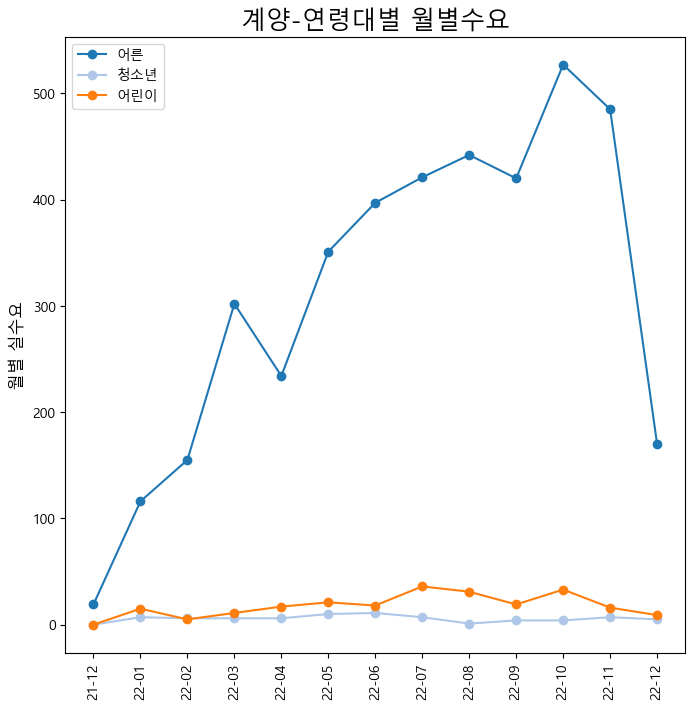

In [ ]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어른'],marker='o',label='어른') ## 선그래프 생성
ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년')
ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

# y축 레이블
plt.ylabel('월별 실수요', fontsize=12)

#그래프 제목 지정
plt.title('계양-연령대별 월별수요', fontsize=18)

plt.show()

-> 청소년/어린이는 자세하게 따로 시각화

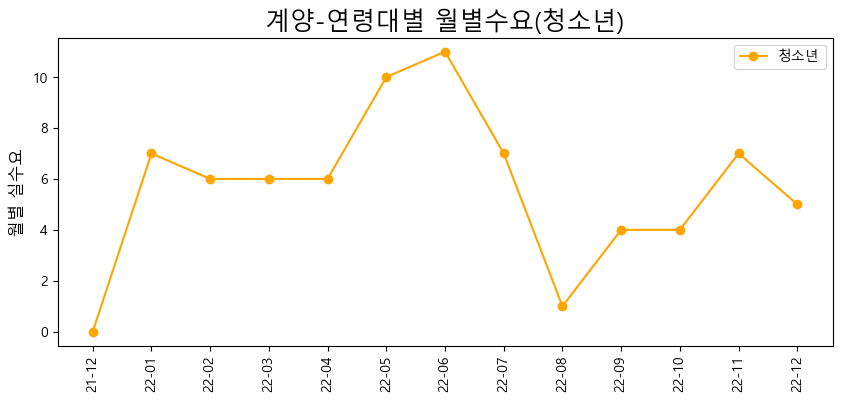

In [ ]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년', color='orange')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

plt.ylabel('월별 실수요', fontsize=12)


#그래프 제목 지정
plt.title('계양-연령대별 월별수요(청소년)', fontsize=18)

plt.show()

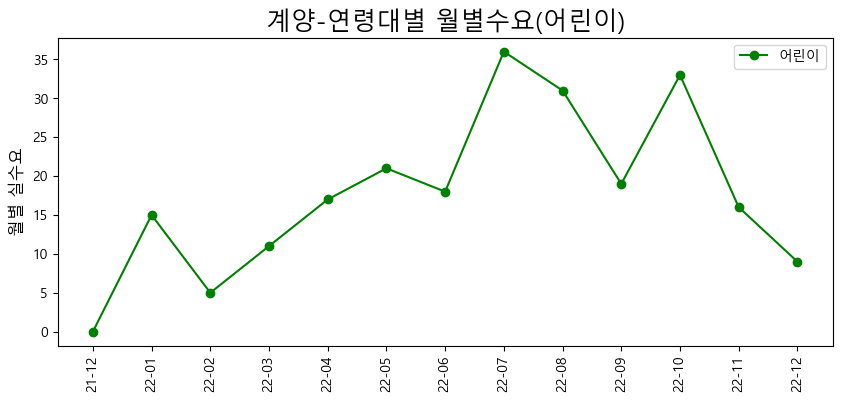

In [ ]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이', color='green')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('계양-연령대별 월별수요(어린이)', fontsize=18)
plt.ylabel('월별 실수요', fontsize=12)


plt.show()

### 11-2. 연령대별 시간대별 수요(계양)

In [ ]:
#실수요 추출
실수요=계양[계양['실수요여부']==1] 

#요청시간에서 시간만 추출
실수요['시']=실수요['요청시간'].dt.strftime('%H')

#필요한 열만 추출
실수요=실수요[['어른', '청소년', '어린이', '요청식별id', '시']]

In [ ]:
#월별-어른, 청소년, 어린이 탑승 수요 집계
실수요=실수요.groupby('시')['어른', '청소년', '어린이'].sum()
실수요

어른  청소년  어린이
시                
05   17    0    0
06  319    1    0
07  411    3    2
08  333    3   56
09  270    4   12
10  189    2   10
11  101    3    7
12  170    1    7
13  164    4   19
14  211   13   21
15  169    9    8
16  241    5   25
17  246   11   18
18  305   10   24
19  397    2   11
20  185    0    2
21  137    2    6
22  174    1    3

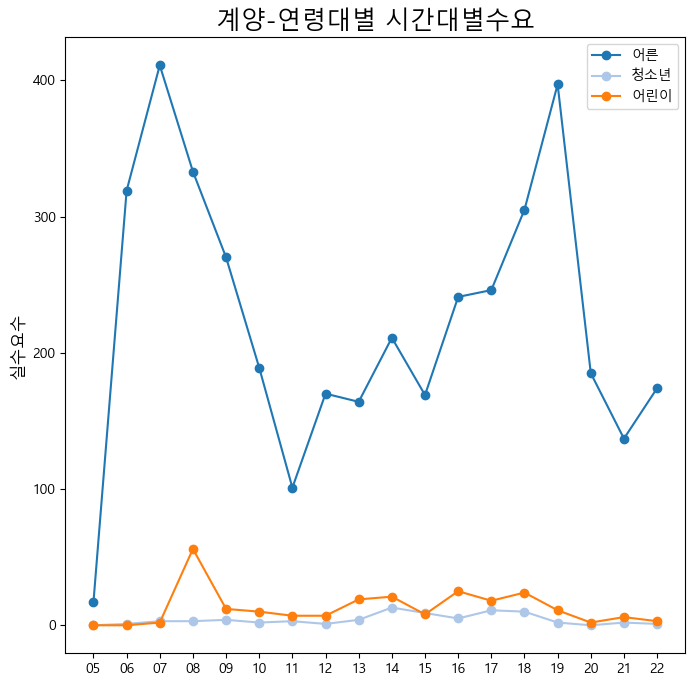

In [ ]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어른'],marker='o',label='어른') ## 선그래프 생성
ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년')
ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이')

ax.legend() ## 범례

plt.ylabel('실수요수', fontsize=12)

#그래프 제목 지정
plt.title('계양-연령대별 시간대별수요', fontsize=18)

plt.show()

-> 청소년/어린이는 자세하게 따로 시각화

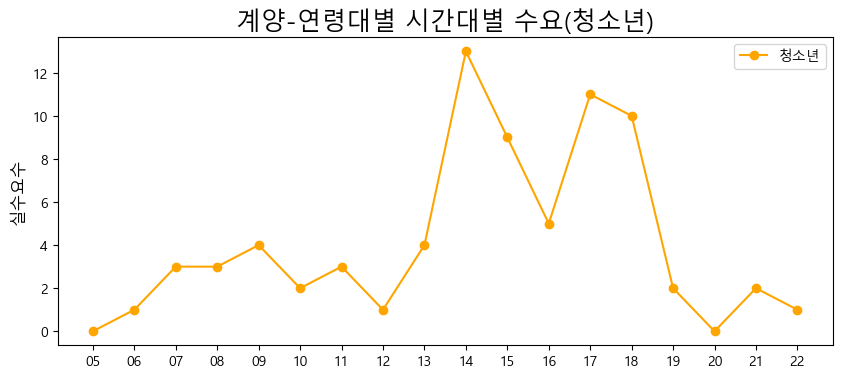

In [ ]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년', color='orange')

ax.legend() ## 범례
plt.ylabel('실수요수', fontsize=12)


#그래프 제목 지정
plt.title('계양-연령대별 시간대별 수요(청소년)', fontsize=18)

plt.show()

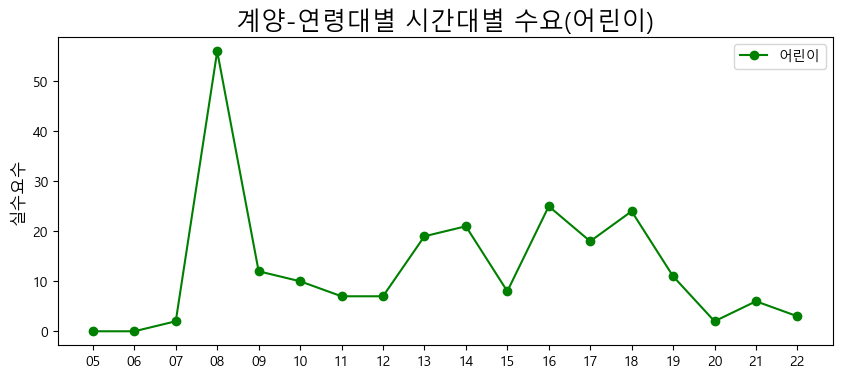

In [ ]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이', color='green')

ax.legend() ## 범례
plt.ylabel('실수요수', fontsize=12)



#그래프 제목 지정
plt.title('계양-연령대별 시간대별 수요(어린이)', fontsize=18)

plt.show()

### 11-3. 연령대별 월별 수요(검단)

In [ ]:
#실수요 추출
실수요=검단[검단['실수요여부']==1] 

#요청시간에서 년월만 추출
실수요['년월']=실수요['요청시간'].dt.strftime('%Y-%m').str[2:]

#필요한 열만 추출
실수요=실수요[['어른', '청소년', '어린이', '요청식별id', '년월']]

In [ ]:
#월별-어른, 청소년, 어린이 탑승 수요 집계
실수요=실수요.groupby('년월')['어른', '청소년', '어린이'].sum()
실수요

어른   청소년  어린이
년월                    
21-09   749    29   69
21-10  1776   325  176
21-11  1618   489  218
21-12  1529   381  173
22-01  1156   308  186
22-02  1366   407  179
22-03  2383   644  219
22-04  2952  1020  392
22-05  3412  1066  383
22-06  3753  1094  440
22-07  5008  1266  540
22-08  6984  1362  732
22-09  6528  1303  634
22-10  6477  1239  656
22-11  6570  1169  567
22-12  3930   717  259

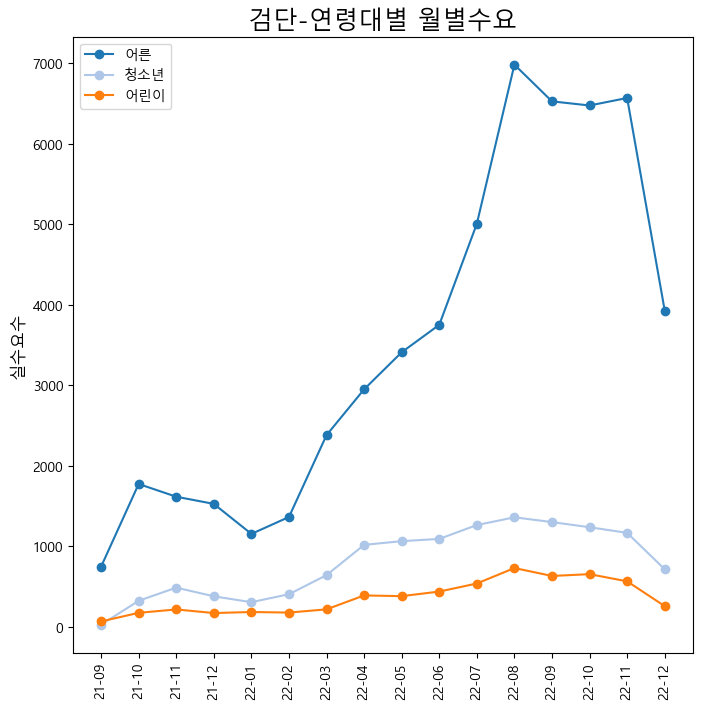

In [ ]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어른'],marker='o',label='어른') ## 선그래프 생성
ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년')
ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

plt.ylabel('실수요수', fontsize=12)


#그래프 제목 지정
plt.title('검단-연령대별 월별수요', fontsize=18)

plt.show()

-> 청소년/어린이는 자세하게 따로 시각화

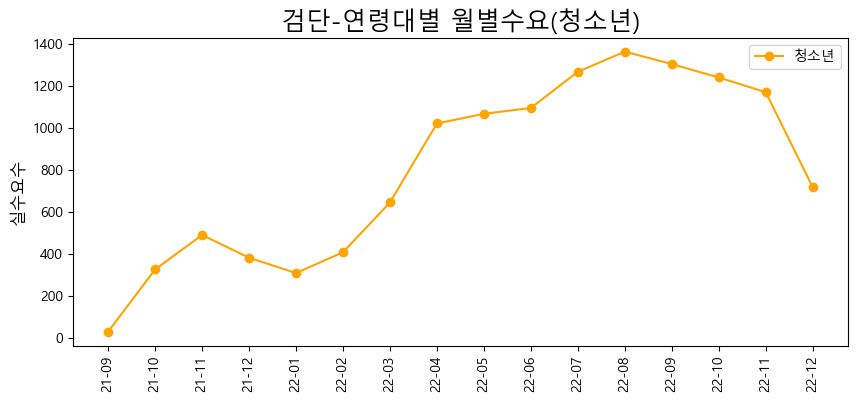

In [ ]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년', color='orange')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

plt.ylabel('실수요수', fontsize=12)


#그래프 제목 지정
plt.title('검단-연령대별 월별수요(청소년)', fontsize=18)

plt.show()

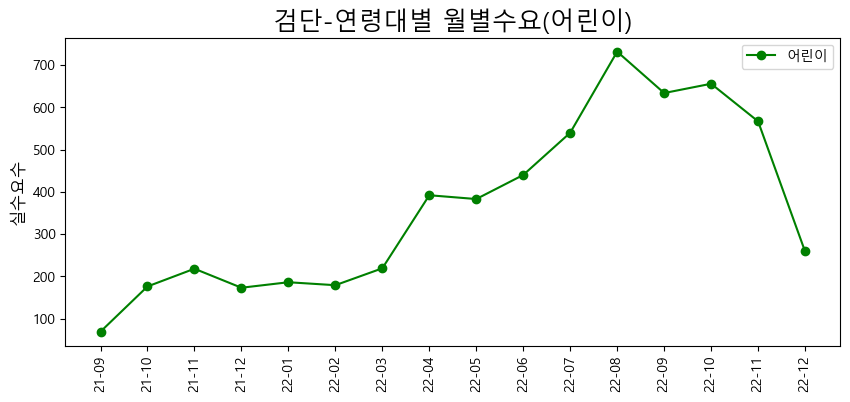

In [ ]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이', color='green')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

plt.ylabel('실수요수', fontsize=12)


#그래프 제목 지정
plt.title('검단-연령대별 월별수요(어린이)', fontsize=18)

plt.show()

### 11-4. 연령대별 시간대별 수요(검단)

In [ ]:
#실수요 추출
실수요=검단[검단['실수요여부']==1] 

#요청시간에서 시간만 추출
실수요['시']=실수요['요청시간'].dt.strftime('%H')

#필요한 열만 추출
실수요=실수요[['어른', '청소년', '어린이', '요청식별id', '시']]

In [ ]:
#월별-어른, 청소년, 어린이 탑승 수요 집계
실수요=실수요.groupby('시')['어른', '청소년', '어린이'].sum()
실수요

어른   청소년  어린이
시                  
05   348     1    0
06  1332    72    3
07  3406   636   39
08  4084   905  351
09  3366   316  193
10  3002   299  240
11  2779   362  223
12  2848   552  268
13  3110   537  359
14  3124   610  767
15  3641   879  705
16  4394  1651  681
17  4409  1311  822
18  4849  1267  566
19  3400   948  269
20  2735   843  167
21  2571   629  120
22  2413   925   46
23   380    76    4

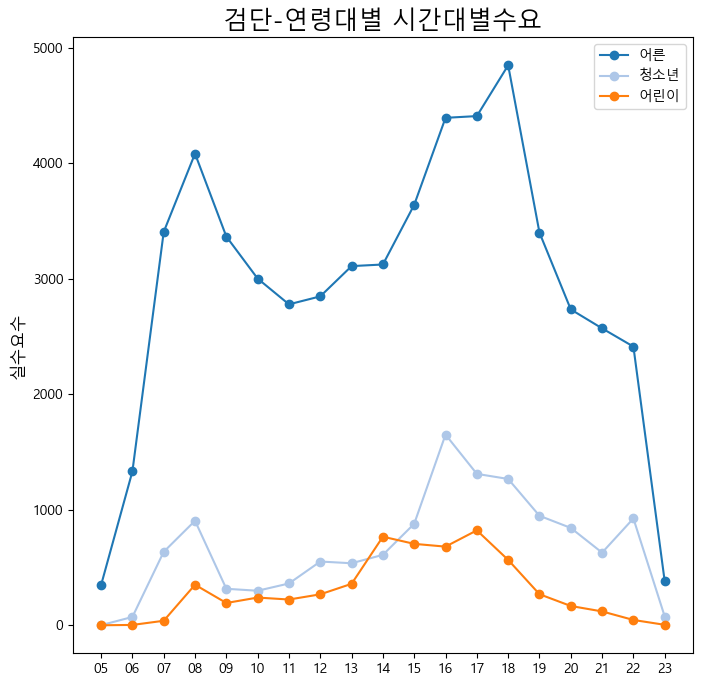

In [ ]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어른'],marker='o',label='어른') ## 선그래프 생성
ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년')
ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이')

ax.legend() ## 범례
plt.ylabel('실수요수', fontsize=12)


#그래프 제목 지정
plt.title('검단-연령대별 시간대별수요', fontsize=18)

plt.show()

-> 청소년/어린이는 자세하게 따로 시각화

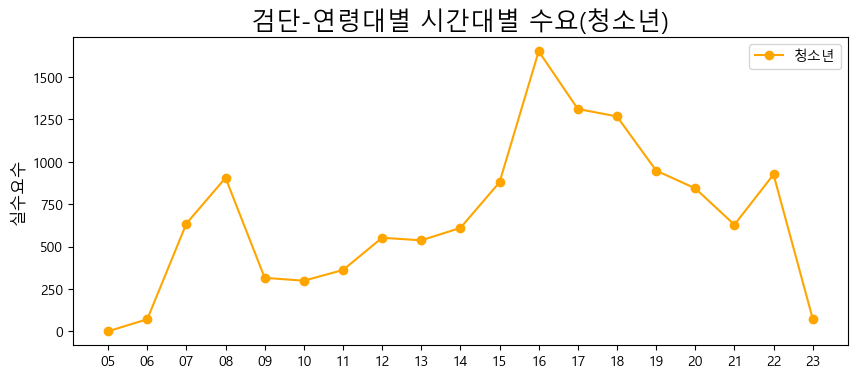

In [ ]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년', color='orange')

ax.legend() ## 범례
plt.ylabel('실수요수', fontsize=12)


#그래프 제목 지정
plt.title('검단-연령대별 시간대별 수요(청소년)', fontsize=18)

plt.show()

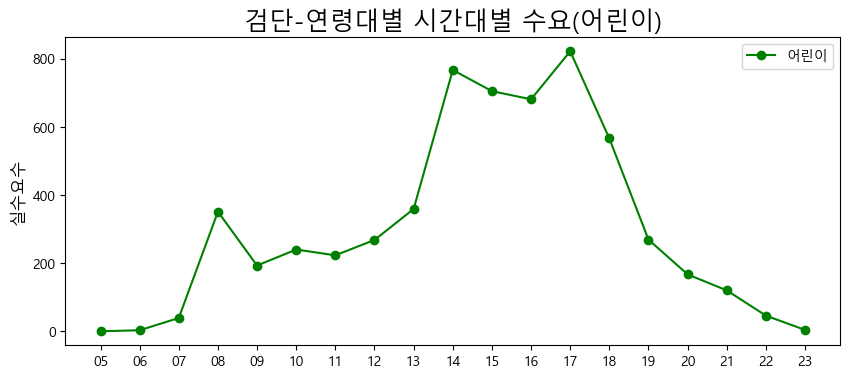

In [ ]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이', color='green')

ax.legend() ## 범례

plt.ylabel('실수요수', fontsize=12)

#그래프 제목 지정
plt.title('검단-연령대별 시간대별 수요(어린이)', fontsize=18)

plt.show()

### 11-5. 연령대별 월별 수요(송도)

In [ ]:
실수요=송도[송도['실수요여부']==1] 

실수요['년월']=실수요['요청시간'].dt.strftime('%Y-%m').str[2:]

실수요=실수요[['어른', '청소년', '어린이', '요청식별id', '년월']]

In [ ]:
#월별-어른, 청소년, 어린이 탑승 수요 집계
실수요=실수요.groupby('년월')['어른', '청소년', '어린이'].sum()
실수요

어른   청소년   어린이
년월                      
21-07    587   113   253
21-08   4001  1070   530
21-09   6620  1968   799
21-10   9426  3005  1048
21-11  11147  3600  1154
21-12  14579  4854  1233
22-01  19071  6284  1410
22-02  16455  5178  1167
22-03  19522  5672  1458
22-04  21663  5891  2151
22-05  23354  5971  1883
22-06  22791  5714  2053
22-07  25779  6280  2263
22-08  26426  6051  2457
22-09  24011  5289  2121
22-10  23411  5423  2073
22-11  23652  5260  1935
22-12  13863  3059  1002

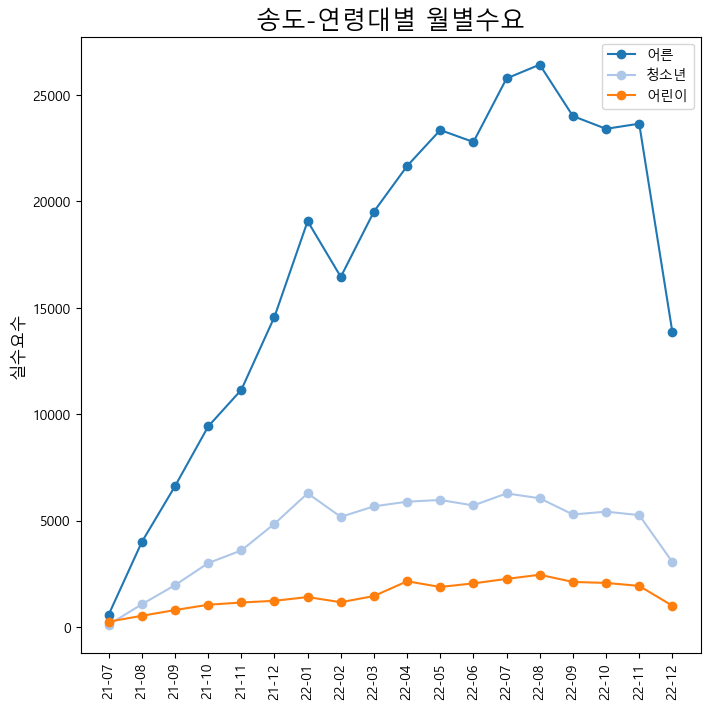

In [ ]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어른'],marker='o',label='어른') ## 선그래프 생성
ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년')
ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이')

ax.legend() ## 범례
plt.ylabel('실수요수', fontsize=12)


#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('송도-연령대별 월별수요', fontsize=18)

plt.show()

-> 청소년/어린이는 자세하게 따로 시각화

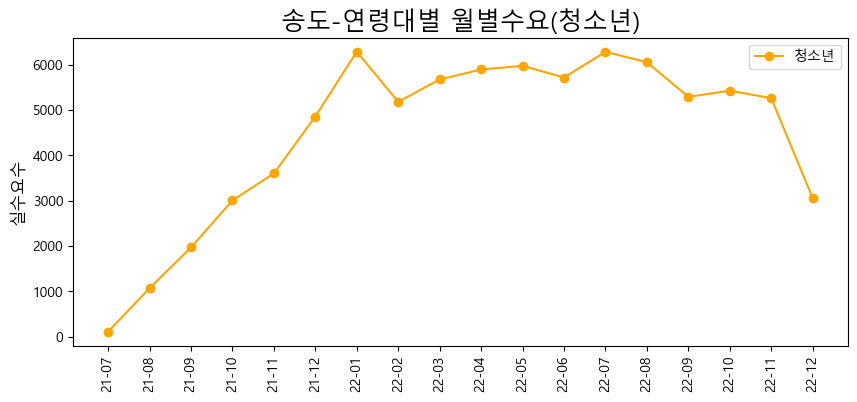

In [ ]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년', color='orange')

ax.legend() ## 범례
plt.ylabel('실수요수', fontsize=12)


#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('송도-연령대별 월별수요(청소년)', fontsize=18)

plt.show()

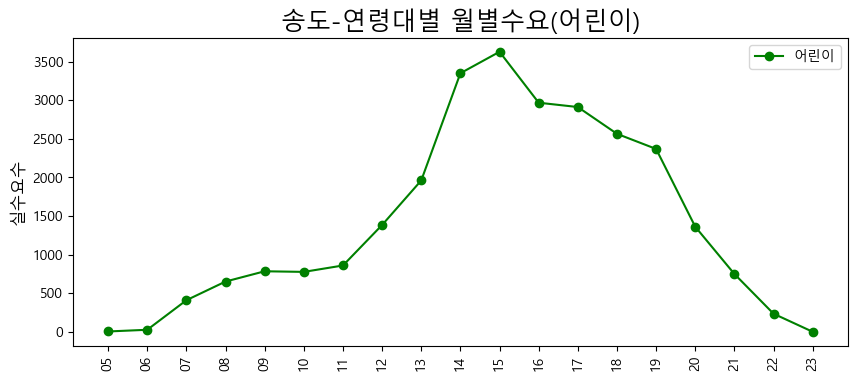

In [ ]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이', color='green')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)
plt.ylabel('실수요수', fontsize=12)


#그래프 제목 지정
plt.title('송도-연령대별 월별수요(어린이)', fontsize=18)

plt.show()

### 11-6. 연령대별 시간대별 수요(송도)

In [ ]:
실수요=송도[송도['실수요여부']==1] 

실수요['시']=실수요['요청시간'].dt.strftime('%H')


실수요=실수요[['어른', '청소년', '어린이', '요청식별id', '시']]

In [ ]:
#월별-어른, 청소년, 어린이 탑승 수요 집계
실수요=실수요.groupby('시')['어른', '청소년', '어린이'].sum()
실수요

어른    청소년   어린이
시                     
05   3247     62     4
06   8596    476    26
07  15657   4582   409
08  21564   2874   651
09  16874   2219   784
10  13519   2108   776
11  14195   2757   859
12  15430   3884  1384
13  15491   3616  1961
14  17323   4791  3350
15  17897   8224  3628
16  22636  11634  2968
17  25790   7189  2912
18  28114   6828  2565
19  21409   5445  2369
20  18637   4714  1361
21  16816   5019   749
22  13157   4260   234
23      6      0     0

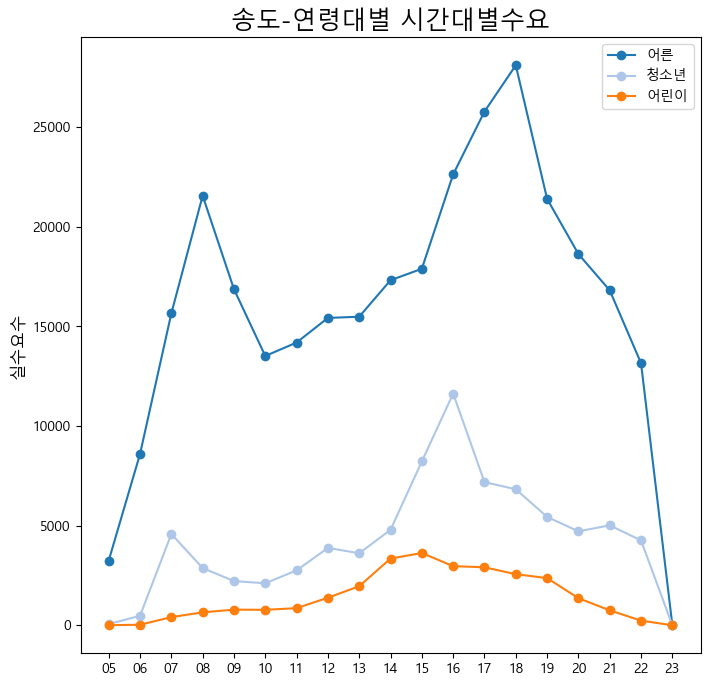

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(실수요.index,실수요['어른'],marker='o',label='어른')
ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년')
ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이')

ax.legend()

plt.title('송도-연령대별 시간대별수요', fontsize=18)
plt.ylabel('실수요수', fontsize=12)

plt.show()

-> 청소년/어린이는 자세하게 따로 시각화

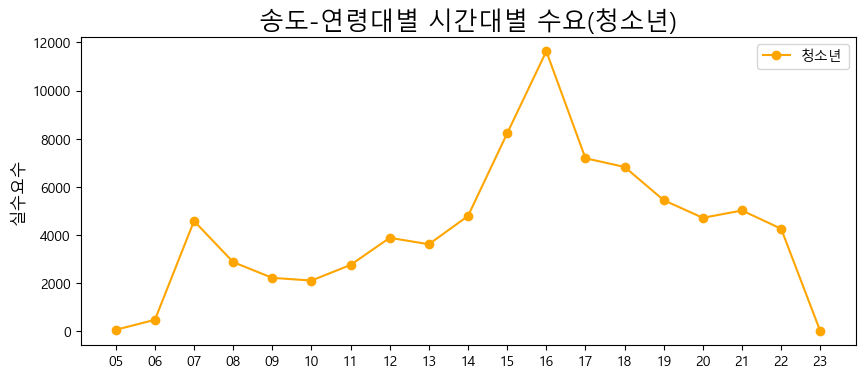

In [ ]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년', color='orange')

ax.legend()

plt.title('송도-연령대별 시간대별 수요(청소년)', fontsize=18)
plt.ylabel('실수요수', fontsize=12)

plt.show()

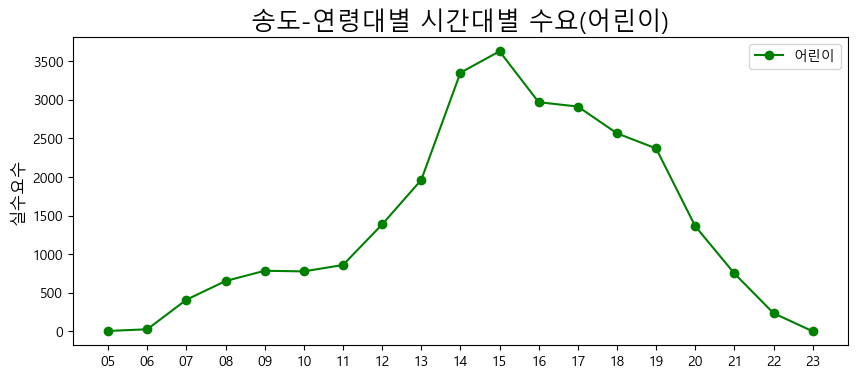

In [ ]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이', color='green')

ax.legend() ## 범례


#그래프 제목 지정
plt.title('송도-연령대별 시간대별 수요(어린이)', fontsize=18)
plt.ylabel('실수요수', fontsize=12)

plt.show()

### 🔗 분석12) 지역별/시간대별 정류장방면 분석(실수요고객 기준)

정류장 방면정보를 활용해 시간대별 어느방면으로의 통행이 많은지 표 또는 차트로 시각화 


### 12-1. 지역별 배차요청 많았던 방면 분석(계양)

In [ ]:
방면=계양[계양['실수요여부']==1][['승차정류장명', '하차정류장명','승차정류장방면', '하차정류장방면','회원유형', '요청식별id']]

In [ ]:
#승차정류장방면 별 배차요청수요 count
승차방면=pd.DataFrame(방면.groupby(['승차정류장명','승차정류장방면'])['요청식별id'].count().sort_values(ascending=False))

- 계양지역의 가장 배차 요청이 많았던 방면 Top10

In [ ]:
승차방면.head(10)

요청식별id
승차정류장명          승차정류장방면              
계양역             다남식당 방면          1108
소촌마을            대촌마을 방면           451
인혜학교후문(원욱그린타운)  부대앞 방면            254
세농푸드            남씨농원앞 방면          249
계양역(계양중학교 방면)   귤현역방면             194
장기동(농협앞)        계양1동주민자치센터 방면     183
이화1동회차지         이화동노인정 방면         173
목상동솔밭.이주단지입구    목상동마을입구 방면        141
이화동다리           장기동 방면            136
둑실동(아라마루전망대)    목상교입구 방면          100

In [ ]:
#승차정류장방면 별 배차요청수요 count
하차방면=pd.DataFrame(방면.groupby(['하차정류장명','하차정류장방면'])['요청식별id'].count().sort_values(ascending=False))

In [ ]:
하차방면.head(10)

요청식별id
하차정류장명          하차정류장방면                  
계양역(계양중학교 방면)   귤현역방면                 894
계양역             다남식당 방면               790
소촌마을            대촌마을 방면               252
세농푸드            남씨농원앞 방면              196
인혜학교후문(원욱그린타운)  장기동 방면                189
장기동(농협앞)        계양1동주민자치센터 방면         159
선주지교회           선주삼거리 방면              128
이화2동회차지         이화진등마을경로당 방면          111
예원앞             둑실경로당 방면               95
장기동             인혜학교후문(원욱그린타운) 방면      88

### 12-2. 지역별 배차요청 많았던 방면 분석(검단)

In [ ]:
방면=검단[검단['실수요여부']==1][['승차정류장명', '하차정류장명','승차정류장방면', '하차정류장방면','회원유형', '요청식별id']]

In [ ]:
#승차정류장방면 별 배차요청수요 count
승차방면=pd.DataFrame(방면.groupby(['승차정류장명','승차정류장방면'])['요청식별id'].count().sort_values(ascending=False))

- 검단지역의 가장 배차 요청이 많았던 방면 Top10

In [ ]:
승차방면.head(10)

요청식별id
승차정류장명             승차정류장방면                
완정역                당하동탑스빌아파트 방면       5707
[E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면      5267
[F] 검단LH행복주택       오류동마을 방면           3829
보람프라자앞             원당사거리/검단선사박물관방면    3818
아라동행정복지센터          유현사거리 방면           3704
계양역                다남식당 방면            3418
독정역(서구동구예비군훈련장)    백석고가(하이마트) 방면      2673
[C] 아라노을공원·한신더휴    서구영어마을 방면          2627
[F] 검단LH행복주택       아라센트럴파크 방면         2328
[D] 인천해든초등학교       아라노을공원·한신더휴 방면     2298

In [ ]:
하차방면=pd.DataFrame(방면.groupby(['하차정류장명','하차정류장방면'])['요청식별id'].count().sort_values(ascending=False))


In [ ]:
하차방면.head(10)

요청식별id
하차정류장명             하차정류장방면                
완정역                당하동탑스빌아파트 방면       8728
[E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면      4701
삼정프라자              참빛감리교회방면           4483
계양역                다남식당 방면            3843
[F] 검단LH행복주택       오류동마을 방면           3768
아라동행정복지센터          유현사거리 방면           3750
[C] 아라노을공원·한신더휴    아라센트럴파크 방면         2570
독정역(서구동구예비군훈련장)    백석고가(하이마트) 방면      2410
[E] 이음대로.호반써밋      인천영어마을앞 방면         2196
보람프라자앞             원당사거리/검단선사박물관방면    1837

### 12-3. 지역별 배차요청 많았던 방면 분석(송도)

In [ ]:
방면=송도[송도['실수요여부']==1][['승차정류장명', '하차정류장명','승차정류장방면', '하차정류장방면','회원유형', '요청식별id']]

In [ ]:
#승차정류장방면 별 배차요청수요 count
승차방면=pd.DataFrame(방면.groupby(['승차정류장명','승차정류장방면'])['요청식별id'].count().sort_values(ascending=False))

- 송도지역의 가장 배차 요청이 많았던 방면 Top10

In [ ]:
승차방면.head(10)

요청식별id
승차정류장명             승차정류장방면                     
e편한세상 정문           랜드마크시티센트럴더샵(106동) 방면   14573
더샵송도마리나베이아파트후문     힐스테이트레이크송도2차 방면        11613
테크노파크역             캠퍼스타운역 방면               8480
랜드마크시티센트럴더샵(106동)  송도호반베르디움3차에듀시티 방면       8443
미송초등학교             e편한세상정문 방면              8387
힐스테이트송도더테라스(정문)    달빛축제공원 방면               7907
해양경찰청              이안송도 방면                 7634
송도달빛축제공원역          힐스테이트송도더테라스(후문) 방면      7533
달빛축제공원대공연장         달빛축제공원 방면               7499
랜드마크시티센트럴더샵(203동)  송도호반베르디움3차에듀시티 방면       7318

In [ ]:
하차방면=pd.DataFrame(방면.groupby(['하차정류장명','하차정류장방면'])['요청식별id'].count().sort_values(ascending=False))


In [ ]:
하차방면.head(10)

요청식별id
하차정류장명             하차정류장방면                     
더샵송도마리나베이아파트후문     힐스테이트레이크송도2차 방면        15836
해양경찰청              이안송도 방면                14308
랜드마크시티센트럴더샵(203동)  송도호반베르디움3차에듀시티 방면      12205
테크노파크역             캠퍼스타운역 방면              11758
랜드마크시티센트럴더샵(106동)  송도호반베르디움3차에듀시티 방면      10908
송도오션파크베르디움         미송초등학교(하행) 방면          10330
e편한세상 정문           랜드마크시티센트럴더샵(106동) 방면    7726
힐스테이트레이크송도(후문)     힐스테이트레이크송도1차입구 방면       7168
e편한세상(109동 앞)      송담초등학교 방면               6848
송도힐스테이트            송도풍림아이원2단지 방면           6630


### 12-4. 시간대별 배차요청 많았던 방면 분석(계양)

In [ ]:
승하차방면=계양[계양['실수요여부']==1]
승하차방면['시']=승하차방면['요청시간'].dt.strftime("%H")

In [ ]:
#필요한 열만 추출
방면=승하차방면[['시', '승차정류장명','승차정류장방면', '요청식별id']]

In [ ]:
#시, 승차정류장방면 기준 배차요청 수요 count
방면=pd.DataFrame(방면.groupby(['시','승차정류장명', '승차정류장방면'])['요청식별id'].count())
방면.columns=['count']
방면.reset_index(inplace=True)

In [ ]:
#시간별 배차요청 많은 top1 방면 추출
방면1=방면[방면['시']=='05'].sort_values('count', ascending=False).head(1)
방면2=방면[방면['시']=='06'].sort_values('count', ascending=False).head(1)
방면3=방면[방면['시']=='07'].sort_values('count', ascending=False).head(1)
방면4=방면[방면['시']=='08'].sort_values('count', ascending=False).head(1)
방면5=방면[방면['시']=='09'].sort_values('count', ascending=False).head(1)
방면6=방면[방면['시']=='10'].sort_values('count', ascending=False).head(1)
방면7=방면[방면['시']=='11'].sort_values('count', ascending=False).head(1)
방면8=방면[방면['시']=='12'].sort_values('count', ascending=False).head(1)
방면9=방면[방면['시']=='13'].sort_values('count', ascending=False).head(1)
방면10=방면[방면['시']=='14'].sort_values('count', ascending=False).head(1)
방면11=방면[방면['시']=='15'].sort_values('count', ascending=False).head(1)
방면12=방면[방면['시']=='16'].sort_values('count', ascending=False).head(1)
방면13=방면[방면['시']=='17'].sort_values('count', ascending=False).head(1)
방면14=방면[방면['시']=='18'].sort_values('count', ascending=False).head(1)
방면15=방면[방면['시']=='19'].sort_values('count', ascending=False).head(1)
방면16=방면[방면['시']=='20'].sort_values('count', ascending=False).head(1)
방면17=방면[방면['시']=='21'].sort_values('count', ascending=False).head(1)
방면18=방면[방면['시']=='22'].sort_values('count', ascending=False).head(1)

- 계양지역의 시간대별 가장 배차 요청이 많았던 방면 Top1

In [ ]:
방면=pd.concat([방면1, 방면2, 방면3, 방면4, 방면5, 방면6, 방면7, 방면8, 방면9, 방면10, 방면11, 방면12, 방면13, 방면14, 방면15, 방면16, 방면17, 방면18])
방면.set_index(['시', '승차정류장명','승차정류장방면'])

count
시  승차정류장명   승차정류장방면         
05 계양역      다남식당 방면       11
06 이화1동회차지  이화동노인정 방면    121
07 세농푸드     남씨농원앞 방면     125
08 소촌마을     대촌마을 방면      166
09 계양역      다남식당 방면      103
10 계양역      다남식당 방면       42
11 계양역      다남식당 방면       21
12 계양역      다남식당 방면       52
13 계양역      다남식당 방면       44
14 계양역      다남식당 방면       42
15 계양역      다남식당 방면       28
16 계양역      다남식당 방면       43
17 계양역      다남식당 방면       87
18 계양역      다남식당 방면      137
19 계양역      다남식당 방면      251
20 계양역      다남식당 방면       51
21 계양역      다남식당 방면       52
22 계양역      다남식당 방면       84

In [ ]:
#필요한 열만 추출
방면=승하차방면[['시', '하차정류장명','하차정류장방면', '요청식별id']]

In [ ]:
#시, 승차정류장방면 기준 배차요청 수요 count
방면=pd.DataFrame(방면.groupby(['시','하차정류장명','하차정류장방면'])['요청식별id'].count())
방면.columns=['count']
방면.reset_index(inplace=True)

In [ ]:
#시간별 배차요청 많은 top1 방면 추출
방면1=방면[방면['시']=='05'].sort_values('count', ascending=False).head(1)
방면2=방면[방면['시']=='06'].sort_values('count', ascending=False).head(1)
방면3=방면[방면['시']=='07'].sort_values('count', ascending=False).head(1)
방면4=방면[방면['시']=='08'].sort_values('count', ascending=False).head(1)
방면5=방면[방면['시']=='09'].sort_values('count', ascending=False).head(1)
방면6=방면[방면['시']=='10'].sort_values('count', ascending=False).head(1)
방면7=방면[방면['시']=='11'].sort_values('count', ascending=False).head(1)
방면8=방면[방면['시']=='12'].sort_values('count', ascending=False).head(1)
방면9=방면[방면['시']=='13'].sort_values('count', ascending=False).head(1)
방면10=방면[방면['시']=='14'].sort_values('count', ascending=False).head(1)
방면11=방면[방면['시']=='15'].sort_values('count', ascending=False).head(1)
방면12=방면[방면['시']=='16'].sort_values('count', ascending=False).head(1)
방면13=방면[방면['시']=='17'].sort_values('count', ascending=False).head(1)
방면14=방면[방면['시']=='18'].sort_values('count', ascending=False).head(1)
방면15=방면[방면['시']=='19'].sort_values('count', ascending=False).head(1)
방면16=방면[방면['시']=='20'].sort_values('count', ascending=False).head(1)
방면17=방면[방면['시']=='21'].sort_values('count', ascending=False).head(1)
방면18=방면[방면['시']=='22'].sort_values('count', ascending=False).head(1)

- 계양지역의 시간대별 가장 배차 요청이 많았던 방면 Top1

In [ ]:
방면=pd.concat([방면1, 방면2, 방면3, 방면4, 방면5, 방면6, 방면7, 방면8, 방면9, 방면10, 방면11, 방면12, 방면13, 방면14, 방면15, 방면16, 방면17, 방면18])
방면.set_index(['시', '하차정류장명','하차정류장방면'])

count
시  하차정류장명          하차정류장방면            
05 대우실업            이화2동마을회관 방면      11
06 계양역(계양중학교 방면)   귤현역방면           164
07 계양역(계양중학교 방면)   귤현역방면           201
08 계양역(계양중학교 방면)   귤현역방면            85
09 계양역             다남식당 방면          45
10 계양역             다남식당 방면          43
11 계양역             다남식당 방면          29
12 계양역(계양중학교 방면)   귤현역방면            36
13 계양역             다남식당 방면          36
14 계양역             다남식당 방면          35
15 계양역(계양중학교 방면)   귤현역방면            43
16 계양역(계양중학교 방면)   귤현역방면            63
17 예원앞             둑실경로당 방면         58
18 인혜학교후문(원욱그린타운)  장기동 방면           44
19 세농푸드            남씨농원앞 방면         70
20 이화2동회차지         이화진등마을경로당 방면     32
21 인혜학교후문(원욱그린타운)  장기동 방면           22
22 계양역             다남식당 방면          28

### 12-5. 시간대별 배차요청 많았던 방면 분석(검단)

In [ ]:
승하차방면=검단[검단['실수요여부']==1]
승하차방면['시']=승하차방면['요청시간'].dt.strftime("%H")

In [ ]:
#필요한 열만 추출
방면=승하차방면[['시','승차정류장명','승차정류장방면', '요청식별id']]

In [ ]:
#시, 승차정류장방면 기준 배차요청 수요 count
방면=pd.DataFrame(방면.groupby(['시','승차정류장명','승차정류장방면'])['요청식별id'].count())
방면.columns=['count']
방면.reset_index(inplace=True)

In [ ]:
#시간별 배차요청 많은 top1방면 추출
방면1=방면[방면['시']=='05'].sort_values('count', ascending=False).head(1)
방면2=방면[방면['시']=='06'].sort_values('count', ascending=False).head(1)
방면3=방면[방면['시']=='07'].sort_values('count', ascending=False).head(1)
방면4=방면[방면['시']=='08'].sort_values('count', ascending=False).head(1)
방면5=방면[방면['시']=='09'].sort_values('count', ascending=False).head(1)
방면6=방면[방면['시']=='10'].sort_values('count', ascending=False).head(1)
방면7=방면[방면['시']=='11'].sort_values('count', ascending=False).head(1)
방면8=방면[방면['시']=='12'].sort_values('count', ascending=False).head(1)
방면9=방면[방면['시']=='13'].sort_values('count', ascending=False).head(1)
방면10=방면[방면['시']=='14'].sort_values('count', ascending=False).head(1)
방면11=방면[방면['시']=='15'].sort_values('count', ascending=False).head(1)
방면12=방면[방면['시']=='16'].sort_values('count', ascending=False).head(1)
방면13=방면[방면['시']=='17'].sort_values('count', ascending=False).head(1)
방면14=방면[방면['시']=='18'].sort_values('count', ascending=False).head(1)
방면15=방면[방면['시']=='19'].sort_values('count', ascending=False).head(1)
방면16=방면[방면['시']=='20'].sort_values('count', ascending=False).head(1)
방면17=방면[방면['시']=='21'].sort_values('count', ascending=False).head(1)
방면18=방면[방면['시']=='22'].sort_values('count', ascending=False).head(1)
방면19=방면[방면['시']=='23'].sort_values('count', ascending=False).head(1)

- 검단지역의 시간대별 가장 배차 요청이 많았던 방면 Top1

In [ ]:
방면=pd.concat([방면1, 방면2, 방면3, 방면4, 방면5, 방면6, 방면7, 방면8, 방면9, 방면10, 방면11, 방면12, 방면13, 방면14, 방면15, 방면16, 방면17, 방면18, 방면19])
방면.set_index(['시','승차정류장명', '승차정류장방면'])

count
시  승차정류장명             승차정류장방면               
05 삼정프라자              참빛감리교회방면            70
06 [F] 검단LH행복주택       아라센트럴파크 방면         117
07 [F] 검단LH행복주택       오류동마을 방면           375
08 [F] 검단LH행복주택       오류동마을 방면           536
09 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면      534
10 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면      450
11 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면      387
12 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면      346
13 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면      347
14 완정역                당하동탑스빌아파트 방면       324
15 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면      351
16 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면      453
17 완정역                당하동탑스빌아파트 방면       503
18 완정역                당하동탑스빌아파트 방면       640
19 완정역                당하동탑스빌아파트 방면       476
20 보람프라자앞             원당사거리/검단선사박물관방면    473
21 완정역                당하동탑스빌아파트 방면       506
22 완정역                당하동탑스빌아파트 방면       740
23 계양역                다남식당 방면            155

In [ ]:
#필요한 열만 추출
방면 = 승하차방면[['시', '하차정류장명', '하차정류장방면', '요청식별id']]
#시, 승차정류장방면 기준 배차요청 수요 count
방면 = pd.DataFrame(방면.groupby(['시', '하차정류장명', '하차정류장방면'])['요청식별id'].count())
방면.columns = ['count']
방면.reset_index(inplace=True)

In [ ]:

#시간별 배차요청 많은 top1방면 추출
방면1 = 방면[방면['시'] == '05'].sort_values('count', ascending=False).head(1)
방면2 = 방면[방면['시'] == '06'].sort_values('count', ascending=False).head(1)
방면3 = 방면[방면['시'] == '07'].sort_values('count', ascending=False).head(1)
방면4 = 방면[방면['시'] == '08'].sort_values('count', ascending=False).head(1)
방면5 = 방면[방면['시'] == '09'].sort_values('count', ascending=False).head(1)
방면6 = 방면[방면['시'] == '10'].sort_values('count', ascending=False).head(1)
방면7 = 방면[방면['시'] == '11'].sort_values('count', ascending=False).head(1)
방면8 = 방면[방면['시'] == '12'].sort_values('count', ascending=False).head(1)
방면9 = 방면[방면['시'] == '13'].sort_values('count', ascending=False).head(1)
방면10 = 방면[방면['시'] == '14'].sort_values('count', ascending=False).head(1)
방면11 = 방면[방면['시'] == '15'].sort_values('count', ascending=False).head(1)
방면12 = 방면[방면['시'] == '16'].sort_values('count', ascending=False).head(1)
방면13 = 방면[방면['시'] == '17'].sort_values('count', ascending=False).head(1)
방면14 = 방면[방면['시'] == '18'].sort_values('count', ascending=False).head(1)
방면15 = 방면[방면['시'] == '19'].sort_values('count', ascending=False).head(1)
방면16 = 방면[방면['시'] == '20'].sort_values('count', ascending=False).head(1)
방면17 = 방면[방면['시'] == '21'].sort_values('count', ascending=False).head(1)
방면18 = 방면[방면['시'] == '22'].sort_values('count', ascending=False).head(1)
방면19 = 방면[방면['시'] == '23'].sort_values('count', ascending=False).head(1)


- 검단지역의 시간대별 가장 배차요청이 많았던 방면 Top1

In [ ]:

방면 = pd.concat(
    [방면1, 방면2, 방면3, 방면4, 방면5, 방면6, 방면7, 방면8, 방면9, 방면10, 방면11, 방면12, 방면13, 방면14, 방면15, 방면16, 방면17, 방면18, 방면19])
방면.set_index(['시', '하차정류장명', '하차정류장방면'])

count
시  하차정류장명             하차정류장방면             
05 완정역                당하동탑스빌아파트 방면     128
06 완정역                당하동탑스빌아파트 방면     547
07 완정역                당하동탑스빌아파트 방면    1515
08 완정역                당하동탑스빌아파트 방면    1344
09 완정역                당하동탑스빌아파트 방면     542
10 완정역                당하동탑스빌아파트 방면     502
11 완정역                당하동탑스빌아파트 방면     368
12 완정역                당하동탑스빌아파트 방면     388
13 완정역                당하동탑스빌아파트 방면     407
14 아라동행정복지센터          유현사거리 방면         430
15 삼정프라자              참빛감리교회방면         442
16 아라동행정복지센터          유현사거리 방면         619
17 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면    544
18 완정역                당하동탑스빌아파트 방면     617
19 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면    360
20 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면    376
21 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면    410
22 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면    576
23 [E] 이음대로.디에트르더펠리체  이음대로.대성베르힐 방면     58

### 12-6. 시간대별 배차요청 많았던 방면 분석(송도)

In [ ]:
승하차방면=송도[송도['실수요여부']==1]
승하차방면['시']=승하차방면['요청시간'].dt.strftime("%H")

In [ ]:
#필요한 열만 추출
방면=승하차방면[['시', '승차정류장명','승차정류장방면', '요청식별id']]

In [ ]:
#시, 승차정류장방면 기준 배차요청 수요 count
방면=pd.DataFrame(방면.groupby(['시', '승차정류장명','승차정류장방면'])['요청식별id'].count())
방면.columns=['count']
방면.reset_index(inplace=True)

In [ ]:
#시간별 배차요청 많은 top1방면 추출
방면1=방면[방면['시']=='05'].sort_values('count', ascending=False).head(1)
방면2=방면[방면['시']=='06'].sort_values('count', ascending=False).head(1)
방면3=방면[방면['시']=='07'].sort_values('count', ascending=False).head(1)
방면4=방면[방면['시']=='08'].sort_values('count', ascending=False).head(1)
방면5=방면[방면['시']=='09'].sort_values('count', ascending=False).head(1)
방면6=방면[방면['시']=='10'].sort_values('count', ascending=False).head(1)
방면7=방면[방면['시']=='11'].sort_values('count', ascending=False).head(1)
방면8=방면[방면['시']=='12'].sort_values('count', ascending=False).head(1)
방면9=방면[방면['시']=='13'].sort_values('count', ascending=False).head(1)
방면10=방면[방면['시']=='14'].sort_values('count', ascending=False).head(1)
방면11=방면[방면['시']=='15'].sort_values('count', ascending=False).head(1)
방면12=방면[방면['시']=='16'].sort_values('count', ascending=False).head(1)
방면13=방면[방면['시']=='17'].sort_values('count', ascending=False).head(1)
방면14=방면[방면['시']=='18'].sort_values('count', ascending=False).head(1)
방면15=방면[방면['시']=='19'].sort_values('count', ascending=False).head(1)
방면16=방면[방면['시']=='20'].sort_values('count', ascending=False).head(1)
방면17=방면[방면['시']=='21'].sort_values('count', ascending=False).head(1)
방면18=방면[방면['시']=='22'].sort_values('count', ascending=False).head(1)
방면19=방면[방면['시']=='23'].sort_values('count', ascending=False).head(1)

- 송도지역의 시간대별 가장 배차 요청이 많았던 방면 Top1

In [ ]:
방면=pd.concat([방면1, 방면2, 방면3, 방면4, 방면5, 방면6, 방면7, 방면8, 방면9, 방면10, 방면11, 방면12, 방면13, 방면14, 방면15, 방면16, 방면17, 방면18, 방면19])
방면.set_index(['시', '승차정류장명','승차정류장방면'])

count
시  승차정류장명          승차정류장방면                    
05 더샵송도마리나베이아파트후문  힐스테이트레이크송도2차 방면         375
06 e편한세상 정문        랜드마크시티센트럴더샵(106동) 방면    912
07 e편한세상 정문        랜드마크시티센트럴더샵(106동) 방면   1582
08 달빛축제공원대공연장      달빛축제공원 방면              1490
09 e편한세상 정문        랜드마크시티센트럴더샵(106동) 방면   1242
10 더샵송도마리나베이아파트후문  힐스테이트레이크송도2차 방면         927
11 e편한세상 정문        랜드마크시티센트럴더샵(106동) 방면    847
12 더샵송도마리나베이아파트후문  힐스테이트레이크송도2차 방면         787
13 e편한세상 정문        랜드마크시티센트럴더샵(106동) 방면    849
14 e편한세상 정문        랜드마크시티센트럴더샵(106동) 방면   1039
15 e편한세상 정문        랜드마크시티센트럴더샵(106동) 방면    834
16 e편한세상 정문        랜드마크시티센트럴더샵(106동) 방면   1068
17 e편한세상 정문        랜드마크시티센트럴더샵(106동) 방면    993
18 테크노파크역          캠퍼스타운역 방면              1128
19 송도달빛축제공원역       힐스테이트송도더테라스(후문) 방면     1279
20 테크노파크역          캠퍼스타운역 방면               895
21 해양경찰청           이안송도 방면                 876
22 송도힐스테이트         송도풍림아이원2단지 방면           882
23 경제자유구역청         송도푸르지오하버뷰 방면              1

In [ ]:
#필요한 열만 추출
방면 = 승하차방면[['시', '하차정류장명', '하차정류장방면', '요청식별id']]

In [ ]:

#시, 승차정류장방면 기준 배차요청 수요 count
방면 = pd.DataFrame(방면.groupby(['시', '하차정류장명', '하차정류장방면'])['요청식별id'].count())
방면.columns = ['count']
방면.reset_index(inplace=True)

In [ ]:

#시간별 배차요청 많은 top1방면 추출
방면1 = 방면[방면['시'] == '05'].sort_values('count', ascending=False).head(1)
방면2 = 방면[방면['시'] == '06'].sort_values('count', ascending=False).head(1)
방면3 = 방면[방면['시'] == '07'].sort_values('count', ascending=False).head(1)
방면4 = 방면[방면['시'] == '08'].sort_values('count', ascending=False).head(1)
방면5 = 방면[방면['시'] == '09'].sort_values('count', ascending=False).head(1)
방면6 = 방면[방면['시'] == '10'].sort_values('count', ascending=False).head(1)
방면7 = 방면[방면['시'] == '11'].sort_values('count', ascending=False).head(1)
방면8 = 방면[방면['시'] == '12'].sort_values('count', ascending=False).head(1)
방면9 = 방면[방면['시'] == '13'].sort_values('count', ascending=False).head(1)
방면10 = 방면[방면['시'] == '14'].sort_values('count', ascending=False).head(1)
방면11 = 방면[방면['시'] == '15'].sort_values('count', ascending=False).head(1)
방면12 = 방면[방면['시'] == '16'].sort_values('count', ascending=False).head(1)
방면13 = 방면[방면['시'] == '17'].sort_values('count', ascending=False).head(1)
방면14 = 방면[방면['시'] == '18'].sort_values('count', ascending=False).head(1)
방면15 = 방면[방면['시'] == '19'].sort_values('count', ascending=False).head(1)
방면16 = 방면[방면['시'] == '20'].sort_values('count', ascending=False).head(1)
방면17 = 방면[방면['시'] == '21'].sort_values('count', ascending=False).head(1)
방면18 = 방면[방면['시'] == '22'].sort_values('count', ascending=False).head(1)
방면19 = 방면[방면['시'] == '23'].sort_values('count', ascending=False).head(1)


- 송도지역의 시간대별 가장 배차요청이 많았던 방면 Top1

In [ ]:

방면 = pd.concat(
    [방면1, 방면2, 방면3, 방면4, 방면5, 방면6, 방면7, 방면8, 방면9, 방면10, 방면11, 방면12, 방면13, 방면14, 방면15, 방면16, 방면17, 방면18, 방면19])
방면.set_index(['시', '하차정류장명', '하차정류장방면'])

count
시  하차정류장명             하차정류장방면                 
05 센트럴파크역             경제자유구역청 방면           651
06 인천송도꿈유치원           인천카톨릭대학교 방면          926
07 송도센트럴파크            웰카운티 방면             1053
08 해양경찰청              이안송도 방면             1174
09 해양경찰청              이안송도 방면              885
10 테크노파크역             캠퍼스타운역 방면            976
11 테크노파크역             캠퍼스타운역 방면            970
12 테크노파크역             캠퍼스타운역 방면           1094
13 해양경찰청              이안송도 방면             1002
14 해양경찰청              이안송도 방면             1267
15 해양경찰청              이안송도 방면             1395
16 랜드마크시티센트럴더샵(203동)  송도호반베르디움3차에듀시티 방면   1756
17 해양경찰청              이안송도 방면             1433
18 더샵송도마리나베이아파트후문     힐스테이트레이크송도2차 방면     2198
19 더샵송도마리나베이아파트후문     힐스테이트레이크송도2차 방면     2146
20 더샵송도마리나베이아파트후문     힐스테이트레이크송도2차 방면     2221
21 더샵송도마리나베이아파트후문     힐스테이트레이크송도2차 방면     1524
22 더샵송도마리나베이아파트후문     힐스테이트레이크송도2차 방면     1325
23 더샵송도마리나베이아파트후문     힐스테이트레이크송도2차 방면        1

끗

### 🔗 분석 13) 요일별 승차수요 시각화 (실수요 고객 기준)
+ 배차성공 실패 또는 취소한 모든 고객을 고려, 지역별로 요일에 따른 승차수요를 시각화

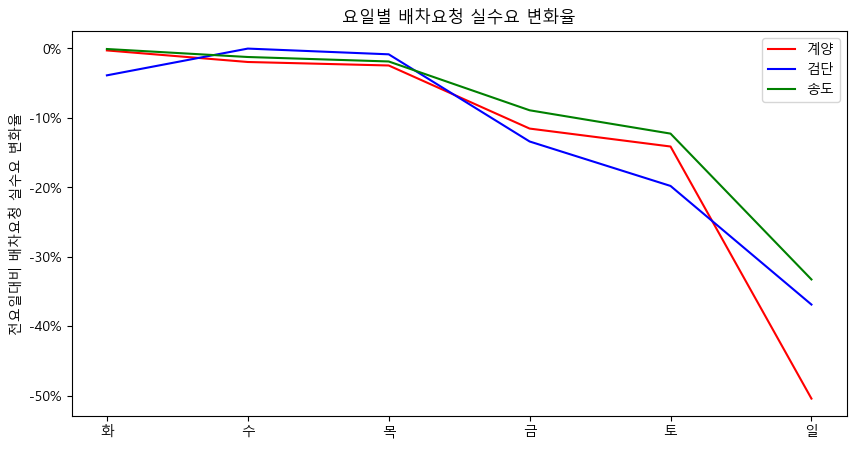

In [93]:
import matplotlib.pyplot as plt

계양_요일비율 = 계양.loc[계양['실수요여부']==1,'요청시간'].dt.dayofweek.value_counts() / len(df)
계양_요일비율.index = ['월', '화', '수', '목', '금', '토', '일']

검단_요일비율 = 검단.loc[검단['실수요여부']==1,'요청시간'].dt.dayofweek.value_counts() / len(df)
검단_요일비율.index = ['월', '화', '수', '목', '금', '토', '일']

송도_요일비율 = 송도.loc[송도['실수요여부']==1,'요청시간'].dt.dayofweek.value_counts() / len(df)
송도_요일비율.index = ['월', '화', '수', '목', '금', '토', '일']

계양_요일비율.pct_change().plot.line(title='요일별 배차요청 실수요 변화율', figsize=(10, 5), color='red')

검단_요일비율.pct_change().plot.line(title='요일별 배차요청 실수요 변화율', figsize=(10, 5), color='blue')

송도_요일비율.pct_change().plot.line(title='요일별 배차요청 실수요 변화율', figsize=(10, 5), color='green')

plt.legend(['계양', '검단', '송도'])

plt.ylabel('전요일대비 배차요청 실수요 변화율')

plt.yticks([0, -0.1, -0.2, -0.3, -0.4, -0.5], ['0%', '-10%', '-20%', '-30%', '-40%', '-50%'])

plt.show()

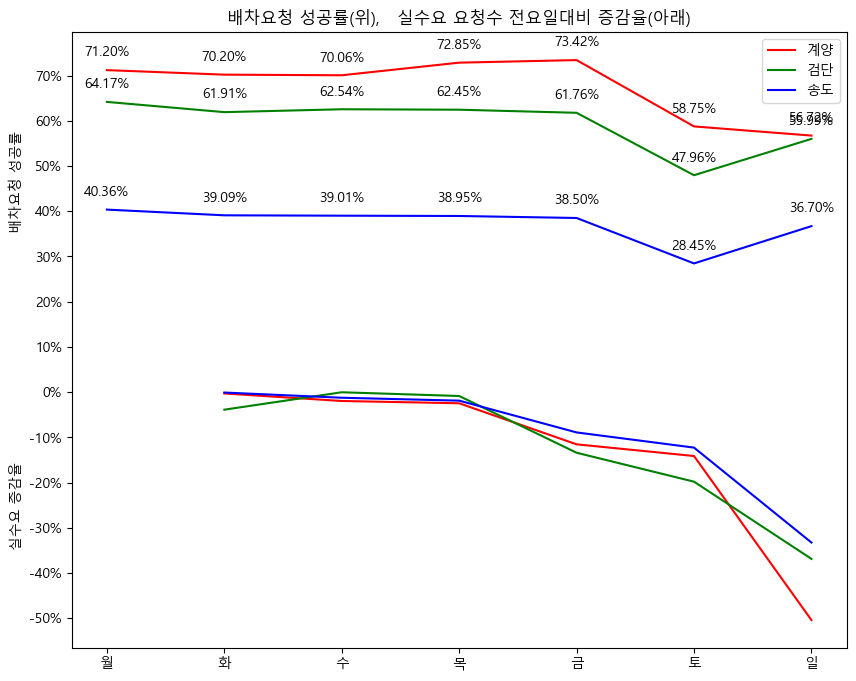

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(계양_요일비율.pct_change(), color='red')
ax.plot(검단_요일비율.pct_change(), color='green')
ax.plot(송도_요일비율.pct_change(), color='blue')

    


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양')]
실수요['요청시간(요일)'] = 실수요['요청시간'].dt.dayofweek
ax.plot(실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='red')
for x, y in zip(실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    label = "{:.2f}%".format(y * 100)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단')]
실수요['요청시간(요일)'] = 실수요['요청시간'].dt.dayofweek
ax.plot(실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='green')
for x, y in zip(실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    label = "{:.2f}%".format(y * 100)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도')]
실수요['요청시간(요일)'] = 실수요['요청시간'].dt.dayofweek
ax.plot(실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='blue')
for x, y in zip(실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    label = "{:.2f}%".format(y * 100)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')


plt.legend(['계양', '검단', '송도'])

plt.yticks([0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0, -0.1, -0.2, -0.3, -0.4, -0.5], [
    '70%','60%','50%', '40%', '30%', '20%', '10%', '0%', '-10%', '-20%', '-30%', '-40%', '-50%'])

plt.title('배차요청 성공률(위),   실수요 요청수 전요일대비 증감율(아래)')

plt.ylabel('실수요 증감율                                               배차요청 성공률')

plt.show()




### 13-1. 계양

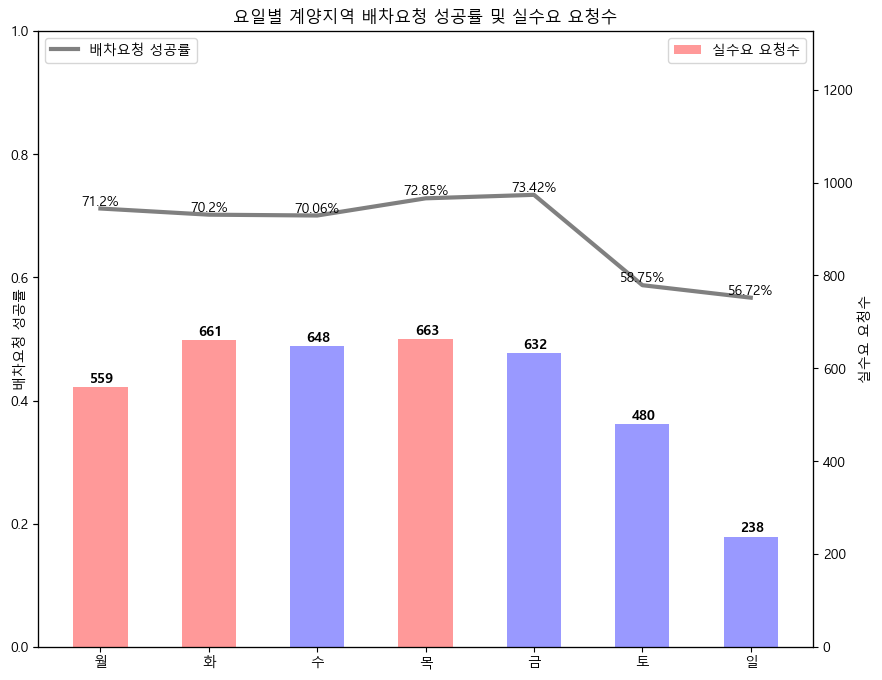

In [208]:

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.xticks([0,1,2,3,4,5,6], [
    '월','화','수','목','금','토','일'])

plt.title('요일별 계양지역 배차요청 성공률 및 실수요 요청수')

ax2 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양')]
실수요['요청시간(요일)'] = 실수요['요청시간'].dt.dayofweek

ax2.bar(실수요.groupby('요청시간(요일)')['요청식별id'].count().index, 실수요.groupby('요청시간(요일)')['요청식별id'].count(), color='black', alpha=0.4, width=0.5)
for i, v in enumerate(실수요.groupby('요청시간(요일)')['요청식별id'].count()):
    ax2.text(i-0.1, v+10, str(v), color='black', fontweight='bold')



ax2.set_ylim(0, 실수요.groupby('요청시간(요일)')['요청식별id'].count().max()*2)

ax2.patches[0].set_facecolor('red')

for i in range(1, len(실수요.groupby('요청시간(요일)')['요청식별id'].count())):
    if 실수요.groupby('요청시간(요일)')['요청식별id'].count()[i] < 실수요.groupby('요청시간(요일)')['요청식별id'].count()[i-1]:
        ax2.patches[i].set_facecolor('blue')
    elif 실수요.groupby('요청시간(요일)')['요청식별id'].count()[i] > 실수요.groupby('요청시간(요일)')['요청식별id'].count()[i-1]:
        ax2.patches[i].set_facecolor('red')


ax1 = ax.twinx()

ax1.plot(실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3)

for i, v in enumerate(실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax1.text(i, v+0.005, str(round(v*100, 2))+'%', horizontalalignment='center')

ax1.yaxis.tick_left()

ax1.set_ylim(0, 1)

ax.set_ylabel('배차요청 성공률')
ax2.set_ylabel('실수요 요청수')

ax2.legend(['실수요 요청수'], loc='upper right')
ax1.legend(['배차요청 성공률'], loc='upper left')
plt.show()



### 13-2. 검단

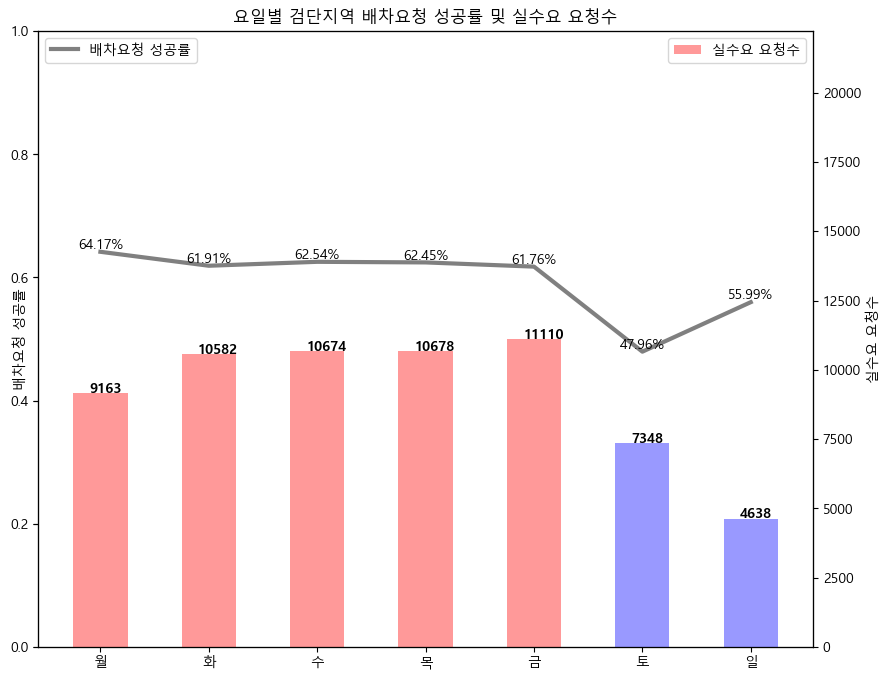

In [209]:

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.xticks([0,1,2,3,4,5,6], [
    '월','화','수','목','금','토','일'])

plt.title('요일별 검단지역 배차요청 성공률 및 실수요 요청수')

ax2 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단')]
실수요['요청시간(요일)'] = 실수요['요청시간'].dt.dayofweek

ax2.bar(실수요.groupby('요청시간(요일)')['요청식별id'].count().index, 실수요.groupby('요청시간(요일)')['요청식별id'].count(), color='grey', alpha=0.4, width=0.5)
for i, v in enumerate(실수요.groupby('요청시간(요일)')['요청식별id'].count()):
    ax2.text(i-0.1, v+10, str(v), color='black', fontweight='bold')
    
ax2.set_ylim(0, 실수요.groupby('요청시간(요일)')['요청식별id'].count().max()*2)

ax2.patches[0].set_facecolor('red')

for i in range(1, len(실수요.groupby('요청시간(요일)')['요청식별id'].count())):
    if 실수요.groupby('요청시간(요일)')['요청식별id'].count()[i] < 실수요.groupby('요청시간(요일)')['요청식별id'].count()[i-1]:
        ax2.patches[i].set_facecolor('blue')
    elif 실수요.groupby('요청시간(요일)')['요청식별id'].count()[i] > 실수요.groupby('요청시간(요일)')['요청식별id'].count()[i-1]:
        ax2.patches[i].set_facecolor('red')


ax1 = ax.twinx()

ax1.plot(실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3)

for i, v in enumerate(실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax1.text(i, v+0.005, str(round(v*100, 2))+'%', horizontalalignment='center')

ax1.yaxis.tick_left()

ax1.set_ylim(0, 1)

ax.set_ylabel('배차요청 성공률')
ax2.set_ylabel('실수요 요청수')

ax2.legend(['실수요 요청수'], loc='upper right')
ax1.legend(['배차요청 성공률'], loc='upper left')
plt.show()

### 13-3. 송도

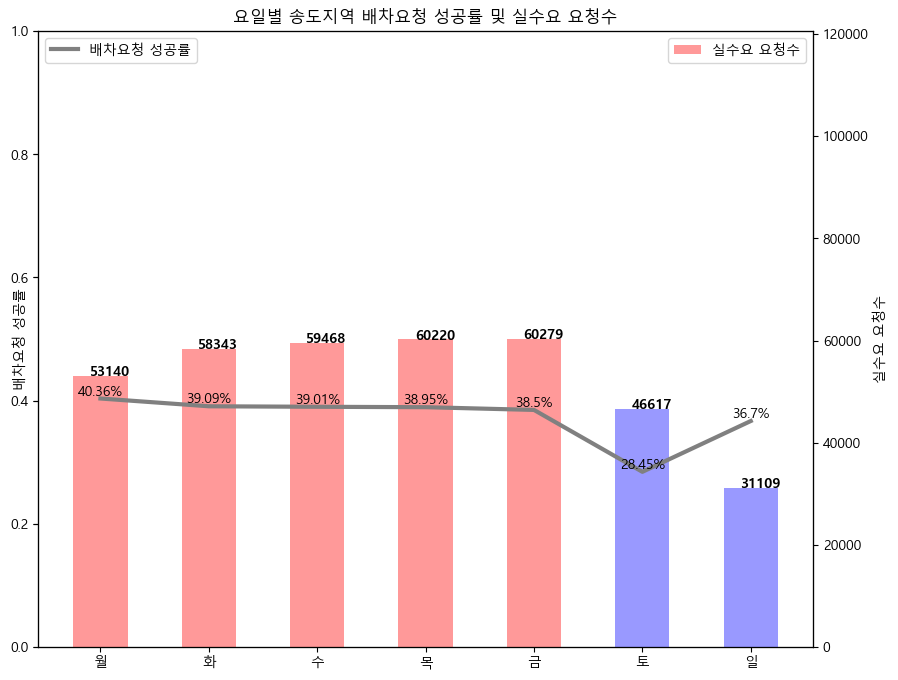

In [207]:

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.xticks([0,1,2,3,4,5,6], [
    '월','화','수','목','금','토','일'])

plt.title('요일별 송도지역 배차요청 성공률 및 실수요 요청수')

ax2 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도')]
실수요['요청시간(요일)'] = 실수요['요청시간'].dt.dayofweek

ax2.bar(실수요.groupby('요청시간(요일)')['요청식별id'].count().index, 실수요.groupby('요청시간(요일)')['요청식별id'].count(), color='grey', alpha=0.4, width=0.5)
for i, v in enumerate(실수요.groupby('요청시간(요일)')['요청식별id'].count()):
    ax2.text(i-0.1, v+10, str(v), color='black', fontweight='bold')

ax2.set_ylim(0, 실수요.groupby('요청시간(요일)')['요청식별id'].count().max()*2)

ax2.patches[0].set_facecolor('red')

for i in range(1, len(실수요.groupby('요청시간(요일)')['요청식별id'].count())):
    if 실수요.groupby('요청시간(요일)')['요청식별id'].count()[i] < 실수요.groupby('요청시간(요일)')['요청식별id'].count()[i-1]:
        ax2.patches[i].set_facecolor('blue')
    elif 실수요.groupby('요청시간(요일)')['요청식별id'].count()[i] > 실수요.groupby('요청시간(요일)')['요청식별id'].count()[i-1]:
        ax2.patches[i].set_facecolor('red')


ax1 = ax.twinx()

ax1.plot(실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3)

for i, v in enumerate(실수요.groupby('요청시간(요일)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax1.text(i, v+0.005, str(round(v*100, 2))+'%', horizontalalignment='center')


ax1.yaxis.tick_left()

ax1.set_ylim(0, 1)

ax.set_ylabel('배차요청 성공률')
ax2.set_ylabel('실수요 요청수')

ax2.legend(['실수요 요청수'], loc='upper right')
ax1.legend(['배차요청 성공률'], loc='upper left')

plt.show()

### 🔗 분석 14) 주간 vs 주말


#### - 지역간 비교

+ 분석에 필요한 데이터 분리 및 전처리

In [250]:
주중=df[df['요청시간'].dt.dayofweek<5]
주말=df[df['요청시간'].dt.dayofweek>=5]

In [251]:
주중_실수요=주중[주중['실수요여부']==1]

주중_실수요['요청시간(시)']=주중_실수요['요청시간'].dt.hour

주중_실수요=주중_실수요[['지역','요청식별id', '요청시간(시)','상태']]

주중_시간=pd.DataFrame(주중_실수요.groupby(['지역','요청시간(시)'])['요청식별id'].count())
주중_시간.columns=['count']
주중_시간.reset_index(inplace=True)

주중_시간.loc[56] = ['계양', '23', '0']

주중_시간['요청시간(시)']=주중_시간['요청시간(시)'].astype('str')
주중_시간['요청시간(시)']=['5시-6시', '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시', '13시14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시', '5시-6시', '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시', '13시14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시', '5시-6시', '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시', '13시14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시']


주말_실수요=주말[주말['실수요여부']==1]

주말_실수요['요청시간(시)']=주말_실수요['요청시간'].dt.hour

주말_실수요=주말_실수요[['지역','요청식별id', '요청시간(시)','상태']]

주말_시간=pd.DataFrame(주말_실수요.groupby(['지역','요청시간(시)'])['요청식별id'].count())
주말_시간.columns=['count']
주말_시간.reset_index(inplace=True)

주말_시간.loc[56] = ['계양', '23', '0']

주말_시간['요청시간(시)']=주말_시간['요청시간(시)'].astype('str')
주말_시간['요청시간(시)']=['5시-6시', '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시', '13시14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시', '5시-6시', '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시', '13시14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시', '5시-6시', '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시', '13시14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시']

In [252]:
주중_시간.set_index('요청시간(시)', inplace=True)
주말_시간.set_index('요청시간(시)', inplace=True)

In [253]:
주중_시간_계양=주중_시간[주중_시간['지역']=='계양']
주중_시간_검단=주중_시간[주중_시간['지역']=='검단']
주중_시간_송도=주중_시간[주중_시간['지역']=='송도']

주말_시간_계양=주말_시간[주말_시간['지역']=='계양']
주말_시간_검단=주말_시간[주말_시간['지역']=='검단']
주말_시간_송도=주말_시간[주말_시간['지역']=='송도']

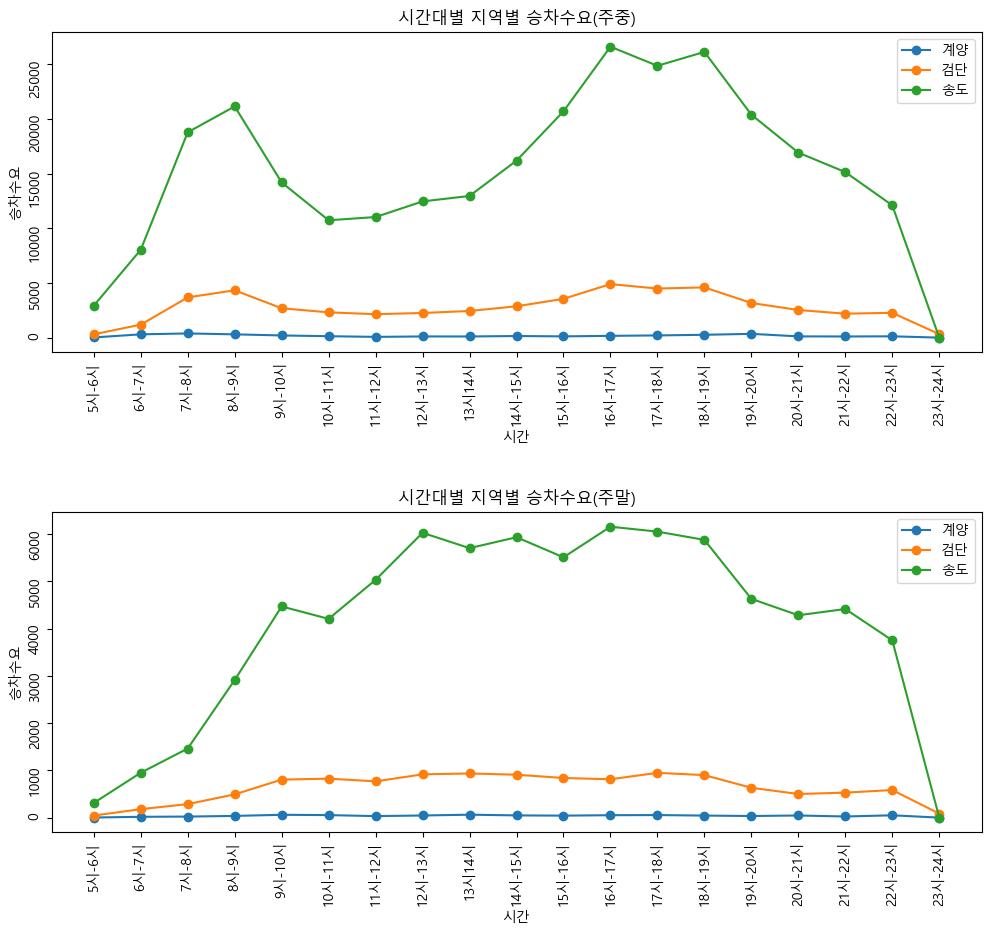

In [254]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
fig.set_facecolor('white')
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(주중_시간_계양.index,주중_시간_계양['count'],marker='o',label='계양')
ax1.plot(주중_시간_계양.index,주중_시간_검단['count'],marker='o',label='검단')
ax1.plot(주중_시간_계양.index,주중_시간_송도['count'],marker='o',label='송도')
ax1.legend()



ax2.plot(주말_시간_계양.index,주말_시간_계양['count'],marker='o',label='계양')
ax2.plot(주말_시간_계양.index,주말_시간_검단['count'],marker='o',label='검단')
ax2.plot(주말_시간_계양.index,주말_시간_송도['count'],marker='o',label='송도')
ax2.legend()

ax1.title.set_text('시간대별 지역별 승차수요(주중)')
ax2.title.set_text('시간대별 지역별 승차수요(주말)')
ax1.tick_params(labelrotation=90)
ax2.tick_params(labelrotation=90)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)

ax1.set_xlabel('시간')
ax1.set_ylabel('승차수요')

ax2.set_xlabel('시간')
ax2.set_ylabel('승차수요')

plt.show()


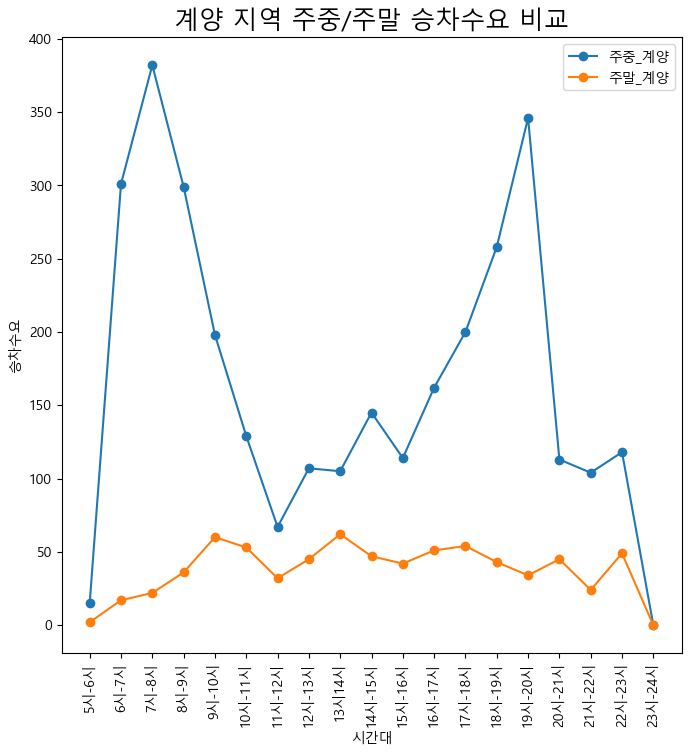

In [255]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(1,1,1)

ax.plot(주중_시간_계양.index,주중_시간_계양['count'],marker='o',label='주중_계양')
ax.plot(주말_시간_계양.index,주말_시간_계양['count'],marker='o',label='주말_계양')

ax.legend()

plt.xticks(rotation=90)

plt.title('계양 지역 주중/주말 승차수요 비교', fontsize=18)

ax.set_xlabel('시간대')
ax.set_ylabel('승차수요')


plt.show()


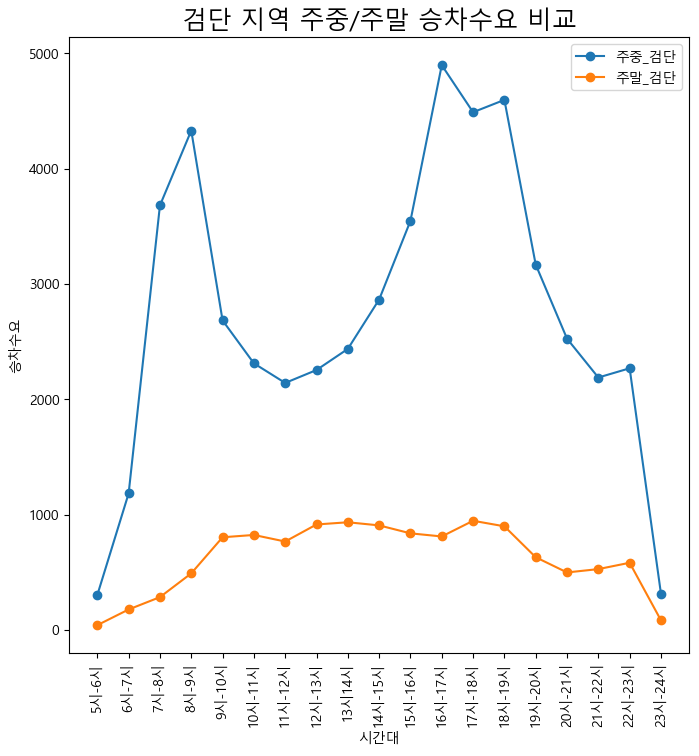

In [256]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(1,1,1)

ax.plot(주중_시간_검단.index,주중_시간_검단['count'],marker='o',label='주중_검단')
ax.plot(주말_시간_검단.index,주말_시간_검단['count'],marker='o',label='주말_검단')

ax.legend()

plt.xticks(rotation=90)

plt.title('검단 지역 주중/주말 승차수요 비교', fontsize=18)

ax.set_xlabel('시간대')
ax.set_ylabel('승차수요')

plt.show()


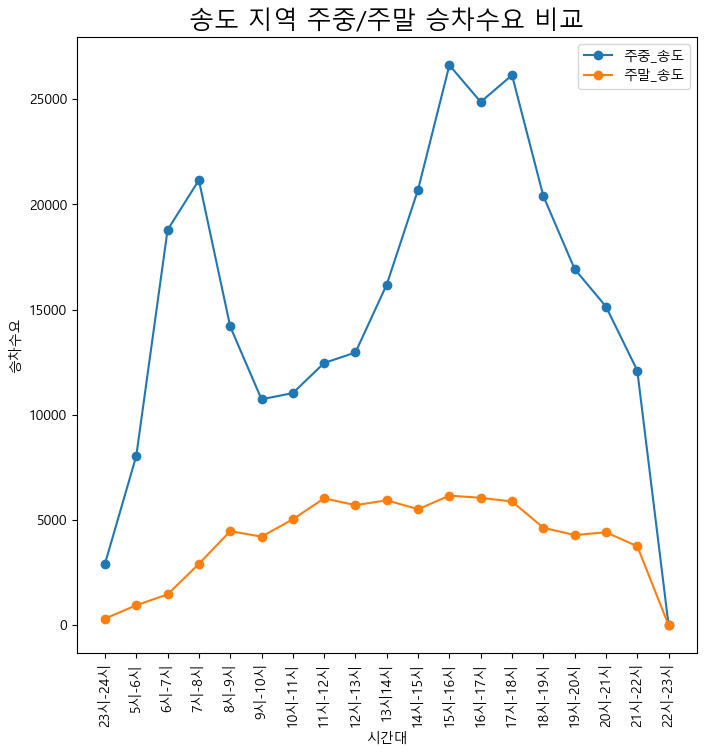

In [257]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(1,1,1)

ax.plot(주중_시간_송도.index,주중_시간_송도['count'],marker='o',label='주중_송도')
ax.plot(주말_시간_송도.index,주말_시간_송도['count'],marker='o',label='주말_송도')

ax.legend()

plt.xticks(rotation=90)

plt.title('송도 지역 주중/주말 승차수요 비교', fontsize=18)

ax.set_xlabel('시간대')
ax.set_ylabel('승차수요')

plt.show()




### - 지역별로 들여다보기

#### - 계양

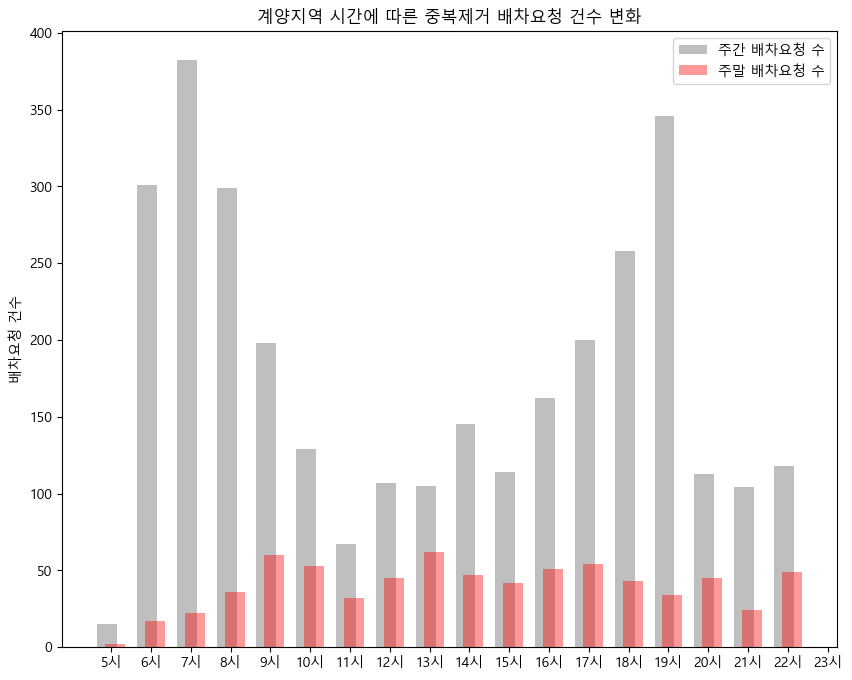

In [258]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('계양지역 시간에 따른 중복제거 배차요청 건수 변화')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour



실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek < 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='grey', alpha=0.5, width=0.5)


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek >= 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='red', alpha=0.4, width=0.5)

ax.set_ylabel('배차요청 건수')


plt.legend(['주간 배차요청 수', '주말 배차요청 수'],loc='upper right')


plt.show()



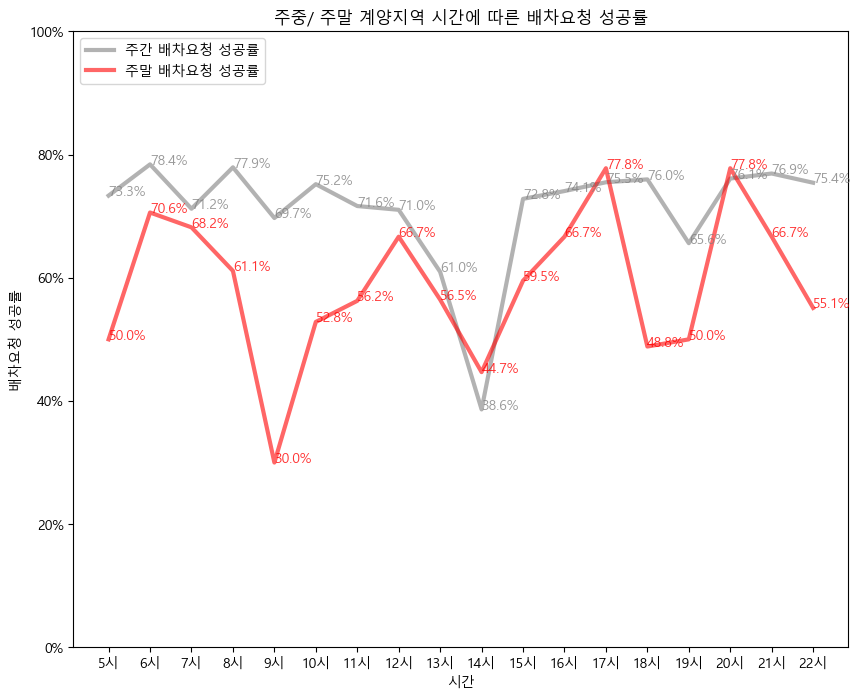

In [259]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])


plt.ylim(0, 1)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.title('주중/ 주말 계양지역 시간에 따른 배차요청 성공률')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek < 5)]
ax.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.6)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax.text(x, y, '{:.1%}'.format(y), color='grey', alpha=0.8, fontsize=10)
    

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek >= 5)]
ax.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='red', linewidth=3, alpha=0.6)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax.text(x, y, '{:.1%}'.format(y), color='red', alpha=0.8, fontsize=10)



ax.set_xlabel('시간')
ax.set_ylabel('배차요청 성공률')

plt.legend(['주간 배차요청 성공률', '주말 배차요청 성공률'], loc='upper left')

plt.show()



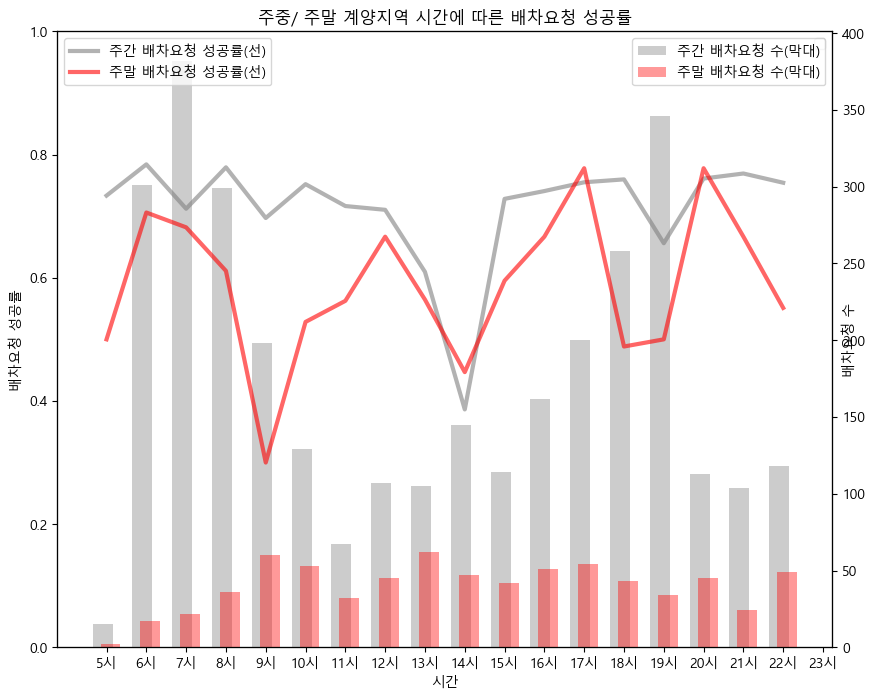

In [260]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

plt.legend(['주간', '주말'])

df['요청시간(시)'] = df['요청시간'].dt.hour


plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('주중/ 주말 계양지역 시간에 따른 배차요청 성공률')


ax2 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek < 5)]
ax2.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='grey', alpha=0.4, width=0.5)

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek >= 5)]
ax2.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='red', alpha=0.4, width=0.5)


ax2.yaxis.set_label_position("right")


ax1 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek < 5)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.6)

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek >= 5)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='red', linewidth=3, alpha=0.6)
ax1.yaxis.set_ticks([])

ax.set_xlabel('시간')
ax1.set_ylabel('배차요청 수')
ax.set_ylabel('배차요청 성공률')


ax1.set_ylim(0, 1)


ax1.legend(['주간 배차요청 성공률(선)', '주말 배차요청 성공률(선)'],loc='upper left')

ax2.legend(['주간 배차요청 수(막대)', '주말 배차요청 수(막대)'], loc='upper right')

plt.show()



#### - 검단

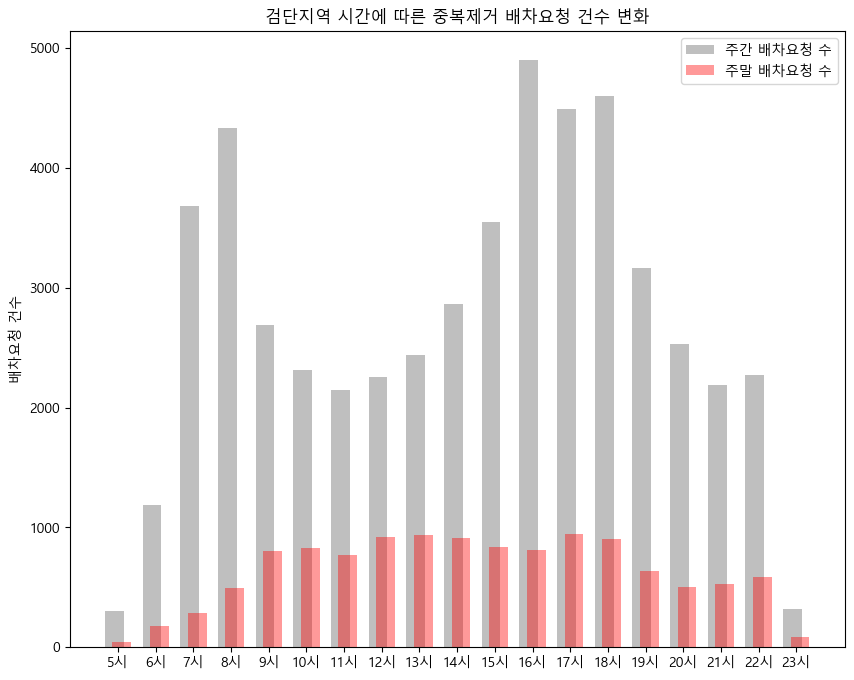

In [261]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('검단지역 시간에 따른 중복제거 배차요청 건수 변화')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour



실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek < 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='grey', alpha=0.5, width=0.5)


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek >= 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='red', alpha=0.4, width=0.5)

ax.set_ylabel('배차요청 건수')


plt.legend(['주간 배차요청 수', '주말 배차요청 수'],loc='upper right')


plt.show()



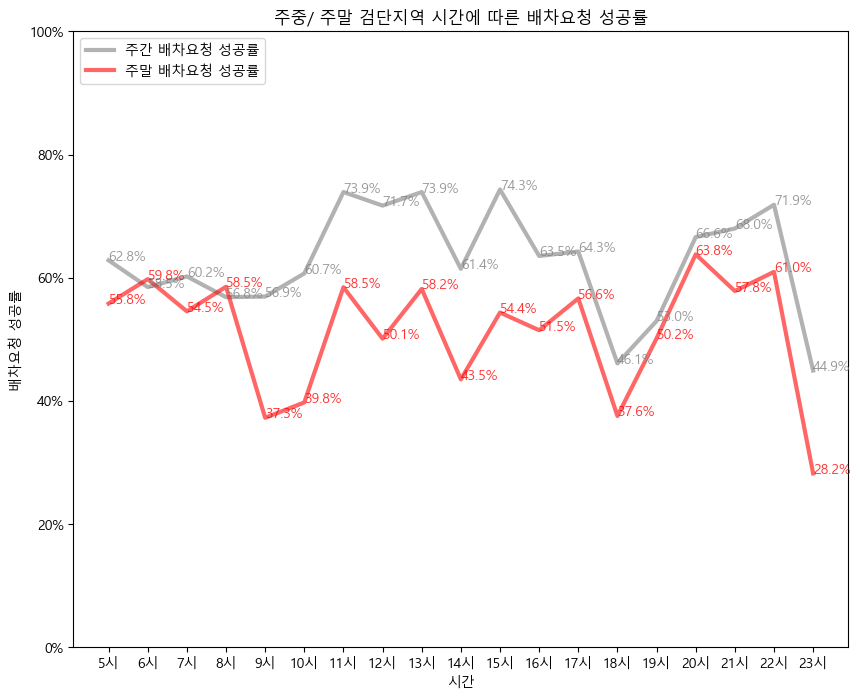

In [262]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])


plt.ylim(0, 1)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.title('주중/ 주말 검단지역 시간에 따른 배차요청 성공률')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek < 5)]
ax.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.6)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax.text(x, y, '{:.1%}'.format(y), color='grey', alpha=0.8, fontsize=10)
    

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek >= 5)]
ax.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='red', linewidth=3, alpha=0.6)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax.text(x, y, '{:.1%}'.format(y), color='red', alpha=0.8, fontsize=10)



ax.set_xlabel('시간')
ax.set_ylabel('배차요청 성공률')

plt.legend(['주간 배차요청 성공률', '주말 배차요청 성공률'], loc='upper left')

plt.show()



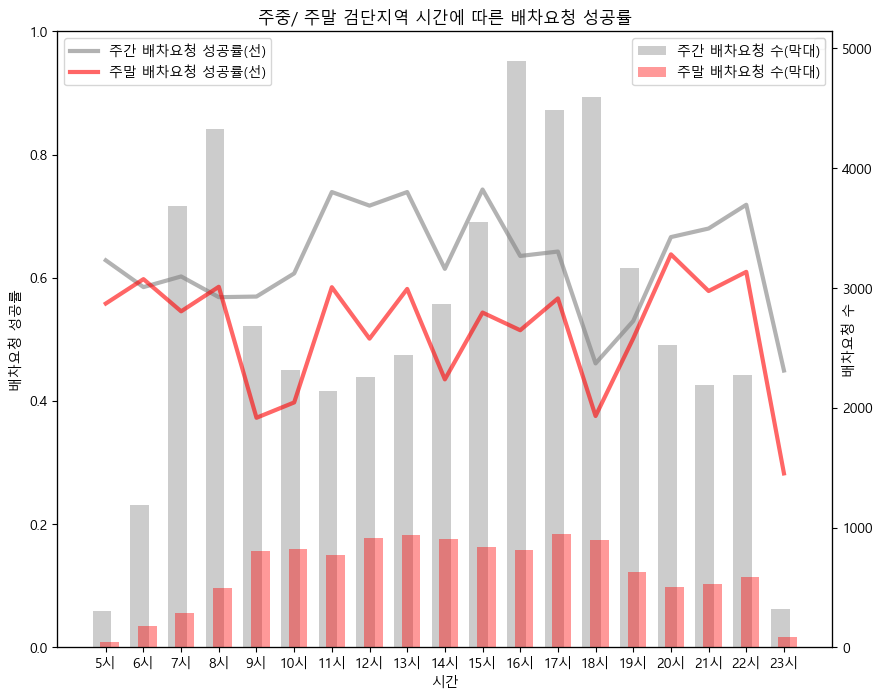

In [263]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

plt.legend(['주간', '주말'])

df['요청시간(시)'] = df['요청시간'].dt.hour


plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('주중/ 주말 검단지역 시간에 따른 배차요청 성공률')


ax2 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek < 5)]
ax2.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='grey', alpha=0.4, width=0.5)

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek >= 5)]
ax2.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='red', alpha=0.4, width=0.5)


ax2.yaxis.set_label_position("right")


ax1 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek < 5)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.6)

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek >= 5)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='red', linewidth=3, alpha=0.6)
ax1.yaxis.set_ticks([])

ax.set_xlabel('시간')
ax1.set_ylabel('배차요청 수')
ax.set_ylabel('배차요청 성공률')


ax1.set_ylim(0, 1)


ax1.legend(['주간 배차요청 성공률(선)', '주말 배차요청 성공률(선)'],loc='upper left')

ax2.legend(['주간 배차요청 수(막대)', '주말 배차요청 수(막대)'], loc='upper right')

plt.show()



#### - 송도

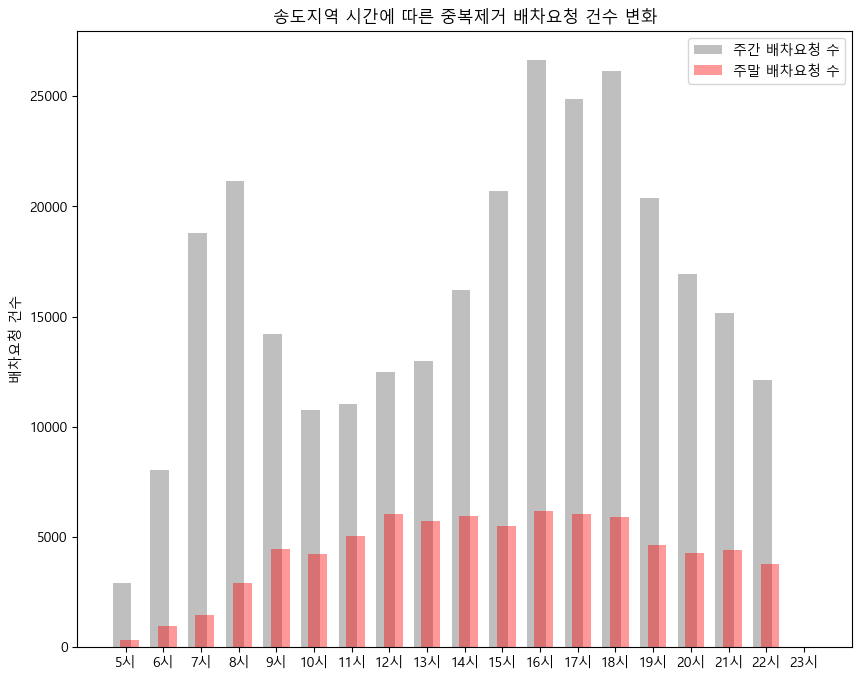

In [264]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('송도지역 시간에 따른 중복제거 배차요청 건수 변화')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour



실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek < 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='grey', alpha=0.5, width=0.5)


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek >= 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='red', alpha=0.4, width=0.5)

ax.set_ylabel('배차요청 건수')


plt.legend(['주간 배차요청 수', '주말 배차요청 수'],loc='upper right')


plt.show()



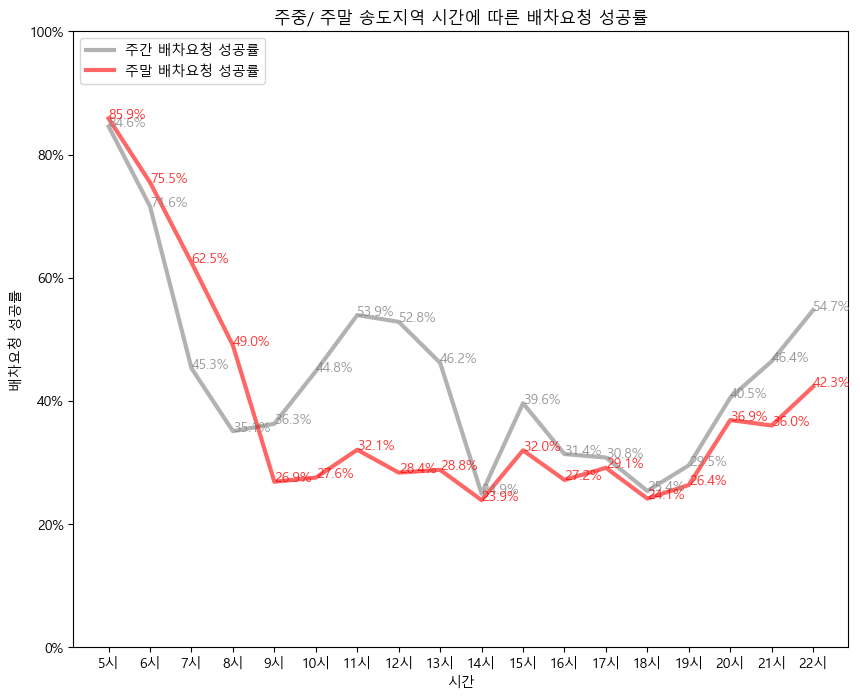

In [265]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])


plt.ylim(0, 1)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.title('주중/ 주말 송도지역 시간에 따른 배차요청 성공률')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek < 5)]
ax.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.6)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax.text(x, y, '{:.1%}'.format(y), color='grey', alpha=0.8, fontsize=10)
    

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek >= 5)]
ax.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='red', linewidth=3, alpha=0.6)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax.text(x, y, '{:.1%}'.format(y), color='red', alpha=0.8, fontsize=10)



ax.set_xlabel('시간')
ax.set_ylabel('배차요청 성공률')

plt.legend(['주간 배차요청 성공률', '주말 배차요청 성공률'], loc='upper left')

plt.show()



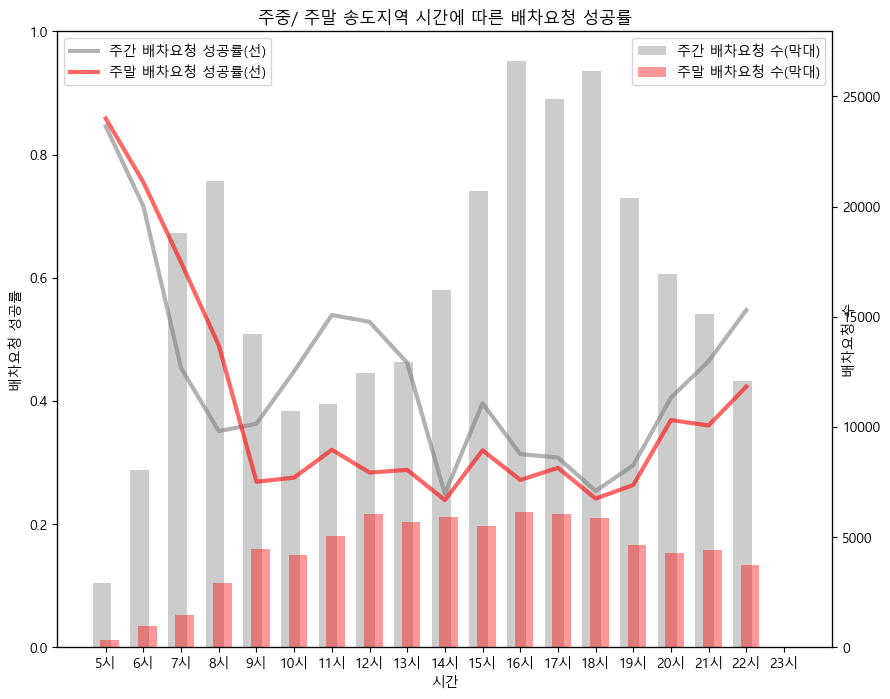

In [266]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

plt.legend(['주간', '주말'])

df['요청시간(시)'] = df['요청시간'].dt.hour


plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('주중/ 주말 송도지역 시간에 따른 배차요청 성공률')


ax2 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek < 5)]
ax2.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='grey', alpha=0.4, width=0.5)

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek >= 5)]
ax2.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='red', alpha=0.4, width=0.5)


ax2.yaxis.set_label_position("right")


ax1 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek < 5)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.6)

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek >= 5)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='red', linewidth=3, alpha=0.6)
ax1.yaxis.set_ticks([])

ax.set_xlabel('시간')
ax1.set_ylabel('배차요청 수')
ax.set_ylabel('배차요청 성공률')


ax1.set_ylim(0, 1)


ax1.legend(['주간 배차요청 성공률(선)', '주말 배차요청 성공률(선)'],loc='upper left')

ax2.legend(['주간 배차요청 수(막대)', '주말 배차요청 수(막대)'], loc='upper right')

plt.show()



### +) 시간대별, 배차요청 중복요청 제거 전후 데이터 비교

#### - 계양(주중+주말)

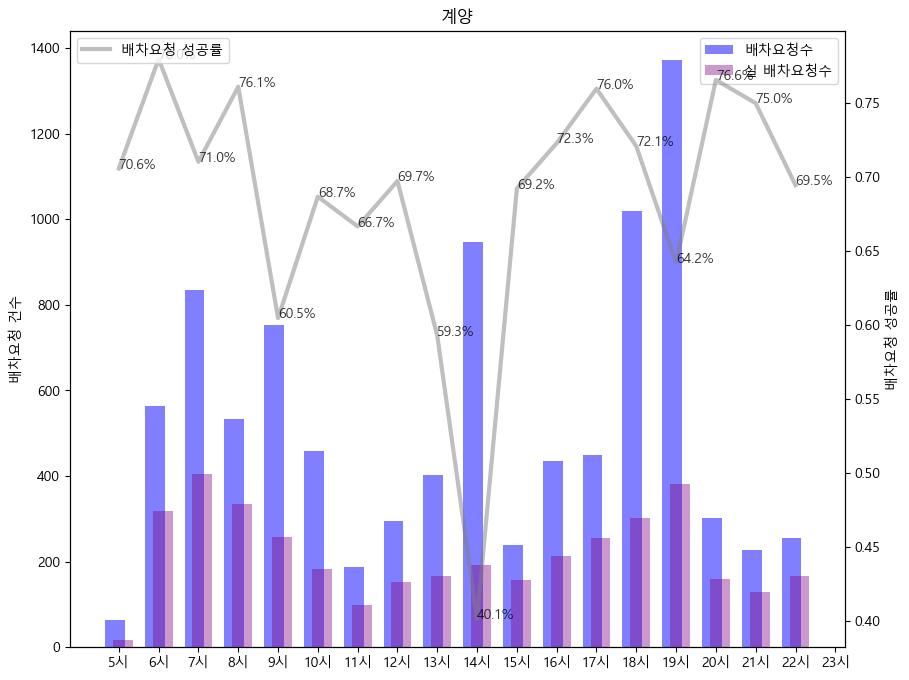

In [312]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('계양')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour


ax1 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek <= 7)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.5)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax1.text(x, y, '{:.1%}'.format(y), color='black', alpha=0.8, fontsize=10)
    

실수요 = df[(df['지역'] == '계양') & (df['요청시간'].dt.dayofweek <= 7)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='blue', alpha=0.5, width=0.5)


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek <= 7)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='purple', alpha=0.4, width=0.5)

ax.set_ylabel('배차요청 건수')
ax1.set_ylabel('배차요청 성공률')


ax.legend(['배차요청수', '실 배차요청수'])

ax1.legend(['배차요청 성공률'], loc='upper left')


plt.show()



##### - 계양(주중)

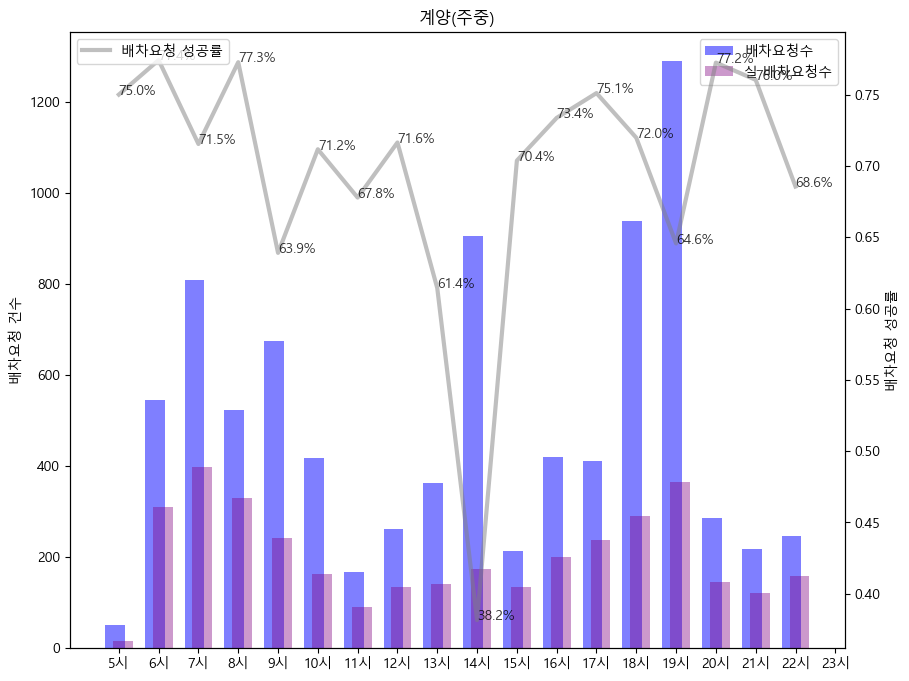

In [313]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('계양(주중)')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour


ax1 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek <= 5)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.5)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax1.text(x, y, '{:.1%}'.format(y), color='black', alpha=0.8, fontsize=10)
    

실수요 = df[(df['지역'] == '계양') & (df['요청시간'].dt.dayofweek <= 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='blue', alpha=0.5, width=0.5)


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek <= 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='purple', alpha=0.4, width=0.5)

ax.set_ylabel('배차요청 건수')
ax1.set_ylabel('배차요청 성공률')


ax.legend(['배차요청수', '실 배차요청수'])

ax1.legend(['배차요청 성공률'], loc='upper left')


plt.show()



#### - 계양(주말)

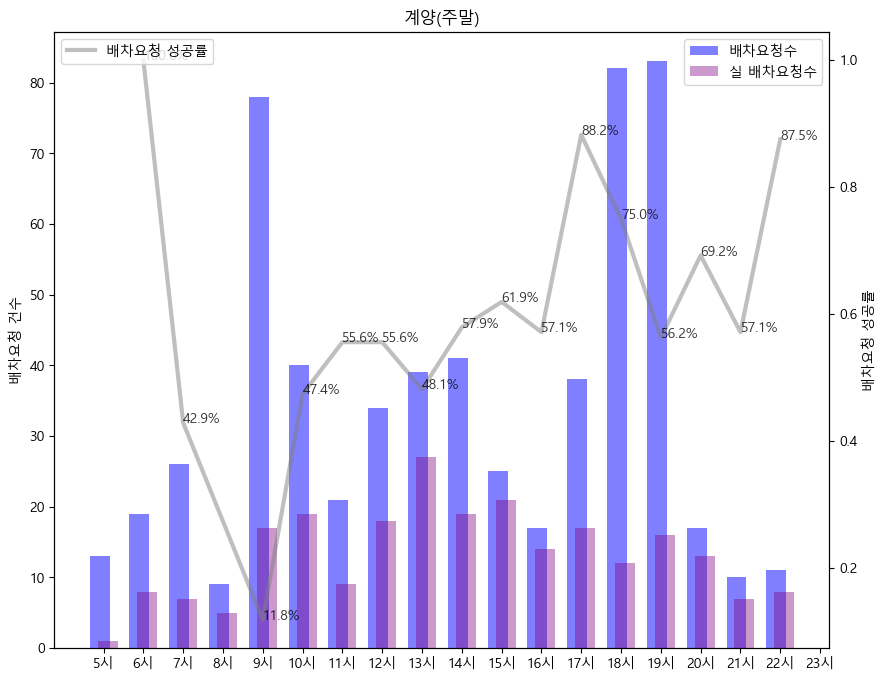

In [314]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('계양(주말)')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour


ax1 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek > 5)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.5)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax1.text(x, y, '{:.1%}'.format(y), color='black', alpha=0.8, fontsize=10)
    

실수요 = df[(df['지역'] == '계양') & (df['요청시간'].dt.dayofweek > 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='blue', alpha=0.5, width=0.5)


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '계양') & (df['요청시간'].dt.dayofweek > 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='purple', alpha=0.4, width=0.5)

ax.set_ylabel('배차요청 건수')
ax1.set_ylabel('배차요청 성공률')


ax.legend(['배차요청수', '실 배차요청수'])

ax1.legend(['배차요청 성공률'], loc='upper left')

plt.show()



#### - 검단(주중+주말)

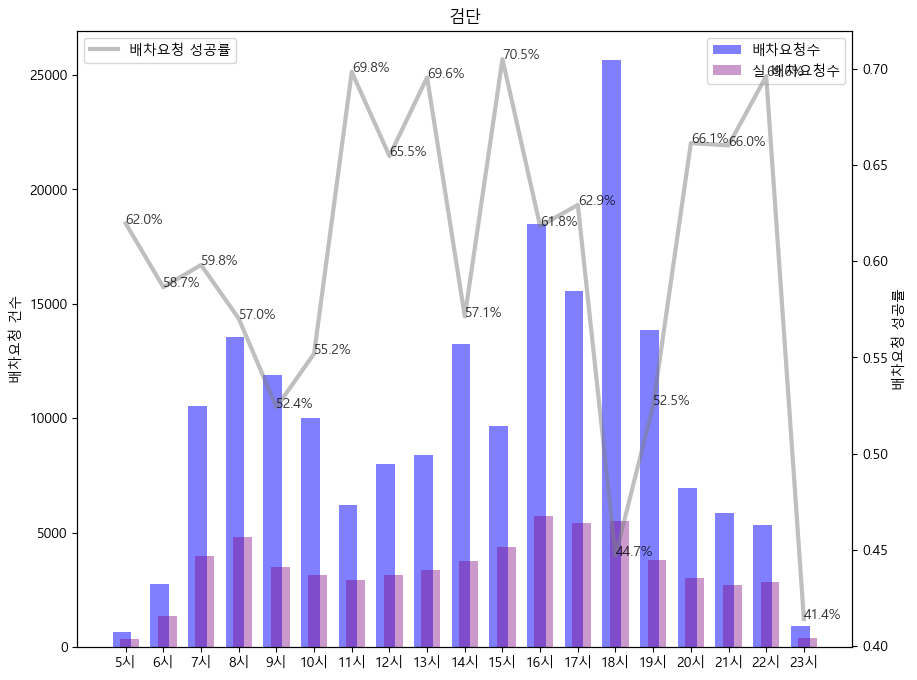

In [315]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('검단')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour


ax1 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek <= 7)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.5)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax1.text(x, y, '{:.1%}'.format(y), color='black', alpha=0.8, fontsize=10)
    

실수요 = df[(df['지역'] == '검단') & (df['요청시간'].dt.dayofweek <= 7)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='blue', alpha=0.5, width=0.5)


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek <= 7)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='purple', alpha=0.4, width=0.5)

ax.set_ylabel('배차요청 건수')
ax1.set_ylabel('배차요청 성공률')


ax.legend(['배차요청수', '실 배차요청수'])


ax1.legend(['배차요청 성공률'], loc='upper left')
plt.show()



#### - 검단(주중)

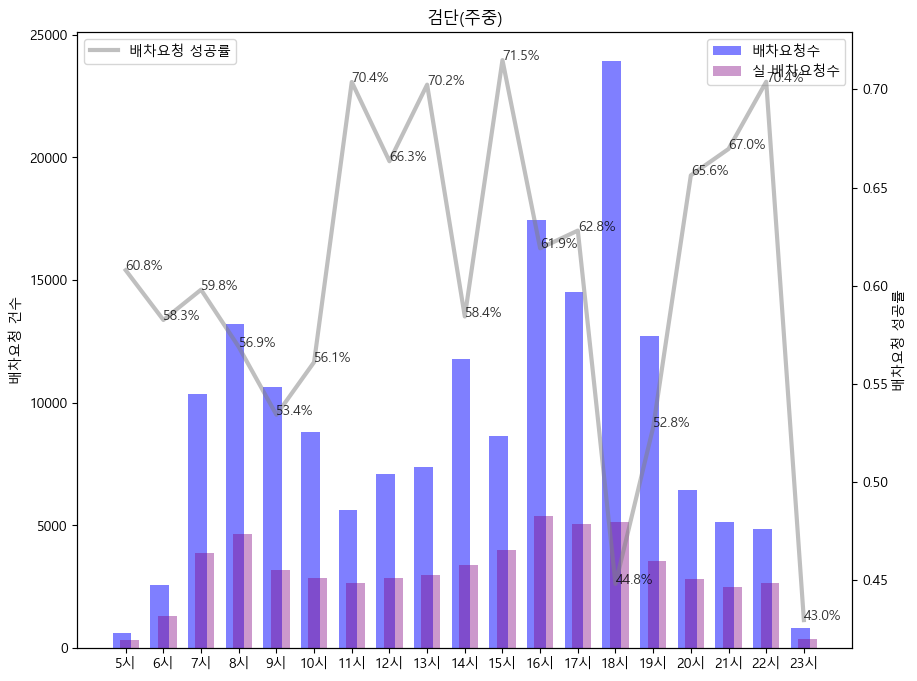

In [316]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('검단(주중)')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour


ax1 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek <= 5)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.5)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax1.text(x, y, '{:.1%}'.format(y), color='black', alpha=0.8, fontsize=10)
    

실수요 = df[(df['지역'] == '검단') & (df['요청시간'].dt.dayofweek <= 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='blue', alpha=0.5, width=0.5)


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek <= 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='purple', alpha=0.4, width=0.5)

ax.set_ylabel('배차요청 건수')
ax1.set_ylabel('배차요청 성공률')


ax.legend(['배차요청수', '실 배차요청수'])


ax1.legend(['배차요청 성공률'], loc='upper left')

plt.show()



#### - 검단(주말)

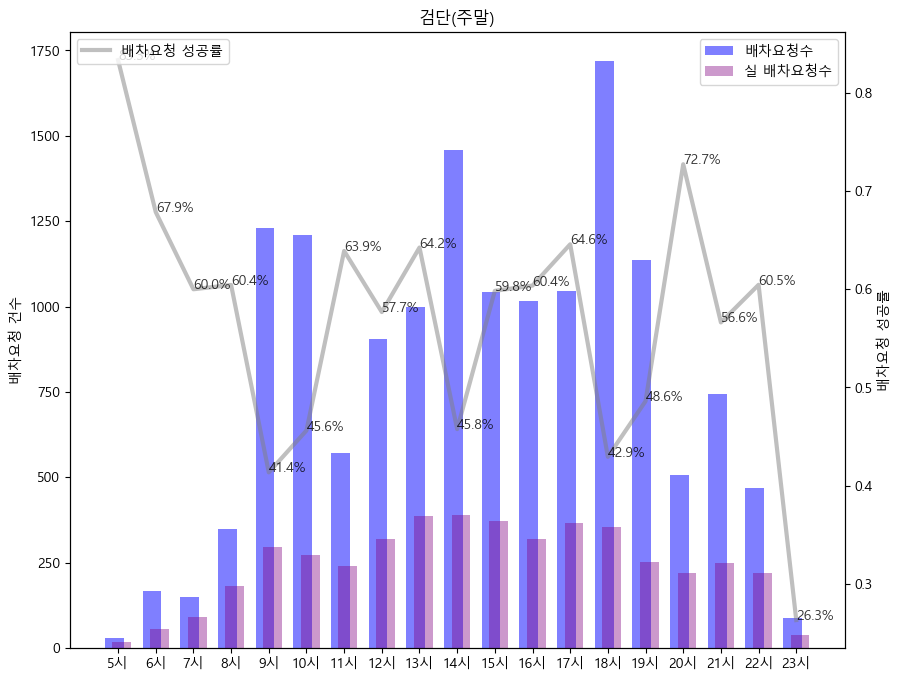

In [317]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('검단(주말)')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour


ax1 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek > 5)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.5)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax1.text(x, y, '{:.1%}'.format(y), color='black', alpha=0.8, fontsize=10)
    

실수요 = df[(df['지역'] == '검단') & (df['요청시간'].dt.dayofweek > 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='blue', alpha=0.5, width=0.5)


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '검단') & (df['요청시간'].dt.dayofweek > 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='purple', alpha=0.4, width=0.5)

ax.set_ylabel('배차요청 건수')
ax1.set_ylabel('배차요청 성공률')


ax.legend(['배차요청수', '실 배차요청수'])


ax1.legend(['배차요청 성공률'], loc='upper left')

plt.show()



#### - 송도(주중+주간)

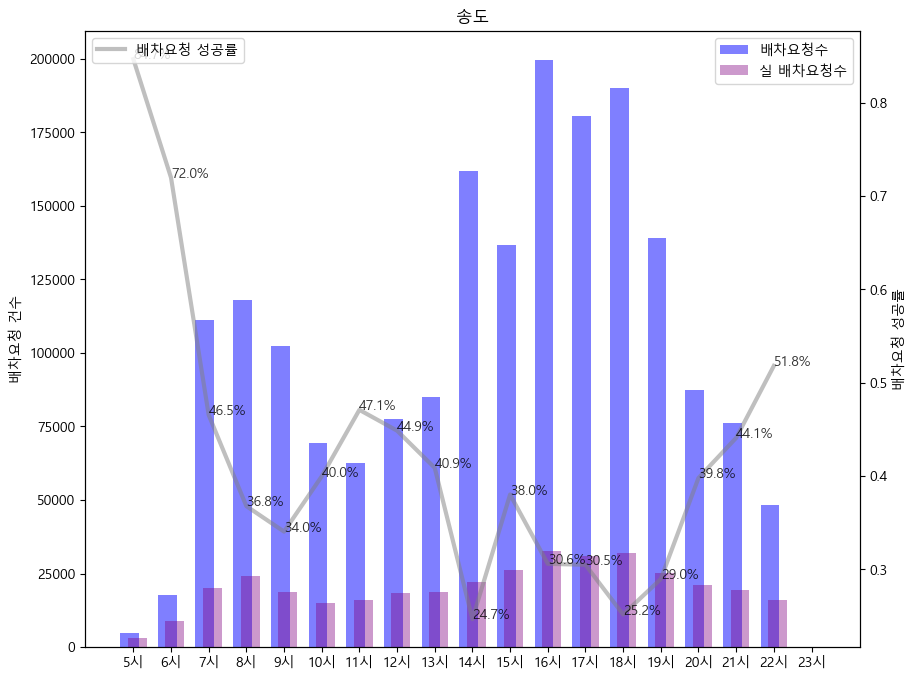

In [318]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('송도')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour


ax1 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek <= 7)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.5)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax1.text(x, y, '{:.1%}'.format(y), color='black', alpha=0.8, fontsize=10)
    

실수요 = df[(df['지역'] == '송도') & (df['요청시간'].dt.dayofweek <= 7)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='blue', alpha=0.5, width=0.5)


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek <= 7)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='purple', alpha=0.4, width=0.5)

ax.set_ylabel('배차요청 건수')
ax1.set_ylabel('배차요청 성공률')


ax.legend(['배차요청수', '실 배차요청수'])


ax1.legend(['배차요청 성공률'], loc='upper left')

plt.show()



##### - 송도(주중)

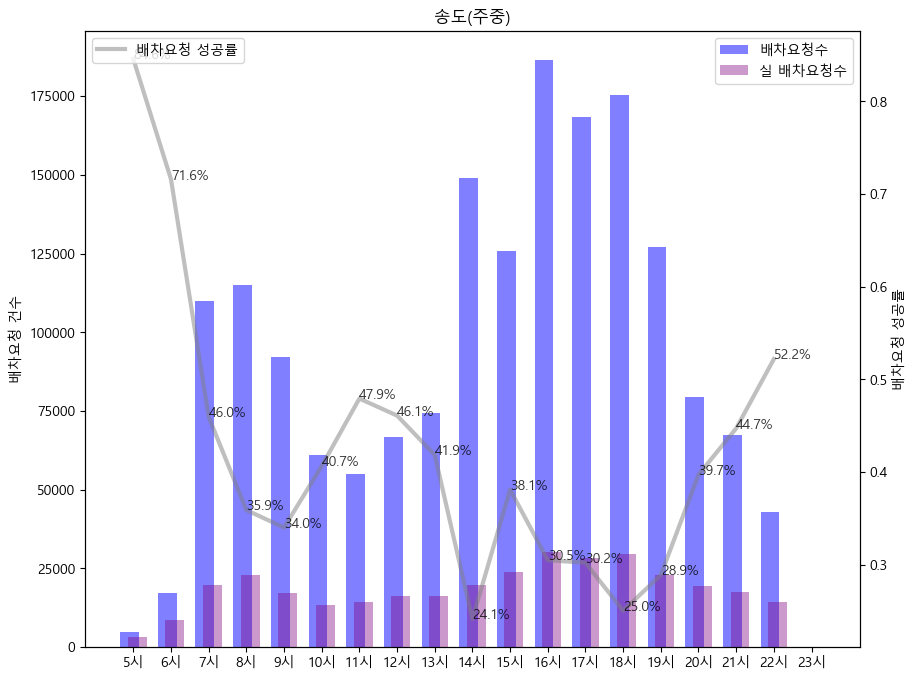

In [319]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

plt.title('송도(주중)')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour


ax1 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek <= 5)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.5)
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax1.text(x, y, '{:.1%}'.format(y), color='black', alpha=0.8, fontsize=10)
    

실수요 = df[(df['지역'] == '송도') & (df['요청시간'].dt.dayofweek <= 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='blue', alpha=0.5, width=0.5)


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek <= 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='purple', alpha=0.4, width=0.5)

ax.set_ylabel('배차요청 건수')
ax1.set_ylabel('배차요청 성공률')


ax.legend(['배차요청수', '실 배차요청수'])

ax1.legend(['배차요청 성공률'], loc='upper left')


plt.show()



##### - 송도(주말)

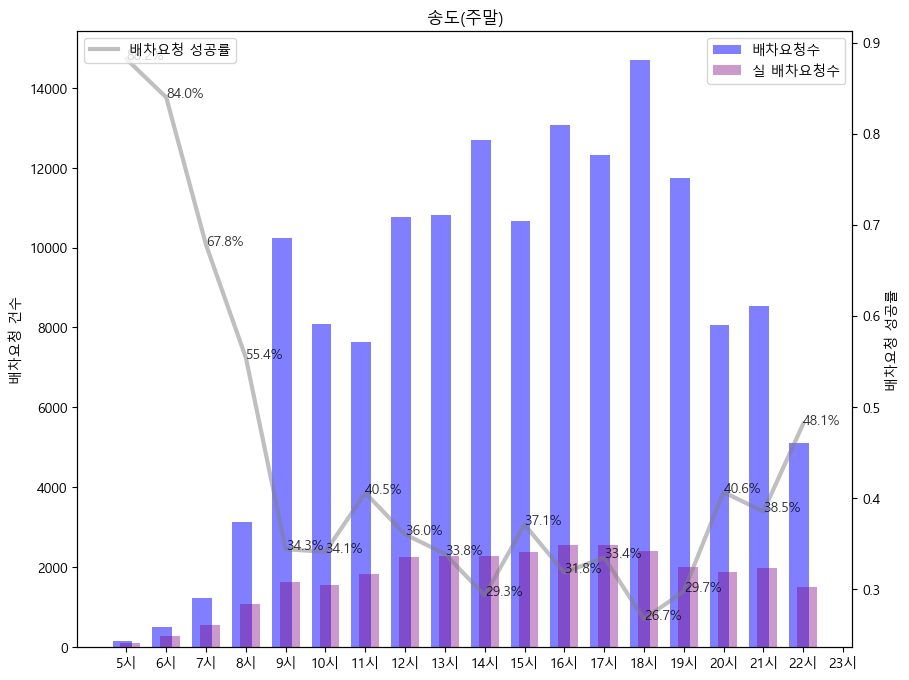

In [310]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df['요청시간(시)'] = df['요청시간'].dt.hour

# change x ticks to hour
plt.xticks([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [
    '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시'])

# add title
plt.title('송도(주말)')
실수요['요청시간(시)'] = 실수요['요청시간'].dt.hour


ax1 = ax.twinx()

실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek > 5)]
ax1.plot(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'], color='grey', linewidth=3, alpha=0.5)
# 각 시간대별 배차요청 성공률을 퍼센트로 선 위에 표시, 글자 투명도 0.6, 색 회색
for x, y in zip(실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료'].index, 실수요.groupby('요청시간(시)')['상태'].value_counts(normalize=True).loc[:, '하차완료']):
    ax1.text(x, y, '{:.1%}'.format(y), color='black', alpha=0.8, fontsize=10)
    

실수요 = df[(df['지역'] == '송도') & (df['요청시간'].dt.dayofweek > 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index - 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='blue', alpha=0.5, width=0.5)


실수요 = df[(df['실수요여부'] == 1) & (df['지역'] == '송도') & (df['요청시간'].dt.dayofweek > 5)]
ax.bar(실수요.groupby('요청시간(시)')['요청식별id'].count().index + 0.1, 실수요.groupby('요청시간(시)')['요청식별id'].count(), color='purple', alpha=0.4, width=0.5)

# y축 설명 추가
ax.set_ylabel('배차요청 건수')
# ax1 y축 설명 추가
ax1.set_ylabel('배차요청 성공률')


# 각 막대 그래프 및 선에 대한 설명 추가
ax.legend(['배차요청수', '실 배차요청수'])

# 선 그래프에 대한 설명을 왼쪽 위에 표시
ax1.legend(['배차요청 성공률'], loc='upper left')


plt.show()



중복을 포함한 배차요청건수(파란막대)과 실제 수요로 잡힌 배차요청건수(보라막대)간 차이의 변화율이 배차요청 성공률과 상관관계를 보이는 것 같은데 검증은 다음기회에 .. 